In [ ]:
!pip install wrds
!pip install yfinance

     |████████████████████████████████| 3.0MB 7.5MB/s 
     |████████████████████████████████| 5.5MB 11.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=178599606caad237cbaf660b188f80d3c517eea4410bab7f6d98ab0667cfbc29
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import wrds
import json
import math
import requests
import datetime
import itertools
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from scipy.stats import pearsonr, norm
plt.rcParams["figure.figsize"] = [10,6]
path = './drive/MyDrive/01-Reading/data'
from google.colab import drive
drive.mount('/content/drive')
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import coint
!cp drive/MyDrive/01-Reading/data/.pgpass ~/
wrds = wrds.Connection(wrds_username='sudokux')
from sklearn.linear_model import LinearRegression
from ipywidgets import interactive, widgets, Layout
#colorKey = plt.rcParams['axes.prop_cycle'].by_key()['color']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading library list...
Done


# Algorithmic Trading 

- Andrew Pole, **(2007)**, "*Statistical Arbitrage: Algorithmic Trading Insights and Techniques (Wiley Finance)*", Wiley, *pp. 257*
- Kendall Kim, **(2007)**, "*Electronic and Algorithmic Trading Technology: The Complete Guide*", Academic Press, *pp. 224*
- Edward Leshik, Jane Cralle, **(2011)**, "*An introduction to algorithmic trading: basic to advanced strategies*", Wiley, *pp. 274*
- Barry Johnson, **(2010)**, "*Algorithmic Trading and DMA: An introduction to direct access trading strategies*", 4Myeloma Press, *pp. 592*
- Robert Kissell (Auth.), **(2013)**, "*The Science of Algorithmic Trading and Portfolio Management [1 ed.]*", Academic Press, *pp. 474*
- Morton Glantz and Robert Kissell (Auth.), **(2013)**, "*Multi-asset Risk Modeling. Techniques for a Global Economy in an Electronic and Algorithmic Trading Era [1 ed.]*", Academic Press, *pp. 544*
- Irene Aldridge, **(2013)**, "*High-frequency trading: a practical guide to algorithmic strategies and trading systems [2 ed.]*", Wiley, *pp. 322*
- Kevin J. Davey, **(2014)**, "*Building Winning Algorithmic Trading Systems: A Trader's Journey from Data Mining to Monte Carlo Simulation to Live Trading [1st ed.]*", Wiley, *pp. 284*
- Erik Banks (auth.), **(2014)**, "*Dark Pools: Off-Exchange Liquidity in an Era of High Frequency, Program, and Algorithmic Trading*", Palgrave Macmillan UK, *pp. [267]*
- Álvaro Cartea, Sebastian Jaimungal, José Penalva, **(2015)**, "*Algorithmic and High-Frequency Trading [1 ed.]*", Cambridge University Press, *pp. 356*
- George Pruitt, **(2016)**, "*The Ultimate Algorithmic Trading System Toolbox [1 ed.]*", Wiley, *pp. [360]*
- Michael Halls Moore, **(2017)**, "*Advanced Algorithmic Trading*", Wiley, *pp. 0*
- Michael Halls Moore, **(2015)**, "*Successful Algorithmic Trading*", Quant Start, *pp. 199*
- David Aronson, Timothy Masters, **(2013)**, "*Statistically sound machine learning for algorithmic trading of financial instruments [1.20 ed.]*", Quant Start, *pp. 542*
- David Bean, **(2015)**, "*Algorithmic Trading Systems Advanced Gap Strategies for the Futures Markets*", John Wiley & Sons, *pp. 0*
- Stefan Jansen, **(2018)**, "*Hands-On Machine Learning for Algorithmic Trading*", Packt, *pp. 503*
- Sebastien Donadio, Sourav Ghosh, **(2019)**, "*Learn Algorithmic Trading: Build and deploy algorithmic trading systems and strategies using Python and advanced data analysis*", Packt Publishing, *pp. 394*
- Matthew Scarpino, **(2019)**, "*Algorithmic Trading with Interactive Brokers (Python and C++) [418, 1 ed.]*", Quiller Technologies LLC, *pp. 418*
- Yves Hilpisch, **(2021)**, "*Python for Algorithmic Trading: From Idea to Cloud Deployment [1 ed.]*", O'Reilly Media, *pp. 350*
- Stefan Jansen, **(2020)**, "*Machine Learning for Algorithmic Trading: Predictive models to extract signals from market and alternative data for systematic trading strategies with Python, 2nd Edition [2 ed.]*", Packt Publishing Ltd, *pp. 820*
- Chen, Jun; Tsang, Edward, **(2021)**, "*Detecting regime change in computational finance: data science, machine learning and algorithmic trading [First edition]*", CRC Press, *pp. xxvi, 138 pages) : illustrations (some color*
- Robert Kissell, **(2020)**, "*Algorithmic Trading Methods: Applications Using Advanced Statistics, Optimization, and Machine Learning Techniques [2 ed.]*", Academic Press, *pp. 612*
- Raja Velu, Maxence Hardy, Daniel Nehren, **(2020)**, "*Algorithmic Trading and Quantitative Strategies [1 ed.]*", Chapman and Hall/CRC, *pp. [451]*
- Walter Mattli, **(2018)**, "*Global Algorithmic Capital Markets: High Frequency Trading, Dark Pools, and Regulatory Challenges*", Oxford University Press, *pp. 384*

# Quantitative Trading

- Robert Kissell, Morton Glantz, **(2003)**, "*Optimal trading strategies: quantitative approaches for managing market impact and trading risk [1st ed.]*", AMACOM, *pp. 399*
- Ganapathy Vidyamurthy, **(2004)**, "*Pairs Trading: Quantitative Methods and Analysis*", Wiley, *pp. 223*
- Christian L. Dunis, Jason Laws, Patrick Naïm, **(2003)**, "*Applied Quantitative Methods for Trading and Investment*", John Wiley, *pp. 433*
- Lars Kestner, **(2003)**, "*Quantitative Trading Strategies: Harnessing the Power of Quantitative Techniques to Create a Winning Trading Program [1 ed.]*", McGraw-Hill, *pp. 367*
- Michael Harris, **(2008)**, "*Profitability and Systematic Trading: A Quantitative Approach to Profitability, Risk, and Money Management [Har/Cdr ed.]*", Wiley, *pp. 210*
- Emmanual Acar, Stephen Satchell, **(2002)**, "*Advanced Trading Rules [2nd ed.]*", Butterworth-Heinemann, *pp. 468*
- Yi Tang, Bin Li, **(2007)**, "*QUANTITATIVE ANALYSIS, DERIVATIVES MODELING, AND TRADING STRATEGIES: IN THE PRESENCE OF COUNTERPARTY CREDIT RISK FOR THE FIXED-INCOME MARKET*", Wiley, *pp. 520*
- Howard B. Bandy, **(2007)**, "*Quantitative Trading Systems: Practical Methods for Design, Testing, and Validation*", Blue Owl Press, *pp. 367*
- Stefano Fiorenzani, **(2006)**, "*Quantitative Methods for Electricity Trading and Risk Management: Advanced Mathematical and Statistical Methods for Energy Finance (Finance and Capital Markets)*", Palgrave Macmillan, *pp. 196*
- Harry Georgakopoulos, **(2015)**, "*Quantitative Trading with R: Understanding Mathematical and Computational Tools from a Quant's Perspective*", Palgrave Macmillan, *pp. xviii+272*
- Rishi K. Narang, **(2013)**, "*Inside the black box: a simple guide to quantitative and high-frequency trading [2 ed.]*", Wiley, *pp. 337*
- Edina Berlinger, **(2015)**, "*Mastering R for Quantitative Finance: Use R to optimize your trading strategy and build up your own risk management system*", Packt Publishing, *pp. 362*
- Chris Conlan (auth.), **(2016)**, "*Automated Trading with R: Quantitative Research and Platform Development [1 ed.]*", Apress, *pp. XXV, 205*
- Christian L. Dunis, Peter W. Middleton, Andreas Karathanasopolous, Konstantinos Theofilatos (eds.), **(2016)**, "*Artificial Intelligence in Financial Markets: Cutting Edge Applications for Risk Management, Portfolio Optimization and Economics [1 ed.]*", Palgrave Macmillan UK, *pp. [349]*
- Xin Guo, Tze Leung Lai, Howard Shek, Samuel Po-Shing Wong, **(2016)**, "*Quantitative Trading: Algorithms, Analytics, Data, Models, Optimization [1 ed.]*", Chapman and Hall/CRC, *pp. 379*
- Valeriy Zakamulin (auth.), **(2017)**, "*Market Timing with Moving Averages: The Anatomy and Performance of Trading Rules [1 ed.]*", Palgrave Macmillan, *pp. [300]*
- Guo, Xin; Lai, T. L.; Shek, Howard; Wong, Samuel Po-Shing, **(2017)**, "*Quantitative trading : algorithms, analytics, data, models, optimization*", Chapman & Hall/CRC, *pp. [380]*
- Igor Tulchinsky et al., **(2020)**, "*Finding Alphas: A Quantitative Approach to Building Trading Strategies [2nd ed.]*", Wiley, *pp. xviii+302*
- Mark Whistler, **(2004)**, "*Trading Pairs + CD: Capturing Profits and Hedging Risk with Statistical Arbitrage Strategies*", Wiley, *pp. 296*

# High-Frequency Trading
- Owain ap Gwilym, Charles Sutcliffe, **(1999)**, "*High-frequency financial market data*", Risk Books, *pp. 0*
- Roberto S. Mariano, Yiu-kuen Tse, Roberto S. Mariano, Yiu-kuen Tse, **(2008)**, "*Econometric Forecasting And High-Frequency Data Analysis*", World Scientific Publishing Company, *pp. 200*
- Nikolaus Hautsch (auth.), **(2012)**, "*Econometrics of Financial High-Frequency Data [1 ed.]*", Springer-Verlag Berlin Heidelberg, *pp. 374*
- Frederi G. Viens, Maria C. Mariani, Ionut Florescu, **(2011)**, "*Handbook of Modeling High-Frequency Data in Finance (Wiley Handbooks in Financial Engineering and Econometrics) [1 ed.]*", Wiley, *pp. 456*
- Goodhart And O'hara, **(2011)**, "*High Frequency Data In Financial Markets Issues And Applications*", Wiley, *pp. 42*
- Stefan Kokot (auth.), **(2004)**, "*The Econometrics of Sequential Trade Models: Theory and Applications Using High Frequency Data [1 ed.]*", Springer-Verlag Berlin Heidelberg, *pp. [197]*
- Mcmillan And Speight, **(1999)**, "*Nonlinear Dynamics In High Frequency Intra-Day Financial Data*", World Scientific Publishing Company, *pp. 30*
- R. F Engle, **(1996)**, "*The Econometric Of High-Frequency Data*", National Bureau of Economic Research, *pp. 19*
- Florian Jacob (auth.), **(2015)**, "*Risk Estimation on High Frequency Financial Data: Empirical Analysis of the DAX 30 [1 ed.]*", Springer Spektrum, *pp. 70*
- Stavros Degiannakis, Christos Floros (auth.), **(2015)**, "*Modelling and Forecasting High Frequency Financial Data [1 ed.]*", Palgrave Macmillan UK, *pp. XXII, 278*
- Naoto Kunitomo, Seisho Sato, Daisuke Kurisu, **(2018)**, "*Separating Information Maximum Likelihood Method for High-Frequency Financial Data [1st ed.]*", Springer Japan, *pp. [118]*
- Ole Martin, **(2019)**, "*High-Frequency Statistics with Asynchronous and Irregular Data [1st ed. 2019]*", Springer Fachmedien Wiesbaden;Springer Spektrum, *pp. [328]*
- Michael Durbin, **(2010)**, "*All About High-Frequency Trading (All About Series) [1 ed.]*", Publisher, *pp. 240*
- Paul Zubulake, Sang Lee, **(2011)**, "*The High Frequency Game Changer: How Automated Trading Strategies Have Revolutionized the Markets (Wiley Trading) [1 ed.]*", Wiley, *pp. 178*
- Sal L. Arnuk, Joseph C. Saluzzi, **(2012)**, "*Broken Markets: How High Frequency Trading and Predatory Practices on Wall Street are Destroying Investor Confidence and Your Portfolio [1 ed.]*", FT Press, *pp. 336*
- David Halsey, **(2013)**, "*Trading the Measured Move: A Path to Trading Success in a World of Algos and High Frequency Trading*", Wiley, *pp. 226*
- Maureen O'Hara, Maureen O'Hara, Marcos Lopez de Prado, David Easley, **(2013)**, "*High-frequency Trading*", Risk Books, *pp. 0*
- Zhaodong Wang, Weian Zheng, **(2014)**, "*High-Frequency Trading and Probability Theory*", World Scientific Publishing Company, *pp. [193]*
- Greg N. Gregoriou, **(2015)**, "*Handbook of High Frequency Trading [1 ed.]*", Academic Press, *pp. 494*
- Peter Kovac, **(2014)**, "*Flash Boys: Not So Fast: An Insider's Perspective on High-Frequency Trading [1 ed.]*", Directissima Press, *pp. 184*
- Ionut Florescu, Maria C. Mariani, H. Eugene Stanley, Frederi G. Viens (eds.), **(2016)**, "*Handbook of High-Frequency Trading and Modeling in Finance [1 ed.]*", Wiley, *pp. [455]*

# Dark Pools

- Jay Vaananen, **(2015)**, "*Dark Pools and High Frequency Trading For Dummies [1 ed.]*", For Dummies, *pp. 240*
- Gewei Ye, **(2011)**, "*High Frequency Trading Models [1 ed.]*", Wiley, *pp. 336*
- Aldridge, Irene; Krawciw, Steven, **(2017)**, "*Real-time risk : what investors should know about FinTech, high-frequency trading, and flash crashes*", Wiley, *pp. [214]*
- Haim Bodek, **(2013)**, "*The Problem of HFT - Collected Writings on High Frequency Trading & Stock Market Structure Reform*", Decimus Capital Markets;CreateSpace Independent Publishing Platform, *pp. 100*
- Erik Banks, **(2010)**, "*Dark Pools: The Structure and Future of Off-Exchange Trading and Liquidity (Finance and Capital Markets)*", Palgrave Macmillan, *pp. 240*
- Scott Patterson, **(2012)**, "*Dark Pools*", Random House Business Books, *pp. 0*
- Scott Patterson, **(2013)**, "*Dark Pools: The Rise of the Machine Traders and the Rigging of the U.S. Stock Market [Reprint ed.]*", Crown Business, *pp. 384*



# Ernest P. Chan

- Ernest P Chan, **(2009)**, "*Quantitative trading : how to build your own algorithmic trading business*", John Wiley & Sons, *pp. 181*
- Ernie Chan, **(2013)**, "*Algorithmic Trading: Winning Strategies and Their Rationale [1 ed.]*", Wiley, *pp. [225]*
- Ernest Chan, **(2017)**, "*Machine Trading: Deploying Computer Algorithms to Conquer the Markets [1 ed.]*", Wiley, *pp. [264]*


## [Chan-Bk1-Ch1] What? Who? Why?

- Quant $\neq$ technical (say, head-neck-shoulder)
- **Statistical arbitrage** focus
- Scaling up = changing **leverage**

## [Chan-Bk1-Ch2] Fishing ideas
 - www.hbs.edu/research/research.html
 - www.ssrn.com
 - www.nber.org
 - www.ieor.columbia.edu/seminars/
 - www.nytimes.com
 - www.economist.com
 - www.finance.yahoo.com
 - www.TradingMarkets.com
 - www.SeekingAlpha.com
 - www.TheStreet.com
 - www.TheKirkReport.com
 - www.aleablog.com
 - www.AbnormalReturns.com
 - www.brettsteenbarger.com
 - epchan.blogspot.com
 - www.Elitetrader.com
 - www.wealth-lab.com
 - www.sfomag.com 

- Better start more than 50k
- Survivorship bias
- Take care of the **variance** during your target invested period
- Maximum long-term growth =/= buy-and-hold
- **Maximum long-term growth = maximum Sharpe ratio**

$$ \text{Information Ratio} = \frac{\text{Averae of Excess Returns}}{\text{Standard Derivation of Excess Returns}} $$

where 
$$ \text{Excess Return} = \text{Portfolio Returns} - \text{Benchmark Returns}$$

In the special case of using risk-free rate as Benchmark Returns instead, it is the **Sharpe ratio**.

- Sharpe ratio is good to use in **long-short strategy**
- Higher Sharpe ratio, **higher leveraged return**
- Higher Sharpe ratio better have
 - smaller maximum drawdown
 - shorter maximum drawdown duration
- To be profitable daily, SR better greater than 3
- Need to consider Transaction Cost
- Survivorship bias, need as much accurate data as possible as long as **they are within the same regime**
- Data-snooping bias
 - Financial data are mostly **serially correlated** and **far from independent**
 - Better based on sound econometric / rational basis 
 - Few parameterss 
 - **Linear regression only** 
 - Simple concept
 - No future unseen data
- Arbitrage might still happen for stock **fly under the radar** of hedge funds

## [Chan-Bk1-Ch3] / [Chan-Bk2-Ch1] Backtesting

- Backtest is sensitive to the **details of implementation**
- Conduct true **out-of-sample test**


In [ ]:
"""This scripts downloads and prints daily OHLCV data for the following 4 instruments

- Stock: Microsoft
- ETF: Russell 2000 Growth
- Mutual fund: Vanguard 500 Index fund
- Currency BTC-USD
"""

from pandas_datareader import data as pdr

for symbol in ['MSFT', 'IWO', 'VFINX','BTC-USD']:
    print(f">> {symbol} ... ")
    data = pdr.get_data_yahoo(symbol, start='2020-09-25', end='2020-10-02')
    # data = yf.download(symbol, start='2020-09-25', end='2020-10-02')
    print(data)

>> MSFT ... 
                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2020-09-25  209.039993  202.539993  ...  29437300  206.801041
2020-09-28  212.570007  208.059998  ...  32004900  208.413101
2020-09-29  210.070007  206.809998  ...  24221900  206.243774
2020-09-30  211.979996  206.539993  ...  33829100  209.298721
2020-10-01  213.990005  211.320007  ...  27158400  211.418289
2020-10-02  210.990005  205.539993  ...  33154800  205.179031

[6 rows x 6 columns]
>> IWO ... 
                  High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2020-09-25  217.250000  211.880005  211.880005  216.679993  280700  216.437790
2020-09-28  221.300003  218.559998  219.339996  220.830002  186700  220.583160
2020-09-29  222.509995  219.679993  220.720001  221.070007  236100  220.822906
2020-09-30  224.399994  219.759995  221.360001  221.520004  47

 - TradeStation (www.tradestation.com)
 - FactSet’s Alpha Testing (www.factset.com/products/directions/qim/alphatesting)
 - Clarifi’s ModelStation (www.clarifi.com/ModelStation-Overview.php)
 - Quantitative Analytics’ MarketQA (www.qaisoftware.com)
 - Barra’s Aegis System (www.mscibarra.com/products/analytics/aegis)
 - Logical Information Machines (www.lim.com)
 - Alphacet’s Discovery (www.alphacet.com)

| | Daily | Intraday |
| :-: |  :-: |  :-: |  
Stock | finance.yahoo.com <br> HQuotes.com <br> CSIdata.com <br> TrackData.com <br> CRSP.com | HQuotes.com 
Futures | Quotes-plus.com <br> CSIdata.com | DTN.com
Forex | Oanda.com | GainCapital.com

### Survivorship Bias

1. (`EXIST` before, `EXIST` now) = No Problem
2. (`NOT EXIST` before, `EXIST` now) = No Problem, IPO inside time frame
3. (`EXIST` before, `NOT EXIST` now) = <font color='red'>Potential Survivorship Bias Problem</font>
4. (`NOT EXIST` before, `NOT EXIST` now) = Not our concerns

- Data with only (1)+(2) = <font color='red'>With Survivorship Bias</font>
- Data with only (1)+(2)+(3) = Without Survivorship Bias

In extremem case, a hypothetical strategy asks to *long one stock with lowest return* and keep forever

- **Reversal**: Dangerous with <font color='red'>Long only strategy</font>, compared with long-short (but threats not complete eliminated), short only ones
- **Momentum**: Kinda ignores the effects

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Pool**: 1000 largest market cap (selected by book, don't know when)
- **Criteria**: Pick 10 with lowest closing prices

- **Time Period**: 2001-01-02 to 2002-01-02


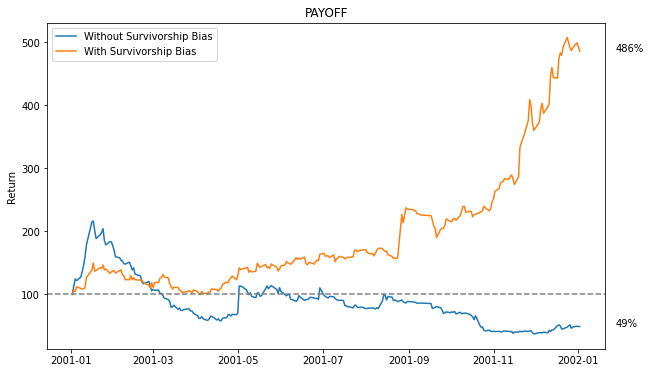

In [ ]:
code1 = ['ETYS', 'MDM', 'INTW', 'FDHG', 'OGNC', 'MPLX', 'GTS', 'BUYX', 'PSIX', 'INFD']
code2 = ['MDM', 'ENGA', 'NEOF', 'ENP', 'MVL', 'URBN', 'FNV', 'APT', 'FLIR', 'RAZF']
codes = code1 + code2

df_tmp = wrds.raw_sql(f"""
SELECT crsp.stocknames.permno, ticker, dlprc
FROM crsp.stocknames LEFT JOIN crsp.dsedelist ON crsp.stocknames.permno=crsp.dsedelist.permno
WHERE namedt <= '2001-01-02' AND nameenddt >= '2001-01-02' AND ticker IN ({', '.join(f"'{x}'" for x in codes)})
""")
dict_delist = dict(zip(df_tmp['ticker'], df_tmp['dlprc']))

df_crsp = wrds.raw_sql(f"""
SELECT crsp.dsf.permno, ticker, date, prc
FROM crsp.dsf LEFT JOIN crsp.stocknames ON crsp.dsf.permno = crsp.stocknames.permno 
WHERE date >= '2001-01-02' AND date <= '2002-01-02' AND crsp.dsf.permno IN ({', '.join(str(x) for x in df_tmp['permno'])})
""", date_cols=['date'])
df_crsp.drop_duplicates(inplace=True)
df_crsp['prc'] = np.abs(df_crsp['prc'])

df_pivot = df_crsp.pivot(index='date', columns='ticker', values='prc')
df_pivot.loc['2001-05']
for k, v in dict_delist.items():
  df_pivot[k].fillna(v, inplace=True)

df_pivot = df_pivot.pct_change() + 1
df_pivot.fillna(1, inplace=True)
df_pivot.iloc[0, :] = 10
df_pivot = df_pivot.cumprod()

df_not_survive = df_pivot[code1].copy()
df_not_survive['sum'] = df_not_survive.sum(axis=1)

df_survive = df_pivot[code2].copy()
df_survive['sum'] = df_survive.sum(axis=1)

y1 = df_not_survive['sum']
y2 = df_survive['sum']

plt.title('PAYOFF')
plt.plot(y1, label='Without Survivorship Bias')
plt.plot(y2, label='With Survivorship Bias')
plt.ylabel('Return')
plt.axhline(100, color='grey', linestyle='--')
plt.legend()

for var in (y1, y2):
    plt.annotate(f'{var[-1]:,.0f}%', xy=(1, var[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

- Beware that high/low prices are far more **volitile**
- **Sharpe ratios** and **drawdowns** provided best comparison among different strategies

$$\text{Annualized Sharpe Ratio} = \sqrt{N_T} \times \text{Sharpe Ratio based on }T$$

### Calculating Sharpe Ratio for Long-Only Vs Market Neutral Strategies

In [ ]:
def calculateMaxDD(cumRet):
# =============================================================================
# calculation of maximum drawdown and maximum drawdown duration based on
# cumulative COMPOUNDED returns. cumRet must be a compounded cumulative return.
# i is the index of the day with maxDD.
# j is the index of the day with maxDDD.
# =============================================================================
    highwatermark=np.zeros(cumRet.shape)
    drawdown=np.zeros(cumRet.shape)
    drawdownduration=np.zeros(cumRet.shape)
    
    for t in np.arange(1, cumRet.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumRet[t])
        drawdown[t]=(1+cumRet[t])/(1+highwatermark[t])-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
             
    maxDD, i=np.min(drawdown), np.argmin(drawdown) # drawdown < 0 always
    maxDDD, j=np.max(drawdownduration), np.argmax(drawdownduration)

    try:
      start_i = [k for k, x in enumerate(drawdown) if ((x == 0) & (k < i))][-1]
    except IndexError:
      start_i = 0
    start_j = int(j - maxDDD)

    return maxDD, maxDDD, start_i, start_j, i, j

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: Long `IGE`, Short `SPY`
- **Time Period (book)**: 2001-11-26 to 2007-11-14
- **Time Period (update)**: 2014-12-31 to now

In [ ]:
df = yf.download("IGE", start="2001-11-26", end="2007-11-14")
dailyRet=df.loc[:, 'Adj Close'].pct_change()
excessRet=dailyRet-0.04/252 #  excess daily returns = strategy returns - financing cost, assuming risk-free rate of 
sharpeRatio=np.sqrt(252)*np.mean(excessRet)/np.std(excessRet)
sharpeRatio

[*********************100%***********************]  1 of 1 completed


0.7871680367449051

In [ ]:
df = yf.download("IGE SPY", start="2001-11-26", end="2007-11-14")['Adj Close']
dailyRet=df.pct_change() # daily returns
netRet=(dailyRet['IGE']-dailyRet['SPY'])/2 # net daily return (divide by 2 because we now have twice as much capital.)
sharpeRatio=np.sqrt(252)*np.mean(netRet)/np.std(netRet)
sharpeRatio

[*********************100%***********************]  2 of 2 completed


0.7695267719732437

In [ ]:
df_plot = df.div(df.iloc[0]) * 100
df_plot['Alpha'] = df_plot['IGE'] - df_plot['SPY']

df_new = yf.download("IGE", start="2014-12-31",)
dailyRet_new=df_new.loc[:, 'Adj Close'].pct_change()
excessRet_new=dailyRet_new-0.04/252
sharpeRatio_new=np.sqrt(252)*np.mean(excessRet_new)/np.std(excessRet_new)
print(sharpeRatio_new)

df_new = yf.download("IGE SPY", start="2014-12-31",)['Adj Close']
dailyRet_new=df_new.pct_change() # daily returns
netRet_new=(dailyRet_new['IGE']-dailyRet_new['SPY'])/2
sharpeRatio_new=np.sqrt(252)*np.mean(netRet_new)/np.std(netRet_new)
print(sharpeRatio_new)

df_plot_new = df_new.div(df_new.iloc[0]) * 100
df_plot_new['Alpha'] = df_plot_new['IGE'] - df_plot_new['SPY']
df_plot

[*********************100%***********************]  1 of 1 completed
-0.08607780303364664
[*********************100%***********************]  2 of 2 completed
-0.6807265485317209


IGE         SPY       Alpha
Date                                          
2001-11-26  100.000000  100.000000    0.000000
2001-11-27  100.000000   99.568719    0.431281
2001-11-28  100.000000   97.765887    2.234113
2001-11-29  100.000000   99.085652    0.914348
2001-11-30  100.340624   98.378311    1.962313
...                ...         ...         ...
2007-11-07  314.542435  141.442455  173.099980
2007-11-08  316.583942  140.725256  175.858687
2007-11-09  311.028888  138.793621  172.235268
2007-11-12  296.453206  137.416582  159.036624
2007-11-13  302.198041  141.605020  160.593021

[1503 rows x 3 columns]

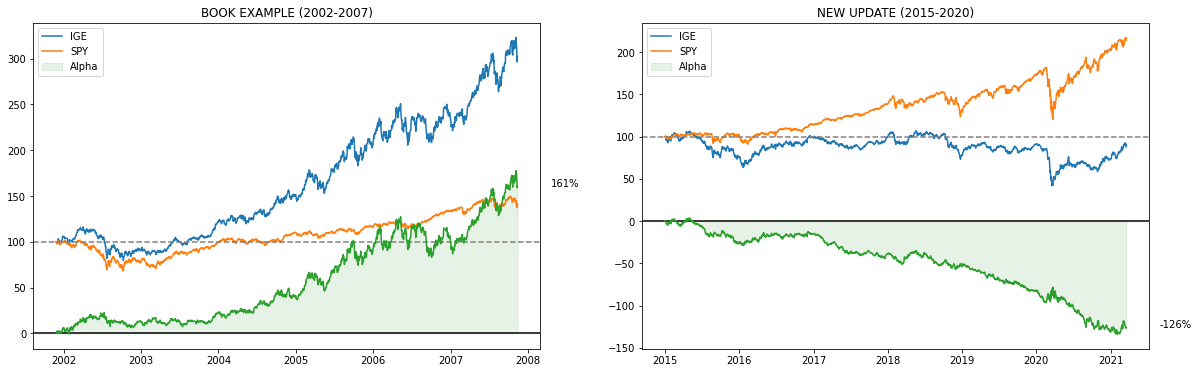

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title('BOOK EXAMPLE (2002-2007)')
ax1.plot(df_plot['IGE'], label='IGE')
ax1.plot(df_plot['SPY'], label='SPY')
ax1.axhline(y=100.0, color='grey', linestyle='--')
ax1.axhline(y=0.0, color='k')
ax1.plot(df_plot['Alpha'])
ax1.fill_between(df_plot.index, df_plot['Alpha'], where=((df_plot.index <= df_plot.index[-1]) & (df_plot.index >= df_plot.index[0]) ), color='green', alpha=0.1, label='Alpha')
ax1.legend()
ax1.annotate(f'{df_plot["Alpha"][-1] :,.0f}%', xy=(1, df_plot["Alpha"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax2.set_title('NEW UPDATE (2015-2020)')
ax2.plot(df_plot_new['IGE'], label='IGE')
ax2.plot(df_plot_new['SPY'], label='SPY')
ax2.axhline(y=100.0, color='grey', linestyle='--')
ax2.axhline(y=0.0, color='k')
ax2.plot(df_plot_new['Alpha'])
ax2.fill_between(df_plot_new.index, df_plot_new['Alpha'], where=((df_plot_new.index <= df_plot_new.index[-1]) & (df_plot_new.index >= df_plot_new.index[0]) ), color='green', alpha=0.1, label='Alpha')
ax2.legend()
ax2.annotate(f'{df_plot_new["Alpha"][-1] :,.0f}%', xy=(1, df_plot_new["Alpha"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

In [ ]:
cumRet=np.cumprod(1+netRet)-1
maxDrawdown, maxDrawdownDuration, startDrawdownDay, startDrawdownDurationDay, endDrawdownDay, endDrawdownDurationDay=calculateMaxDD(cumRet.values)
print(maxDrawdown)
print(maxDrawdownDuration)
print(endDrawdownDay)
print(endDrawdownDurationDay)
print(startDrawdownDay)
print(startDrawdownDurationDay)

cumRet_new=np.cumprod(1+netRet_new)-1
maxDD2, maxDDD2, startDD2, startDDD2, endDD2, endDDD2 = calculateMaxDD(cumRet_new.values)
print(maxDD2, maxDDD2, startDD2, startDDD2, endDD2, endDDD2)

-0.09686753626353117
498.0
1290
653
1166
155
-0.42570597108998554 1481.0 82 82 1311 1563


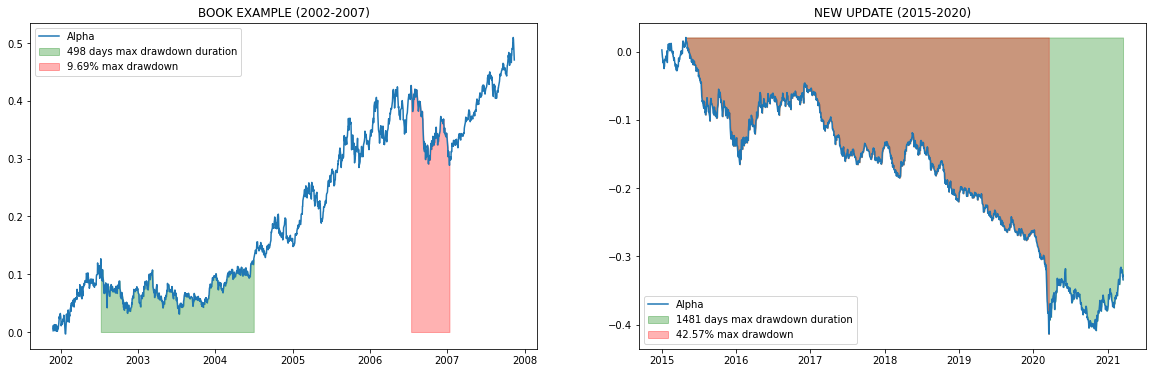

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title('BOOK EXAMPLE (2002-2007)')
ax1.plot(cumRet, label='Alpha')
ax1.fill_between(cumRet.index, cumRet, where=((cumRet.index <= cumRet.index[endDrawdownDurationDay]) & (cumRet.index >= cumRet.index[startDrawdownDurationDay]) ), color='green', alpha=0.3, label=f'{int(maxDrawdownDuration)} days max drawdown duration')
ax1.fill_between(cumRet.index, cumRet, where=((cumRet.index <= cumRet.index[endDrawdownDay]) & (cumRet.index >= cumRet.index[startDrawdownDay]) ), color='red', alpha=0.3, label=f'{maxDrawdown * -100:0.2f}% max drawdown')
ax1.legend()

ax2.set_title('NEW UPDATE (2015-2020)')
ax2.plot(cumRet_new, label='Alpha')
ax2.fill_between(cumRet_new.index, cumRet_new, np.max(cumRet_new), where=((cumRet_new.index <= cumRet_new.index[endDDD2]) & (cumRet_new.index >= cumRet_new.index[startDDD2]) ), color='green', alpha=0.3, label=f'{int(maxDDD2)} days max drawdown duration')
ax2.fill_between(cumRet_new.index, cumRet_new, np.max(cumRet_new), where=((cumRet_new.index <= cumRet_new.index[endDD2]) & (cumRet_new.index >= cumRet_new.index[startDD2]) ), color='red', alpha=0.3, label=f'{maxDD2 * -100:0.2f}% max drawdown')
ax2.legend(loc='lower left')

plt.show()

### Normal Distributions

In [ ]:
slider_mean = widgets.FloatSlider(min=-2, max=2, step=0.1, value=-2, description='Mean: ', layout=Layout(width='600px'))
slider_std = widgets.FloatSlider(min=0.4, max=2, step=0.1, value=0.4, description='Stdev: ', layout=Layout(width='600px'))
slider_prob = widgets.FloatSlider(min=-4, max=4, step=0.1, value=-4, description='Prob: ', layout=Layout(width='600px'))

checkbox_second = widgets.Checkbox(value=False, description='Second Distribution', indent=True)
checkbox_aim = widgets.Checkbox(value=False, description='Guide Lines', indent=True)

def update_plot(mean, stdev, second=False, aim=False, prob=-4):

  fig, ax = plt.subplots(1, 1, figsize=(10, 6))
  x_axis = np.arange(-3, 3, 0.01)

  ax.set_title('Normal Distribution')
  ax.plot(x_axis, norm.pdf(x_axis, 0, 1), label='Normal')
  ax.set_xlim(-3, 3)
  
  if second:
    ax.plot(x_axis, norm.pdf(x_axis, mean, stdev), label='Custom')
    ax.set_ylim(0, 1)

  if aim:
    ax.annotate(s='', xy=(-1, np.exp(-.5) / np.sqrt(2 * np.pi)), xytext=(1, np.exp(-.5) / np.sqrt(2 * np.pi)), arrowprops=dict(ec="r", ls='--', lw=5, arrowstyle="<|-|>", alpha=0.5))
    ax.annotate(s='', xy=(0, 0), xytext=(0, 1 / np.sqrt(2 * np.pi)), arrowprops=dict(ec="r", ls='--', lw=5, arrowstyle="<|-|>", alpha=0.5))

    if second:
      ax.annotate(s='', xy=(mean - stdev, np.exp(-.5) / (stdev * np.sqrt(2 * np.pi))), xytext=(mean + stdev, np.exp(-.5) / (stdev * np.sqrt(2 * np.pi))), arrowprops=dict(ec="b", ls='--', lw=5, arrowstyle="<|-|>", alpha=0.5))
      ax.annotate(s='', xy=(mean, 0), xytext=(mean, 1 / (stdev * np.sqrt(2 * np.pi))), arrowprops=dict(ec="b", ls='--', lw=5, arrowstyle="<|-|>", alpha=0.5))

  if prob != -4.:
    ax.fill_between(x_axis, norm.pdf(x_axis, 0, 1), where=(x_axis <= prob), color='green', alpha=0.1, label=f'Prob = {norm.cdf(prob) * 100:2.2f}%')

  ax.legend()
  ax.axhline(y=0., color='grey', linestyle='-')


  plt.show()

interactive(update_plot, mean=slider_mean, stdev=slider_std, second=checkbox_second, aim=checkbox_aim, prob=slider_prob)  #(-1.0, 2.0, .001), std=(-1.0, 1.0, .01)) #mean=slider_mean, stdev=slider_std)


interactive(children=(FloatSlider(value=-2.0, description='Mean: ', layout=Layout(width='600px'), max=2.0, min…

$$ N(\mu, \sigma) = \frac{1}{\sqrt{2\pi}} \exp \left[ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right] $$

### Pitfalls
- Survivorship bias
- Look-ahead bias (e.g. day high/low)
- Data-Snooping
  - Sample size = 252 * number of free parameters
  - Out-samples test (paper trade)
  - Sensitivity analysis
  - Prevention:
    - **Cross-validation**: use subset of in-sample data under limited data
    - Strategies with high SR and short maxDDD help passes CV tests
    - Favor **simple models**, Occam's razor: beauty of linearity
    - Not only linear price prediction formula, but also **linear capital allocation formula**

$$Z_i = \frac{f_i - \mu_f}{\sigma_f}, \qquad R = \mu_R + \sigma_R \cdot \frac{\sum sign_i Z_i}{n}, \qquad rank^s = \sum sign_i \cdot rank_i^s$$

# [Greenblatt] Magic Formula


<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: Long `IGE`, Short `SPY`
- **Time Period (book)**: 2001-11-26 to 2007-11-14
- **Time Period (update)**: 2014-12-31 to now

### Pitfalls (Cont'd)
- Transaction Cost
- Strategy refinement
- Stock Splits and Dividend Adjustments
  - What is done to the ex-date, do the same adjustments with the previous days

- Primary VS Consolidated Stock Prices (US Only)
  - Careful on **market-on-open / market-on-close** orders
  - **(??) The close and 
open prices on the U.S. primary exchanges are always determined by an 
auction, while a transaction at the close on a secondary exchange is not the 
result of an auction. (??)**  
  - Do entertain a healthy skepticism of our backtest results given no access to such primary data

- Venue Dependence of Currency Quotes
  - Cannot access transaction info

- Short-Sale Constraint
  - Hard to borrow

- Future Continuous Contracts (Rollover)
  - Specific Time (10 days before expiration)
  - Specific Condition (Open Interest Crossover)
  - Price Adjustments might result **negative as well** when dated far back
  - Especially in calendar spread scaling, choice of adjustment become fatal
  - **Difference**: Price Adjustment, **Ratio**: Return Adjustment

Say, the contract prices are:

 | Trading Date | Front Contract | Back Contract| Unadjusted Contract | Price Adjustment Before Rollover | Return Adjustment
| :-: |  :-: |  :-: |   :-: |  :-: |  :-: |  
$T$ | $p(T)$ | --- | $p(T)$ | $p(T)  \color{red} {+ q(T+1) - p(T+1)}$ | $p(T) \color{red} {\cdot \cfrac{q(T+1)}{p(T+1)}}$ 
$T+1$ | $p(T+1)$ | $q(T+1)$ | $q(T+1)$ | $q(T+1)$ |  $q(T+1)$

Before Rollover:

$$\text{P&L}: \quad \color{blue} {p(T+1) - p(T)}, \qquad \text{Return}: \quad \color{blue} {\frac{p(T+1) - p(T)}{p(T)} = \frac{p(T+1) }{p(T)} - 1} $$
Unjusted prices becomes:
$$\text{P&L}: \quad q(T+1) - p(T), \qquad \text{Return}: \quad \frac{q(T+1) - p(T)}{p(T)} = \frac{q(T+1)}{p(T)} -1$$

Price Adjustment:
$$\text{P&L}: \quad q(T+1) - [p(T) \color{red} {+ q(T+1) - p(T+1)}]=\color{blue} {p(T+1) - p(T)}$$ 
$$\text{Return}: \quad \frac{q(T+1) - [p(T) \color{red} {+ q(T+1) - p(T+1)}]}{[p(T) \color{red} {+ q(T+1) - p(T+1)}]} = \frac{p(T+1) - p(T)}{p(T) + q(T+1) - p(T+1)}  $$

Return Adjustment:
$$\text{P&L}: \quad q(T+1) - \left[ p(T) \color{red} {\cdot \cfrac{q(T+1)}{p(T+1)}} \right]=p(T+1) - p(T)$$ 
$$\text{Return}: \quad \frac{q(T+1)}{\left[ p(T) \color{red} {\cdot \cfrac{q(T+1)}{p(T+1)}} \right]} - 1 = \color{blue} { \frac{p(T+1) }{p(T)} - 1}  $$



- Future Close VS Settlement Price
  - Use **Settlement Price** whenever possible, which likely to be in most of the cases, except for intraday trading


### Pair Trading of GLD and GDX

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: Long `GLD`, Short `GDX`
- **Time Period (book)**: 2006-05-23 to 2007-11-30
- **Time Period (update)**: 2019-07-01 to now

[*********************100%***********************]  2 of 2 completed


1.788030074778274

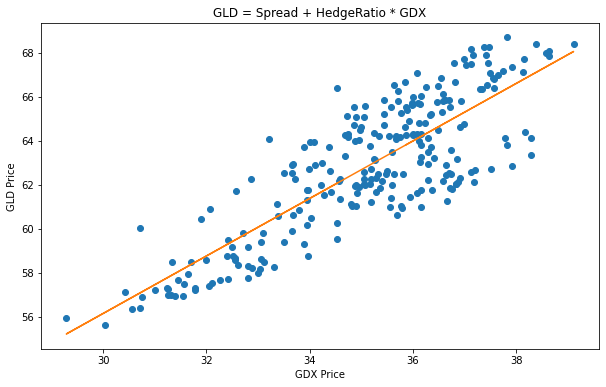

In [ ]:
df = yf.download("GLD GDX", start="2006-05-23", end="2007-11-30")['Adj Close']

trainset=252
gld = df.iloc[:trainset, 1]
gdx = df.iloc[:trainset, 0]

#model=sm.OLS(gld, sm.add_constant(gdx))
model=sm.OLS(gld, gdx)
results=model.fit()
m, b = np.polyfit(gdx, gld, 1)

plt.title('GLD = Spread + HedgeRatio * GDX')
plt.xlabel('GDX Price')
plt.ylabel('GLD Price')
plt.plot(gdx, gld, 'o')
plt.plot(gdx, m * gdx + b)

hedgeRatio=results.params[-1]
hedgeRatio

In [ ]:
# spread = GLD - hedgeRatio * GDX
spread=df['GLD'] - hedgeRatio * df['GDX']
spreadMean=np.mean(spread.iloc[:trainset])
spreadMean

0.052229483165301877

In [ ]:
spreadStd=np.std(spread.iloc[:trainset])
spreadStd

1.9452824719753172

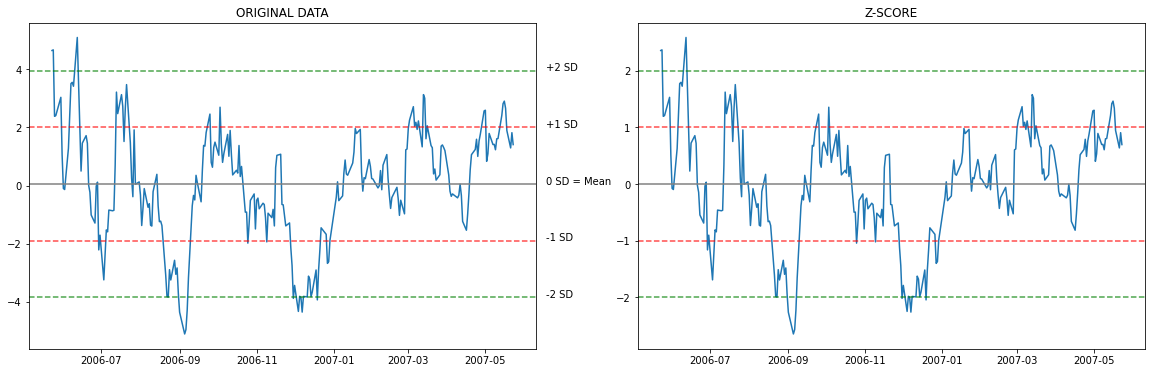

In [ ]:
df['zscore']=(spread-spreadMean)/spreadStd

df['positions_GLD_Long']=0
df['positions_GDX_Long']=0
df['positions_GLD_Short']=0
df['positions_GDX_Short']=0

df.loc[df.zscore>=2, ('positions_GLD_Short', 'positions_GDX_Short')]=[-1, 1] # Short spread
df.loc[df.zscore<=-2, ('positions_GLD_Long', 'positions_GDX_Long')]=[1, -1] # Buy spread
df.loc[df.zscore<=1, ('positions_GLD_Short', 'positions_GDX_Short')]=0 # Exit short spread
df.loc[df.zscore>=-1, ('positions_GLD_Long', 'positions_GDX_Long')]=0 # Exit long spread

df.fillna(method='ffill', inplace=True) # ensure existing positions are carried forward unless there is an exit signal

positions_Long=df.loc[:, ('positions_GLD_Long', 'positions_GDX_Long')]
positions_Short=df.loc[:, ('positions_GLD_Short', 'positions_GDX_Short')]
positions=np.array(positions_Long)+np.array(positions_Short)
positions=pd.DataFrame(positions, index=df.index, columns=['GLD', 'GDX'])

dailyRet=df.loc[:, ('GLD', 'GDX')].pct_change()
pnl=(np.array(positions.shift())*np.array(dailyRet)).sum(axis=1)
pnl_df = pd.DataFrame(pnl, index=df.index, columns=['pnl'])
pnl_df += 1

pnl1 = pnl_df.iloc[:252, :].copy()
pnl2 = pnl_df.iloc[252:, :].copy()

pnl1.iloc[0] = 100
pnl1 = pnl1.cumprod()

pnl2.iloc[0] = 100
pnl2 = pnl2.cumprod()

maxDD1, maxDDD1, startDD1, startDDD1, endDD1, endDDD1=calculateMaxDD(pnl1['pnl'].values)
maxDD2, maxDDD2, startDD2, startDDD2, endDD2, endDDD2=calculateMaxDD(pnl2['pnl'].values)

z_spread=(spread - spreadMean) / spreadStd
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.set_title('ORIGINAL DATA')
ax1.plot(spread.iloc[:trainset], label='Training Set')
ax1.axhline(y=spreadMean + 2.0 * spreadStd, color='green', linestyle='--', alpha=0.7)
ax1.axhline(y=spreadMean + 1.0 * spreadStd, color='red', linestyle='--', alpha=0.7)
ax1.axhline(y=spreadMean, color='grey', linestyle='-')
ax1.axhline(y=spreadMean - 1.0 * spreadStd, color='red', linestyle='--', alpha=0.7)
ax1.axhline(y=spreadMean - 2.0 * spreadStd, color='green', linestyle='--', alpha=0.7)

ax1.annotate(f'0 SD = Mean', xy=(1, spreadMean), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax1.annotate(f'+1 SD', xy=(1, spreadMean + 1.0 * spreadStd), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'+2 SD', xy=(1, spreadMean + 2.0 * spreadStd), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax1.annotate(f'-1 SD', xy=(1, spreadMean - 1.0 * spreadStd), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'-2 SD', xy=(1, spreadMean - 2.0 * spreadStd), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax2.set_title('Z-SCORE')
ax2.plot(z_spread.iloc[:trainset], label='Training Set')

ax2.axhline(y=2.0, color='green', linestyle='--', alpha=0.7)
ax2.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
ax2.axhline(y=0.0, color='grey', linestyle='-')
ax2.axhline(y=-1.0, color='red', linestyle='--', alpha=0.7)
ax2.axhline(y=-2.0, color='green', linestyle='--', alpha=0.7)


plt.show()

In [ ]:
df_new = yf.download("GLD GDX", start="2019-07-01")['Adj Close']

trainset=252
gld_new = df_new.iloc[:trainset,1]
gdx_new = df_new.iloc[:trainset,0]

# model_new=sm.OLS(gld_new, sm.add_constant(gdx_new))
model_new=sm.OLS(gld_new, gdx_new)
results_new=model_new.fit()

hedgeRatio_new=results_new.params[-1]
spread_new=df_new['GLD'] - hedgeRatio_new * df_new['GDX']
spreadMean_new=np.mean(spread_new.iloc[:trainset])
spreadStd_new=np.std(spread_new.iloc[:trainset])

df_new['zscore']=(spread_new-spreadMean_new)/spreadStd_new
df_new['positions_GLD_Long']=0
df_new['positions_GDX_Long']=0
df_new['positions_GLD_Short']=0
df_new['positions_GDX_Short']=0

df_new.loc[df_new.zscore>=2, ('positions_GLD_Short', 'positions_GDX_Short')]=[-1, 1] # Short spread
df_new.loc[df_new.zscore<=-2, ('positions_GLD_Long', 'positions_GDX_Long')]=[1, -1] # Buy spread
df_new.loc[df_new.zscore<=1, ('positions_GLD_Short', 'positions_GDX_Short')]=0 # Exit short spread
df_new.loc[df_new.zscore>=-1, ('positions_GLD_Long', 'positions_GDX_Long')]=0 # Exit long spread

df_new.fillna(method='ffill', inplace=True) # ensure existing positions are carried forward unless there is an exit signal

positions_Long_new=df_new.loc[:, ('positions_GLD_Long', 'positions_GDX_Long')]
positions_Short_new=df_new.loc[:, ('positions_GLD_Short', 'positions_GDX_Short')]
positions_new=np.array(positions_Long_new)+np.array(positions_Short_new)
positions_new=pd.DataFrame(positions_new, index=df_new.index, columns=['Adj Close_GLD', 'Adj Close_GDX'])

dailyRet_new=df_new.loc[:, ('GLD', 'GDX')].pct_change()
pnl_new=(np.array(positions_new.shift())*np.array(dailyRet_new)).sum(axis=1)
pnl_df_new = pd.DataFrame(pnl_new, index=df_new.index, columns=['pnl'])
pnl_df_new += 1

pnl1_new = pnl_df_new.iloc[:252, :].copy()
pnl2_new = pnl_df_new.iloc[252:, :].copy()

pnl1_new.iloc[0] = 100
pnl1_new = pnl1_new.cumprod()

pnl2_new.iloc[0] = 100
pnl2_new = pnl2_new.cumprod()

maxDD1_new, maxDDD1_new, startDD1_new, startDDD1_new, endDD1_new, endDDD1_new=calculateMaxDD(pnl1_new['pnl'].values)
maxDD2_new, maxDDD2_new, startDD2_new, startDDD2_new, endDD2_new, endDDD2_new=calculateMaxDD(pnl2_new['pnl'].values)

z_spread_new=(spread_new - spreadMean_new) / spreadStd_new
hedgeRatio_new

[*********************100%***********************]  2 of 2 completed


5.107487168296318

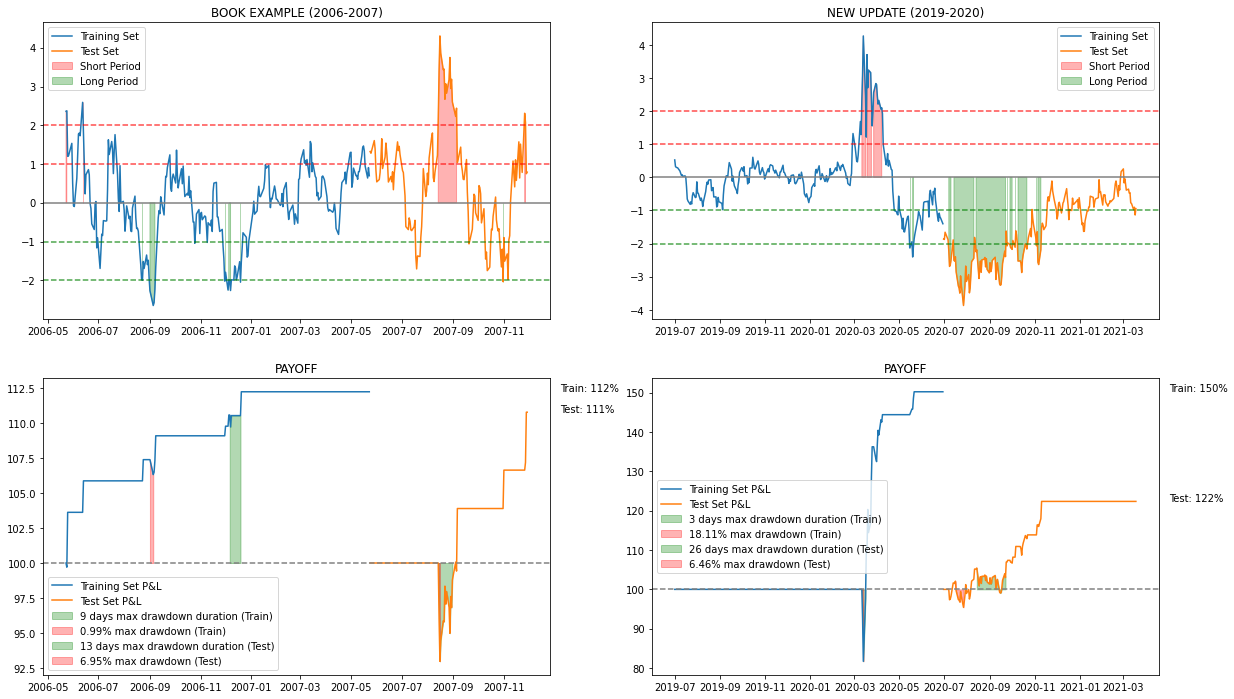

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].set_title('BOOK EXAMPLE (2006-2007)')
ax[0, 0].plot(z_spread.iloc[:trainset], label='Training Set')
ax[0, 0].plot(z_spread.iloc[trainset:], label='Test Set')
ax[0, 0].fill_between( z_spread.index, z_spread, where=(df['positions_GLD_Short'] == -1), color='red', alpha=0.3, label='Short Period')
ax[0, 0].fill_between( z_spread.index, z_spread, where=(df['positions_GLD_Long'] == 1), color='green', alpha=0.3, label='Long Period')
ax[0, 0].axhline(y=2.0, color='red', linestyle='--', alpha=0.7)
ax[0, 0].axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
ax[0, 0].axhline(y=0.0, color='grey', linestyle='-')
ax[0, 0].axhline(y=-1.0, color='green', linestyle='--', alpha=0.7)
ax[0, 0].axhline(y=-2.0, color='green', linestyle='--', alpha=0.7)
ax[0, 0].legend()

ax[1, 0].set_title('PAYOFF')
ax[1, 0].plot(pnl1, label='Training Set P&L')
ax[1, 0].fill_between(pnl1.index, pnl1['pnl'], 100.0, where=((pnl1.index <= pnl1.index[endDDD1]) & (pnl1.index >= pnl1.index[startDDD1]) ), color='green', alpha=0.3, label=f'{int(maxDDD1)} days max drawdown duration (Train)')
ax[1, 0].fill_between(pnl1.index, pnl1['pnl'], 100.0, where=((pnl1.index <= pnl1.index[endDD1]) & (pnl1.index >= pnl1.index[startDD1]) ), color='red', alpha=0.3, label=f'{maxDD1 * -100:0.2f}% max drawdown (Train)')
ax[1, 0].fill_between(pnl2.index, pnl2['pnl'], 100.0, where=((pnl2.index <= pnl2.index[endDDD2]) & (pnl2.index >= pnl2.index[startDDD2]) ), color='green', alpha=0.3, label=f'{int(maxDDD2)} days max drawdown duration (Test)')
ax[1, 0].fill_between(pnl2.index, pnl2['pnl'], 100.0, where=((pnl2.index <= pnl2.index[endDD2]) & (pnl2.index >= pnl2.index[startDD2]) ), color='red', alpha=0.3, label=f'{maxDD2 * -100:0.2f}% max drawdown (Test)')

ax[1, 0].plot(pnl2, label='Test Set P&L')
ax[1, 0].axhline(y=100.0, color='grey', linestyle='--')
ax[1, 0].legend()

ax[1, 0].annotate(f'Train: {pnl1["pnl"][-1] :,.0f}%', xy=(1, pnl1["pnl"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax[1, 0].annotate(f'Test: {pnl2["pnl"][-1] :,.0f}%', xy=(1, pnl2["pnl"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax[0, 1].set_title('NEW UPDATE (2019-2020)')
ax[0, 1].plot(z_spread_new.iloc[:trainset], label='Training Set')
ax[0, 1].plot(z_spread_new.iloc[trainset:], label='Test Set')
ax[0, 1].fill_between( z_spread_new.index, z_spread_new, where=(df_new['positions_GLD_Short'] == -1), color='red', alpha=0.3, label='Short Period')
ax[0, 1].fill_between( z_spread_new.index, z_spread_new, where=(df_new['positions_GLD_Long'] == 1), color='green', alpha=0.3, label='Long Period')
ax[0, 1].axhline(y=2.0, color='red', linestyle='--', alpha=0.7)
ax[0, 1].axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
ax[0, 1].axhline(y=0.0, color='grey', linestyle='-')
ax[0, 1].axhline(y=-1.0, color='green', linestyle='--', alpha=0.7)
ax[0, 1].axhline(y=-2.0, color='green', linestyle='--', alpha=0.7)
ax[0, 1].legend()

ax[1, 1].set_title('PAYOFF')
ax[1, 1].plot(pnl1_new, label='Training Set P&L')
ax[1, 1].fill_between(pnl1_new.index, pnl1_new['pnl'], 100.0, where=((pnl1_new.index <= pnl1_new.index[endDDD1_new]) & (pnl1_new.index >= pnl1_new.index[startDDD1_new]) ), color='green', alpha=0.3, label=f'{int(maxDDD1_new)} days max drawdown duration (Train)')
ax[1, 1].fill_between(pnl1_new.index, pnl1_new['pnl'], 100.0, where=((pnl1_new.index <= pnl1_new.index[endDD1_new]) & (pnl1_new.index >= pnl1_new.index[startDD1_new]) ), color='red', alpha=0.3, label=f'{maxDD1_new * -100:0.2f}% max drawdown (Train)')
ax[1, 1].fill_between(pnl2_new.index, pnl2_new['pnl'], 100.0, where=((pnl2_new.index <= pnl2_new.index[endDDD2_new]) & (pnl2_new.index >= pnl2_new.index[startDDD2_new]) ), color='green', alpha=0.3, label=f'{int(maxDDD2_new)} days max drawdown duration (Test)')
ax[1, 1].fill_between(pnl2_new.index, pnl2_new['pnl'], 100.0, where=((pnl2_new.index <= pnl2_new.index[endDD2_new]) & (pnl2_new.index >= pnl2_new.index[startDD2_new]) ), color='red', alpha=0.3, label=f'{maxDD2_new * -100:0.2f}% max drawdown (Test)')

ax[1, 1].plot(pnl2_new, label='Test Set P&L')
ax[1, 1].axhline(y=100.0, color='grey', linestyle='--')
ax[1, 1].legend()

ax[1, 1].annotate(f'Train: {pnl1_new["pnl"][-1] :,.0f}%', xy=(1, pnl1_new["pnl"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax[1, 1].annotate(f'Test: {pnl2_new["pnl"][-1] :,.0f}%', xy=(1, pnl2_new["pnl"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()


In [ ]:
sharpeTrainset=np.sqrt(252)*np.mean(pnl[1:trainset])/np.std(pnl[1:trainset])
sharpeTrainset

2.1214614227666138

In [ ]:
sharpeTestset=np.sqrt(252)*np.mean(pnl[trainset:])/np.std(pnl[trainset:])
sharpeTestset

1.5000170960235206

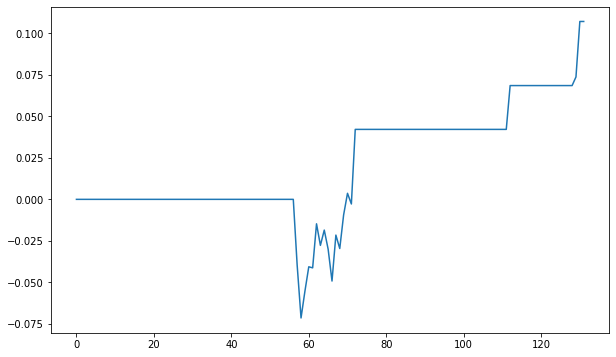

In [ ]:
plt.plot(np.cumsum(pnl[trainset:]))

### Simple Mean-Reverting Model (Transaction Costs)

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Pool**: S&P500 Companies Selected at 2006-12-31 / now
- **Strategy**: 
  - Use mean(t-1) as benchmark
  - Buy stocks with negative bias
  - Short stocks with positive bias
  - Quantity proportional with degree of bias

- **Time Period (book)**: 2005-12-30 to 2006-12-31
- **Time Period (update)**: 2019-12-30 to now

In [ ]:
df_tmp = wrds.raw_sql("""
SELECT ticker, date, prc, openprc, cfacpr
FROM crsp.dsp500list 
LEFT JOIN crsp.stocknames ON crsp.dsp500list.permno=crsp.stocknames.permno
LEFT JOIN crsp.dsf ON crsp.dsp500list.permno=crsp.dsf.permno
WHERE start <= '2006-12-31' AND ending >= '2006-12-31' AND namedt <= '2006-12-31' AND nameenddt >= '2006-12-31' AND date >= '2005-12-30' AND date <= '2006-12-31'""", date_cols=['date'])

df_tmp['prc'] = np.abs(df_tmp['prc'])
df_pivot = df_tmp.pivot(index='date', columns='ticker', values='prc')
df_factor = df_tmp.pivot(index='date', columns='ticker', values='cfacpr')
df_factor = df_factor.div(df_factor.iloc[-1])
df_pivot = df_pivot.div(df_factor)

dailyRet=df_pivot.pct_change()
marketDailyRet=dailyRet.mean(axis=1)

weights=-(dailyRet.sub(marketDailyRet, axis=0))
wtSum=abs(weights).sum(axis=1)
weights=weights.div(wtSum, axis=0)
dailyPnl = (weights.shift().mul(dailyRet)).sum(axis=1)
dailyPnl = dailyPnl['2006']

sharpeRatio=np.sqrt(252) * dailyPnl.mean() / dailyPnl.std()
sharpeRatio

0.3429223235830494

In [ ]:
# With transaction cost
oneWayTCost=0.0005
weights=weights['2006']
dailyPnlMinustCost=dailyPnl - abs(weights.diff()).sum(axis=1)*oneWayTCost

sharpeRatioMinusTcost=np.sqrt(252) * dailyPnlMinustCost.mean() / dailyPnlMinustCost.std()
sharpeRatioMinusTcost

-3.7877815373183465

In [ ]:
cumRet = dailyPnl + 1
cumRet[datetime.datetime(2005,12,30)] = 100
cumRet.sort_index(inplace=True)
cumRet = cumRet.cumprod()

cumRet_cost = dailyPnlMinustCost + 1
cumRet_cost[datetime.datetime(2005,12,30)] = 100
cumRet_cost.sort_index(inplace=True)
cumRet_cost = cumRet_cost.cumprod()

spy = yf.download("SPY", start="2005-12-30", end="2006-12-31")
spy = spy['Adj Close'].pct_change()
sharpeRatioSPY=np.sqrt(252) * spy.mean() / spy.std()
spy += 1
spy[0] = 100.0
spy = spy.cumprod()

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
stocklist = sp500['Symbol'].str.replace('.', '-').tolist()

df_new = yf.download(stocklist, start="2019-12-30")
df_new.sort_index(inplace=True)
df_new.dropna(how='all', axis=0, inplace=True)

df_open_new = df_new['Open']
df_new = df_new['Adj Close']
print(df_new)

dailyRet_new=df_new.pct_change()
marketDailyRet_new=dailyRet_new.mean(axis=1)

weights_new=-(dailyRet_new.sub(marketDailyRet_new, axis=0))
wtSum_new=abs(weights_new).sum(axis=1)
weights_new=weights_new.div(wtSum_new, axis=0)
dailyPnl_new = (weights_new.shift().mul(dailyRet_new)).sum(axis=1)
sharpeRatio_new=np.sqrt(252) * dailyPnl_new.mean() / dailyPnl_new.std()

# With transaction cost
oneWayTCost=0.0005
dailyPnlMinustCost_new=dailyPnl_new - abs(weights_new.diff()).sum(axis=1)*oneWayTCost
sharpeRatioMinusTcost_new=np.sqrt(252) * dailyPnlMinustCost_new.mean() / dailyPnlMinustCost_new.std()

cumRet_new = dailyPnl_new + 1
cumRet_new[0] = 100
cumRet_new.sort_index(inplace=True)
cumRet_new = cumRet_new.cumprod()

cumRet_cost_new = dailyPnlMinustCost_new + 1
cumRet_cost_new[0] = 100
cumRet_cost_new.sort_index(inplace=True)
cumRet_cost_new = cumRet_cost_new.cumprod()

spy_new = yf.download("SPY", start="2019-12-31")
spy_new = spy_new['Adj Close'].pct_change()
sharpeRatioSPY_new=np.sqrt(252) * spy_new.mean() / spy_new.std()
spy_new += 1
spy_new[0] = 100.0
spy_new = spy_new.cumprod()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  505 of 505 completed
                     A        AAL  ...       ZION         ZTS
Date                               ...                       
2019-12-30   84.216827  28.195801  ...  49.553963  131.253479
2019-12-31   84.623528  28.574404  ...  49.697544  131.392456
2020-01-02   85.258377  28.982893  ...  50.195282  133.169510
2020-01-03   83.889473  27.548195  ...  49.486965  133.189362
2020-01-06   84.137466  27.219410  ...  48.883930  132.166824
...                ...        ...  ...        ...         ...
2021-03-12  121.440002  23.370001  ...  59.060001  152.570007
2021-03-15  124.040001  25.170000  ...  57.720001  154.839996
2021-03-16  123.000000  24.469999  ...  56.400002  155.029999
2021-03-17  122.519997  25.160000  ...  56.750000  156.169998
2021-03-18  122.589996  24.700001  ...  57.299999  152.419998

[307 rows x 505 columns]
[*********************100%

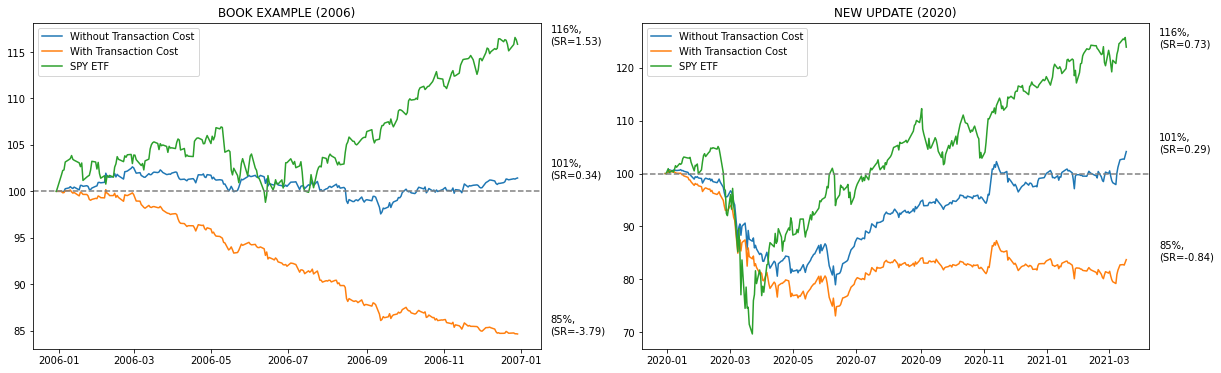

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.set_title('BOOK EXAMPLE (2006)')
ax1.plot(cumRet, label='Without Transaction Cost')
ax1.plot(cumRet_cost, label='With Transaction Cost')
ax1.plot(spy, label=f'SPY ETF')
ax1.axhline(y=100.0, color='grey', linestyle='--')
ax1.legend()

ax1.annotate(f'{spy[-1] :,.0f}%,\n(SR={sharpeRatioSPY:.2f})', xy=(1, spy[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'{cumRet[-1] :,.0f}%,\n(SR={sharpeRatio:.2f})', xy=(1, cumRet[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'{cumRet_cost[-1] :,.0f}%,\n(SR={sharpeRatioMinusTcost:.2f})', xy=(1, cumRet_cost[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax2.set_title('NEW UPDATE (2020)')
ax2.plot(cumRet_new, label='Without Transaction Cost')
ax2.plot(cumRet_cost_new, label='With Transaction Cost')
ax2.plot(spy_new, label=f'SPY ETF')
ax2.axhline(y=100.0, color='grey', linestyle='--')
ax2.legend()

ax2.annotate(f'{spy[-1] :,.0f}%,\n(SR={sharpeRatioSPY_new:.2f})', xy=(1, spy_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax2.annotate(f'{cumRet[-1] :,.0f}%,\n(SR={sharpeRatio_new:.2f})', xy=(1, cumRet_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax2.annotate(f'{cumRet_cost[-1] :,.0f}%,\n(SR={sharpeRatioMinusTcost_new:.2f})', xy=(1, cumRet_cost_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

### Simple Mean-Reverting Model with open prices

In [ ]:
df_pivot = df_tmp.pivot(index='date', columns='ticker', values='openprc')
df_pivot = df_pivot.div(df_factor)

dailyRet=df_pivot.pct_change()
marketDailyRet=dailyRet.mean(axis=1)

weights=-(dailyRet.sub(marketDailyRet, axis=0))
wtSum=abs(weights).sum(axis=1)
weights=weights.div(wtSum, axis=0)
dailyPnl = (weights.shift().mul(dailyRet)).sum(axis=1)
dailyPnl = dailyPnl['2006']

sharpeRatio=np.sqrt(252) * dailyPnl.mean() / dailyPnl.std()
sharpeRatio

4.823905834176126

In [ ]:
# With transaction cost
oneWayTCost=0.0005
weights=weights['2006']
dailyPnlMinustCost=dailyPnl - abs(weights.diff()).sum(axis=1)*oneWayTCost

sharpeRatioMinusTcost=np.sqrt(252) * dailyPnlMinustCost.mean() / dailyPnlMinustCost.std()
sharpeRatioMinusTcost

0.8456059569581401

In [ ]:
cumRet = dailyPnl + 1
cumRet[datetime.datetime(2005,12,30)] = 100
cumRet.sort_index(inplace=True)
cumRet = cumRet.cumprod()

cumRet_cost = dailyPnlMinustCost + 1
cumRet_cost[datetime.datetime(2005,12,30)] = 100
cumRet_cost.sort_index(inplace=True)
cumRet_cost = cumRet_cost.cumprod()

spy = yf.download("SPY", start="2005-12-30", end="2006-12-31")
spy = spy['Open'].pct_change()
sharpeRatioSPY=np.sqrt(252) * spy.mean() / spy.std()
spy += 1
spy[0] = 100.0
spy = spy.cumprod()

dailyRet_new=df_open_new.pct_change()
marketDailyRet_new=dailyRet_new.mean(axis=1)

weights_new=-(dailyRet_new.sub(marketDailyRet_new, axis=0))
wtSum_new=abs(weights_new).sum(axis=1)
weights_new=weights_new.div(wtSum_new, axis=0)
dailyPnl_new = (weights_new.shift().mul(dailyRet_new)).sum(axis=1)
sharpeRatio_new=np.sqrt(252) * dailyPnl_new.mean() / dailyPnl_new.std()

# With transaction cost
oneWayTCost=0.0005
dailyPnlMinustCost_new=dailyPnl_new - abs(weights_new.diff()).sum(axis=1)*oneWayTCost
sharpeRatioMinusTcost_new=np.sqrt(252) * dailyPnlMinustCost_new.mean() / dailyPnlMinustCost_new.std()

cumRet_new = dailyPnl_new + 1
cumRet_new[0] = 100
cumRet_new.sort_index(inplace=True)
cumRet_new = cumRet_new.cumprod()

cumRet_cost_new = dailyPnlMinustCost_new + 1
cumRet_cost_new[0] = 100
cumRet_cost_new.sort_index(inplace=True)
cumRet_cost_new = cumRet_cost_new.cumprod()

spy_new = yf.download("SPY", start="2019-12-31")
spy_new = spy_new['Open'].pct_change()
sharpeRatioSPY_new=np.sqrt(252) * spy_new.mean() / spy_new.std()
spy_new += 1
spy_new[0] = 100.0
spy_new = spy_new.cumprod()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


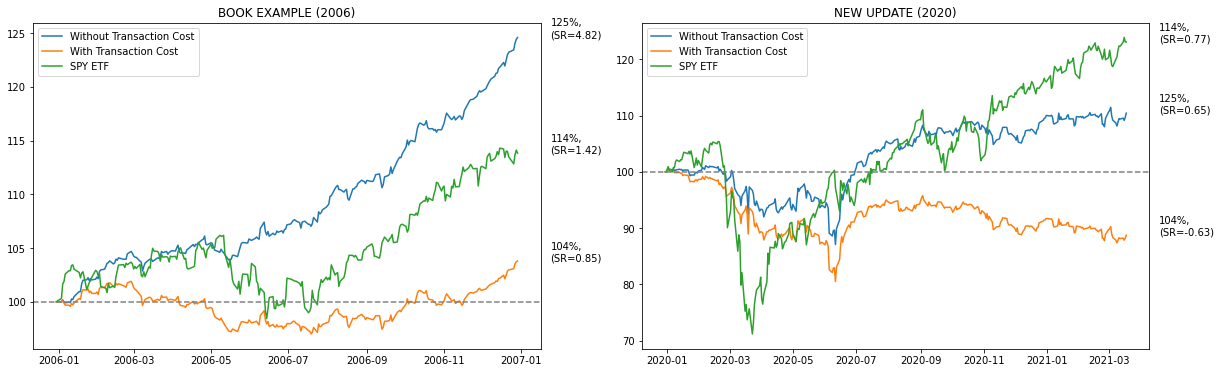

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.set_title('BOOK EXAMPLE (2006)')
ax1.plot(cumRet, label='Without Transaction Cost')
ax1.plot(cumRet_cost, label='With Transaction Cost')
ax1.plot(spy, label=f'SPY ETF')
ax1.axhline(y=100.0, color='grey', linestyle='--')
ax1.legend()

ax1.annotate(f'{spy[-1] :,.0f}%,\n(SR={sharpeRatioSPY:.2f})', xy=(1, spy[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'{cumRet[-1] :,.0f}%,\n(SR={sharpeRatio:.2f})', xy=(1, cumRet[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'{cumRet_cost[-1] :,.0f}%,\n(SR={sharpeRatioMinusTcost:.2f})', xy=(1, cumRet_cost[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax2.set_title('NEW UPDATE (2020)')
ax2.plot(cumRet_new, label='Without Transaction Cost')
ax2.plot(cumRet_cost_new, label='With Transaction Cost')
ax2.plot(spy_new, label=f'SPY ETF')
ax2.axhline(y=100.0, color='grey', linestyle='--')
ax2.legend()

ax2.annotate(f'{spy[-1] :,.0f}%,\n(SR={sharpeRatioSPY_new:.2f})', xy=(1, spy_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax2.annotate(f'{cumRet[-1] :,.0f}%,\n(SR={sharpeRatio_new:.2f})', xy=(1, cumRet_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax2.annotate(f'{cumRet_cost[-1] :,.0f}%,\n(SR={sharpeRatioMinusTcost_new:.2f})', xy=(1, cumRet_cost_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

## [Chan-Bk1-Ch4] Setup
- Retail Broker vs. Proprietary Trading Firm
- Hardware
- Software
  - DDE Real-time Data Feed
  - C++ Program
  - Brokerage API
  - Brokerage Account

## [Chan-Bk1-Ch5] Execution
- Transaction Cost
- Paper Trading
  - Bugs?
  - Order generated correctly?
  - Execution costs expected?
  - Stock illiquid?

## [Chan-Bk1-Ch6] Risk Man
- Goal: to maximize **Long-term levered, compounded growth rate** $g$
- Ruins **must be avoid**
- BIG IF: assume trading strategy $i$ is **Gaussian** with fixed mean $\mu_i$, and fixed SD $\sigma_i$
- Actually big losses with **far higher frequencies / far higher magnitudes** often occurs


### Geometric Random Walk

$$S_t = S_0 \exp \left( N \right) \quad \text{ where } \quad N = \left(  \mu - \frac{\sigma^2}{2}\right)t + \sigma W_t$$

A stock **filfulling Geometric Brownian Motion** with 50-50 change go $\pm 1\%$ next minute, then
$$E(N) = \frac{1}{2} \log (1.01) + \frac{1}{2} \log (0.99) = -0.005\%$$

Since in GBM, the average compounded rate of return is not $\mu = 0$, but is
$$ g = \mu - \frac{\sigma^2}{2}$$

- When facing portfolio-wise expected returns and risks, go **max growth rate** instead of max SR 

### Kelly Formula = optimal betting ratio in a continuous game

$$ f = \frac{winning}{gain} = \frac{pb-(1-p)}{b}$$

Say if a game

$$ P(WIN) = 0.3, \quad b = 3, \quad f = \frac{0.3\times 3 - 0.7}{3} = 6.67\% $$

SIC BO

$$ P(WIN) = 0.5, \quad b = 1, \quad f = \frac{0.5\times 1 - 0.5}{1} = 0\% $$

### Kelly Criterion

$$ 1 \to \begin{cases}
1 + fb, &p \\
1-f, &1-p
\end{cases} $$

$$ Objective = \max \left\{ (1+fb)^p (1-f)^{(1-p)} \right\}$$

$$ E = p\log (1+fb) + (1-p) \log (1-f) $$

### FINANCIAL SETTINGS = Assume Geometric Random Walk

$$   E(X) = \mu  \to \begin{cases}
\mu + \sigma, &0.5 \\
\mu - \sigma, &0.5
\end{cases}, \qquad 1 \to \begin{cases}
1 + fX \\
(1-f) r_f
\end{cases} $$

$$  S_t = S_0 \exp \left[  \left(  \mu - \frac{\sigma^2}{2}\right)t + \sigma W_t \right]  , \qquad  E \log (S_t) = \log (S_0) + \left(  \mu - \frac{\sigma^2}{2}\right)t $$

$$ Objective = \max \left\{ f  \left(  \mu - \frac{\sigma^2}{2}\right) + (1-f)r  \right\}$$

$$ G(f) = r + f(\mu - r) - \frac{\sigma^2 f^2}{2} $$

$$F^* = \Sigma^{-1} M \implies \begin{bmatrix}
f^*_1 \\
f^*_2 \\
\vdots \\
f^*_n \\
\end{bmatrix} = \left( \begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_2^2 & \cdots & \sigma_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2 \\
\end{bmatrix} \right)^{-1} \begin{bmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_n \\
\end{bmatrix}$$

Given all $n$ strategies are statistically independent, we obtain the *Kelly formula*:
$$ f_i = \frac{\mu_i - r_f}{\sigma_i^2} $$

- Oscillation makes bettors quit / kill by minimum deposit

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: 
  - Buy `SPY` Stock
  - Latest Quantity according to Kelly Formula

- **Time Period (book)**: 1993-01-01 to 2007-12-29
- **Time Period (update)**: 1993-01-01 to now

In [ ]:
spy = yf.download("SPY", start="1993-01-01", end="2007-12-29")
spy = spy['Adj Close'].pct_change()

r_f = 0.04
mean = spy.mean() * 252
std = spy.std() * np.sqrt(252)
excessRet = mean - r_f
sharpeRatio = excessRet / std
kellyF = excessRet / std ** 2
leveredRet = r_f + 0.5 * sharpeRatio ** 2
unleveredRet = mean - 0.5 * std ** 2

print('Risk-free rate'.ljust(32), '=', f'{r_f * 100:2.2f}%'.rjust(7))
print('Annualized mean return'.ljust(32), '=', f'{mean * 100:.2f}%'.rjust(7))
print('Annualized standard derivation'.ljust(32), '=', f'{std * 100:.2f}%'.rjust(7))
print('\n')
print('Mean excees return'.ljust(32), '=', f'{excessRet * 100:.2f}%'.rjust(7))
print('Annualized Sharpe ratio'.ljust(32), '=', f'{sharpeRatio:.2f}'.rjust(6))
print('Kelly F coefficient'.ljust(32), '=', f'{kellyF:.2f}'.rjust(6))
print('\n')
print('Compounded leveraged return'.ljust(32), '=', f'{leveredRet * 100:.2f}%'.rjust(7))
print('Compounded unleveraged return'.ljust(32), '=', f'{unleveredRet * 100:.2f}%'.rjust(7))

[*********************100%***********************]  1 of 1 completed
Risk-free rate                   =   4.00%
Annualized mean return           =  11.29%
Annualized standard derivation   =  16.91%


Mean excees return               =   7.29%
Annualized Sharpe ratio          =   0.43
Kelly F coefficient              =   2.55


Compounded leveraged return      =  13.30%
Compounded unleveraged return    =   9.86%


In [ ]:
spy = yf.download("SPY", start="1993-01-01")
spy = spy['Adj Close'].pct_change()

r_f = 0.04
mean = spy.mean() * 252
std = spy.std() * np.sqrt(252)
excessRet = mean - r_f
sharpeRatio = excessRet / std
kellyF = excessRet / std ** 2
leveredRet = r_f + 0.5 * sharpeRatio ** 2
unleveredRet = mean - 0.5 * std ** 2

print('Risk-free rate'.ljust(32), '=', f'{r_f * 100:2.2f}%'.rjust(7))
print('Annualized mean return'.ljust(32), '=', f'{mean * 100:.2f}%'.rjust(7))
print('Annualized standard derivation'.ljust(32), '=', f'{std * 100:.2f}%'.rjust(7))
print('\n')
print('Mean excees return'.ljust(32), '=', f'{excessRet * 100:.2f}%'.rjust(7))
print('Annualized Sharpe ratio'.ljust(32), '=', f'{sharpeRatio:.2f}'.rjust(6))
print('Kelly F coefficient'.ljust(32), '=', f'{kellyF:.2f}'.rjust(6))
print('\n')
print('Compounded leveraged return'.ljust(32), '=', f'{leveredRet * 100:.2f}%'.rjust(7))
print('Compounded unleveraged return'.ljust(32), '=', f'{unleveredRet * 100:.2f}%'.rjust(7))

[*********************100%***********************]  1 of 1 completed
Risk-free rate                   =   4.00%
Annualized mean return           =  11.44%
Annualized standard derivation   =  18.87%


Mean excees return               =   7.44%
Annualized Sharpe ratio          =   0.39
Kelly F coefficient              =   2.09


Compounded leveraged return      =  11.76%
Compounded unleveraged return    =   9.65%


### Calculating the Optimal Allocation Using Kelly formula

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: 
  - Buy (`OIH`, `RKH`, `RTH`) Stocks
  - Latest Quantity according to Kelly Formula

- **Time Period (book)**: 2005-12-30 to 2006-12-31
- **Time Period (update)**: 2019-12-30 to now

In [ ]:
df = yf.download("OIH RKH RTH", start="2001-05-17")['Adj Close']
df_new = df.iloc[-1663:]
df = df.iloc[:1663]

dailyRet = df.pct_change()
excessRet = dailyRet-0.04/252

MU = 252 * excessRet.mean()
MU

[*********************100%***********************]  3 of 3 completed


OIH    0.139552
RKH    0.029397
RTH   -0.007350
dtype: float64

In [ ]:
COV = 252 * excessRet.cov()
COV

OIH       RKH       RTH
OIH  0.110886  0.020008  0.018252
RKH  0.020008  0.037165  0.026893
RTH  0.018252  0.026893  0.041968

In [ ]:
F = np.dot(np.linalg.inv(COV), MU)
F

array([ 1.29196008,  1.17232418, -1.48821624])

In [ ]:
SR = np.sqrt(np.dot(F.T, np.dot(COV, F)))
SR

0.4750744428405551

In [ ]:
GR = 0.04 + 0.5 * SR ** 2
GR

0.15284786312013193

In [ ]:
stock = ['OIH', 'RKH', 'RTH']

dailyRet_new = df_new.pct_change()
excessRet_new = dailyRet_new-0.04/252
MU_new = 252 * excessRet_new.mean()
C_new = 252 * excessRet_new.cov()
F_new = np.dot(np.linalg.inv(C_new), MU_new)
SR_new = np.sqrt(np.dot(F_new.T, np.dot(C_new, F_new)))
g_new = 0.04 + 0.5 * SR_new ** 2

f_list = []
f_list_new = []

print('=' * 32)
print('   BOOK EXAMPLE (2001 - 2007)')
print('=' * 32, '\n')

print(f'Portfolio-wise (g):', f'{GR * 100:.2f}%'.rjust(7), '\n')
for code in stock:
  excessret = excessRet[[code]]

  mu = 252 * excessret.mean()
  cov = 252 * excessret.cov()
  f = np.dot(np.linalg.inv(cov), mu)
  f_list += [f[0]]
  sr = np.sqrt(np.dot(f.T, np.dot(cov, f)))
  gr = 0.04 + 0.5 * sr ** 2

  print(f'Individual {code} (g):', f'{gr * 100:.2f}%'.rjust(7))

print('\n')
print('=' * 32)
print('    NEW UPDATE (2014 - 2020)')
print('=' * 32, '\n')

print(f'Portfolio-wise (g):', f'{g_new * 100:.2f}%'.rjust(7), '\n')
for code in stock:
  excessret_new = excessRet_new[[code]]

  mu_new = 252 * excessret_new.mean()
  cov_new = 252 * excessret_new.cov()
  f_new = np.dot(np.linalg.inv(cov_new), mu_new)
  f_list_new += [f_new[0]]
  sr_new = np.sqrt(np.dot(f_new.T, np.dot(cov_new, f_new)))
  gr_new = 0.04 + 0.5 * sr_new ** 2

  print(f'Individual {code} (g):', f'{gr_new * 100:.2f}%'.rjust(7))

   BOOK EXAMPLE (2001 - 2007)

Portfolio-wise (g):  15.28% 

Individual OIH (g):  12.78%
Individual RKH (g):   5.16%
Individual RTH (g):   4.06%


    NEW UPDATE (2014 - 2020)

Portfolio-wise (g):  83.79% 

Individual OIH (g):  11.87%
Individual RKH (g):  17.89%
Individual RTH (g):  33.87%


### Others Kelly Criterion = Single Asset

https://quantdare.com/kelly-criterion-part-2/

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: 
  - Buy `^GSPC` Stock
  - **Rolling window size**: 400
  - Daily Quantity according to Kelly Formula
  
- **Time Period**: 1985-01-01 to now

[*********************100%***********************]  1 of 1 completed


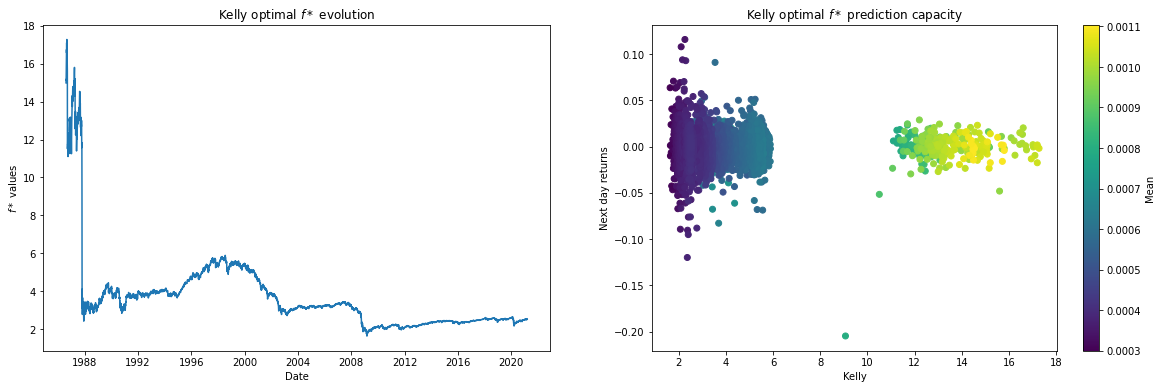

In [ ]:
df = yf.download("^GSPC", start="1985-01-01")['Adj Close']

dailyRet = df.pct_change()

mean = dailyRet.expanding(400).mean()
std = dailyRet.expanding(400).std()
r_adj = (1 + .02) ** (1 / 252) - 1

kelly = (mean - r_adj)/ std ** 2

df_plot = pd.concat([kelly, dailyRet.shift(-1), mean], axis=1)
df_plot = df_plot.iloc[126:]
df_plot.dropna(inplace=True)
df_plot.columns = ['kelly', 'dailyRet', 'mean']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title('Kelly optimal $f*$ evolution')
ax1.plot(df_plot['kelly'])
ax1.set_xlabel('Date')
ax1.set_ylabel('$f*$ values')

ax2.set_title('Kelly optimal $f*$ prediction capacity')
sc = ax2.scatter(df_plot['kelly'], df_plot['dailyRet'], c=df_plot['mean'], cmap='viridis')
ax2.set_xlabel('Kelly')
ax2.set_ylabel('Next day returns')

cbar = plt.colorbar(sc)
cbar.set_label('Mean')

plt.show()

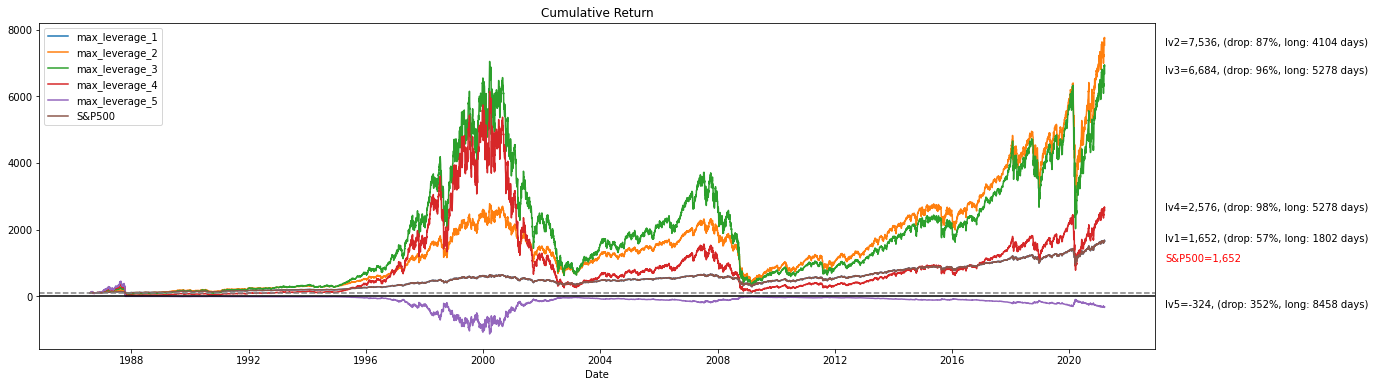

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

for i in range(1, 6):
  df_plot[f'kelly{i}'] = df_plot['kelly'].clip(upper=i)
  df_plot[f'kelly{i}'] = df_plot[f'kelly{i}'] * df_plot['dailyRet'] + 1
  df_plot[f'kelly{i}'].iloc[0] = 100.0
  df_plot[f'kelly{i}'] = df_plot[f'kelly{i}'].cumprod()
  dd = calculateMaxDD(df_plot[f"kelly{i}"])

  ax.plot(df_plot[f'kelly{i}'], label=f'max_leverage_{i}')
  ax.annotate(f'lv{i}={df_plot[f"kelly{i}"][-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, df_plot[f"kelly{i}"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

df_plot['spx'] = df_plot['dailyRet'] + 1
df_plot['spx'].iloc[0] = 100.0
df_plot['spx'] = df_plot['spx'].cumprod()
ax.plot(df_plot['spx'], label=f'S&P500')
ax.annotate(f'S&P500={df_plot["spx"][-1] :,.0f}', xy=(1, df_plot["spx"][-1]), xytext=(10, -20), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points', color='r')
  
ax.set_title('Cumulative Return')
ax.set_xlabel('Date')
ax.legend()

ax.axhline(y=100.0, color='grey', linestyle='--')
ax.axhline(y=0.0, color='k', linestyle='-')

plt.show()

### Others Kelly Criterion = Multiple Assets

$$\text{Holding % for asset}_i = \text{Maximum Leverage Allowed } L_\alpha \times \frac{f_i}{|f_1|+|f_2|+\cdots + |f_n|}$$

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: 
  - Buy (15 `NASDAQ` stocks)
  - **Rolling window size**: 400
  - Daily Quantity according to Kelly Formula

- **Time Period**: 2005-03-23 to now

[*********************100%***********************]  15 of 15 completed


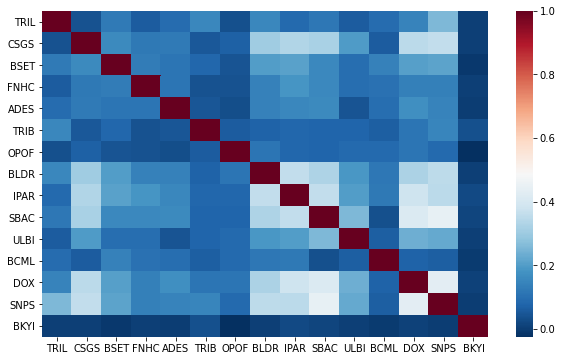

In [ ]:
stock = ['TRIL', 'CSGS', 'BSET', 'FNHC', 'ADES', 'TRIB', 'OPOF', 'BLDR', 'IPAR', 'SBAC', 'ULBI', 'BCML', 'DOX', 'SNPS', 'BKYI', ]
df = yf.download(stock, start='2005-03-23')['Adj Close']
df = df[stock]

dailyRet = df.pct_change()
sns.heatmap(dailyRet.corr(), cmap="RdBu_r")

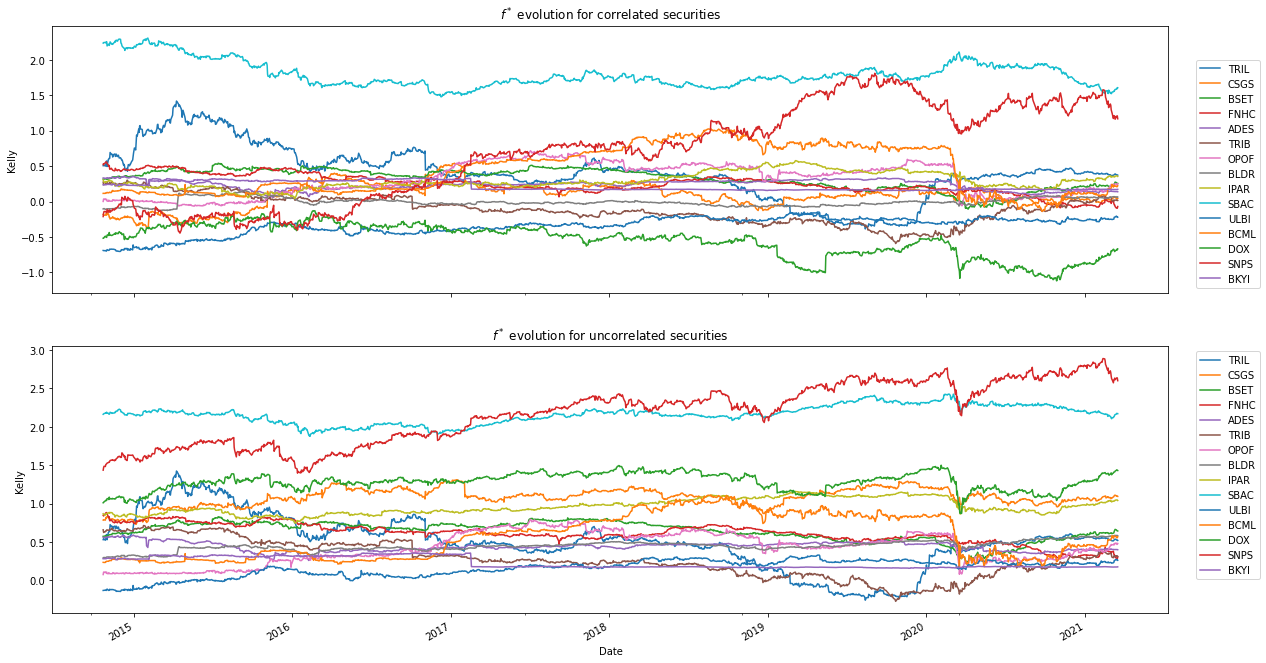

In [ ]:
dailyRet = df.pct_change()

mean = dailyRet.expanding(400).mean()
cov = dailyRet.expanding(400).cov()
excessRet = mean - r_adj

df_kelly_corr = pd.DataFrame(columns=mean.columns) 
for day in dailyRet.index:
  df_kelly_corr.loc[day] = np.dot(np.linalg.inv(cov.loc[day]), excessRet.loc[day])
df_kelly_corr.dropna(inplace=True)

std = dailyRet.expanding(400).std()
df_kelly_uncorr = excessRet / std ** 2
df_kelly_uncorr.dropna(inplace=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

df_kelly_corr.plot(ax=ax1)
ax1.set_title('$f^*$ evolution for correlated securities')
ax1.set_ylabel('Kelly')
ax1.legend(bbox_to_anchor=(1.02, 0), loc='lower left')

df_kelly_uncorr.plot(ax=ax2)
ax2.set_title('$f^*$ evolution for uncorrelated securities')
ax2.set_ylabel('Kelly')
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

ax2.set_xlabel('Date')
plt.show()

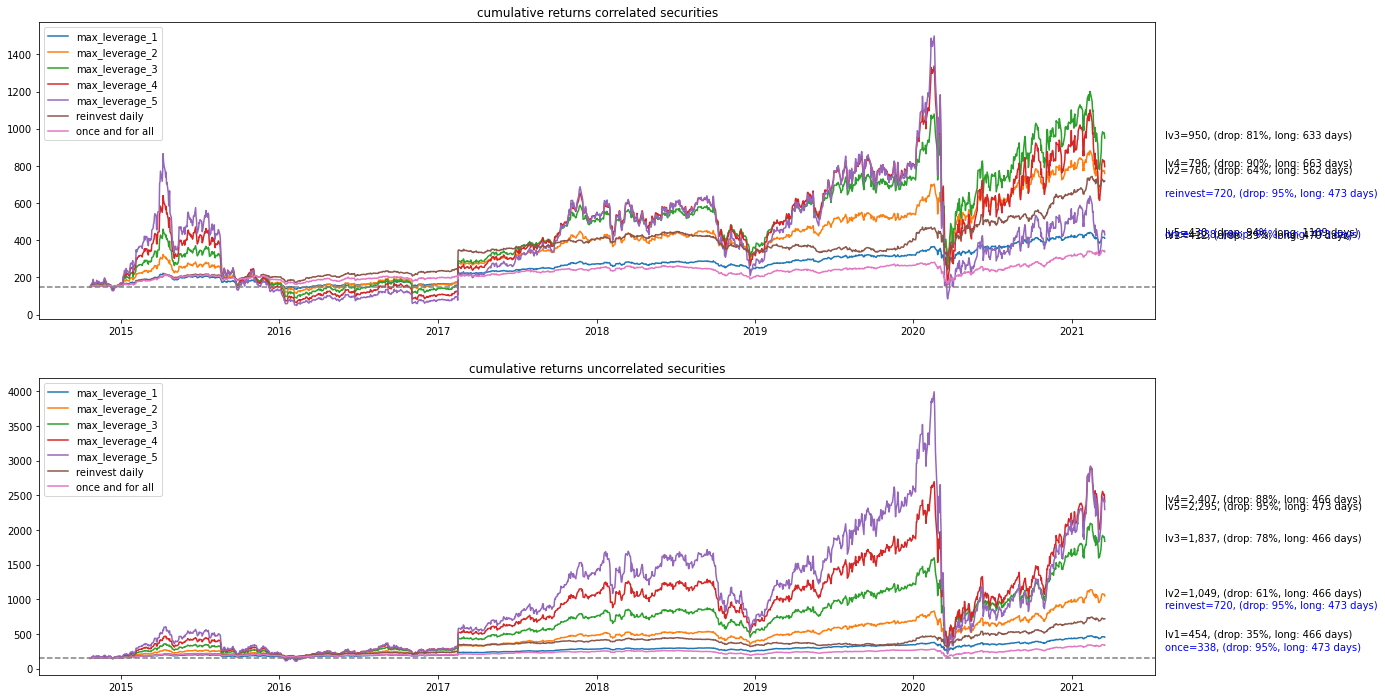

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

df_tmp = pd.DataFrame()
df_plot_corr = pd.DataFrame()
df_corr = df_kelly_corr.clip(lower = 0)
sum_corr_weight = df_corr.sum(axis=1)
for i in range(1, 6):
  lever = sum_corr_weight.clip(upper=i).div(sum_corr_weight)
  df_tmp = df_corr.mul(lever, axis=0) * dailyRet.shift(-1)
  df_tmp.dropna(inplace=True)

  df_plot_corr[f'kelly{i}'] = df_tmp.sum(axis=1) + 1
  df_plot_corr[f'kelly{i}'].iloc[0] = 150.0
  df_plot_corr[f'kelly{i}'] = df_plot_corr[f'kelly{i}'].cumprod()
  dd = calculateMaxDD(df_plot_corr[f"kelly{i}"])


  ax1.plot(df_plot_corr[f'kelly{i}'], label=f'max_leverage_{i}')
  ax1.annotate(f'lv{i}={df_plot_corr[f"kelly{i}"][-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, df_plot_corr[f"kelly{i}"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


df_tmp = dailyRet.shift(-1) + 1
df_tmp = df_tmp.reindex(df_plot_corr.index)
df_tmp.iloc[0] = 10.0
df_tmp = df_tmp.cumprod()

df_plot_corr['once'] = df_tmp.sum(axis=1)
df_plot_corr['reinvest'] = dailyRet.shift(-1).sum(axis=1) / 15 + 1
df_plot_corr['reinvest'].iloc[0] = 150.0
df_plot_corr['reinvest'] = df_plot_corr['reinvest'].cumprod()

df_plot_uncorr = pd.DataFrame()
df_uncorr = df_kelly_uncorr.clip(lower = 0)
sum_uncorr_weight = df_uncorr.sum(axis=1)
for i in range(1, 6):
  lever = sum_uncorr_weight.clip(upper=i).div(sum_uncorr_weight)
  df_tmp = df_uncorr.mul(lever, axis=0) * dailyRet.shift(-1)
  df_tmp.dropna(inplace=True)

  df_plot_uncorr[f'kelly{i}'] = df_tmp.sum(axis=1) + 1
  df_plot_uncorr[f'kelly{i}'].iloc[0] = 150.0
  df_plot_uncorr[f'kelly{i}'] = df_plot_uncorr[f'kelly{i}'].cumprod()
  dd = calculateMaxDD(df_plot_uncorr[f"kelly{i}"])


  ax2.plot(df_plot_uncorr[f'kelly{i}'], label=f'max_leverage_{i}')
  ax2.annotate(f'lv{i}={df_plot_uncorr[f"kelly{i}"][-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, df_plot_uncorr[f"kelly{i}"][-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


df_tmp = dailyRet.shift(-1) + 1
df_tmp = df_tmp.reindex(df_plot_uncorr.index)
df_tmp.iloc[0] = 10.0
df_tmp = df_tmp.cumprod()

df_plot_uncorr['once'] = df_tmp.sum(axis=1)
df_plot_uncorr['reinvest'] = dailyRet.shift(-1).sum(axis=1) / 15 + 1
df_plot_uncorr['reinvest'].iloc[0] = 150.0
df_plot_uncorr['reinvest'] = df_plot_uncorr['reinvest'].cumprod()

##########

ax1.plot(df_plot_corr['reinvest'], label=f'reinvest daily')
ax1.annotate(f'reinvest={df_plot_corr["reinvest"][-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, df_plot_corr["reinvest"][-1]), xytext=(10, -15), 
                xycoords=('axes fraction', 'data'), textcoords='offset points', color='b')

ax1.plot(df_plot_corr['once'], label=f'once and for all')
ax1.annotate(f'once={df_plot_corr["once"][-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, df_plot_corr["once"][-1]), xytext=(10, 15), 
                xycoords=('axes fraction', 'data'), textcoords='offset points', color='b')


ax1.set_title('cumulative returns correlated securities')
ax1.legend()

ax1.axhline(y=150.0, color='grey', linestyle='--')

##########

ax2.plot(df_plot_uncorr['reinvest'], label=f'reinvest daily')
ax2.annotate(f'reinvest={df_plot_uncorr["reinvest"][-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, df_plot_uncorr["reinvest"][-1]), xytext=(10, 10), 
                xycoords=('axes fraction', 'data'), textcoords='offset points', color='b')

ax2.plot(df_plot_uncorr['once'], label=f'once and for all')
ax2.annotate(f'once={df_plot_uncorr["once"][-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, df_plot_uncorr["once"][-1]), xytext=(10, -5), 
                xycoords=('axes fraction', 'data'), textcoords='offset points', color='b')


ax2.set_title('cumulative returns uncorrelated securities')
ax2.legend()

ax2.axhline(y=150.0, color='grey', linestyle='--')

plt.show()

### ATMX Hong Kong Data

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: 
  - Buy `ATMX` Stocks
  - **Rolling window size**: 126
  - Daily Quantity according to Kelly Formula
- **Time Period**: 2019-11-26 to now

[*********************100%***********************]  4 of 4 completed
9988.HK    0.056016
0700.HK    0.365281
3690.HK    0.901909
1810.HK    0.819015
dtype: float64
          9988.HK   0700.HK   3690.HK   1810.HK
9988.HK  0.164162  0.113961  0.147013  0.096647
0700.HK  0.113961  0.151276  0.163005  0.092281
3690.HK  0.147013  0.163005  0.344831  0.175341
1810.HK  0.096647  0.092281  0.175341  0.304795
[-4.3449063   1.5213451   2.70827359  2.04620252]
2.1049508785166715
2.415409100484054
   BOOK EXAMPLE (2001 - 2007)

Portfolio-wise (g): 241.54% 

Individual 9988.HK (g):   4.96%
Individual 0700.HK (g):  48.10%
Individual 3690.HK (g): 121.95%
Individual 1810.HK (g): 114.04%


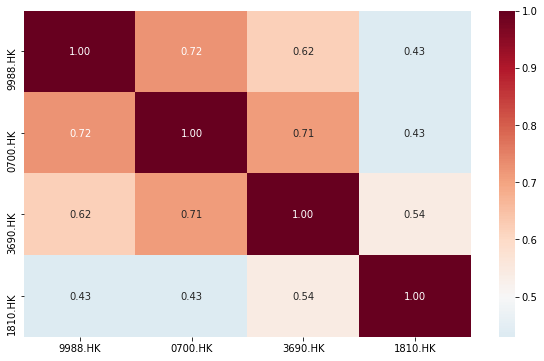

In [ ]:
stock = ['9988.HK', '0700.HK', '3690.HK', '1810.HK']
hk_df = yf.download(stock)['Adj Close']
hk_df.dropna(inplace=True)
hk_df = hk_df[stock]

r = 0.2

dailyRet = hk_df.pct_change()
excessRet = dailyRet - r/252

M = 252 * excessRet.mean()
C = 252 * excessRet.cov()
F = np.dot(np.linalg.inv(C), M)
SR = np.sqrt(np.dot(F.T, np.dot(C, F)))
GR = r + 0.5 * SR ** 2

f_list = []

print(M)
print(C)
print(F)
print(SR)
print(GR)

print('=' * 32)
print('   BOOK EXAMPLE (2001 - 2007)')
print('=' * 32, '\n')

print(f'Portfolio-wise (g):', f'{GR * 100:.2f}%'.rjust(7), '\n')
for code in stock:
  excessret = excessRet[[code]]

  mu = 252 * excessret.mean()
  cov = 252 * excessret.cov()
  f = np.dot(np.linalg.inv(cov), mu)
  f_list += [f[0]]
  sr = np.sqrt(np.dot(f.T, np.dot(cov, f)))
  gr = 0.04 + 0.5 * sr ** 2

  print(f'Individual {code} (g):', f'{gr * 100:.2f}%'.rjust(7))

sns.heatmap(dailyRet.corr(), cmap="RdBu_r", center=0.5, annot=True, fmt=".2f")

- The heat map is <font color='red'>red in nature</font>, suggested that we shall dive in the correlated Kelly's Model
- Further impose max leverage and short sell restriction
  - https://support.futuhk.com/zh-hk/topic417
  - https://help.futuhk.com/faq/topic1554

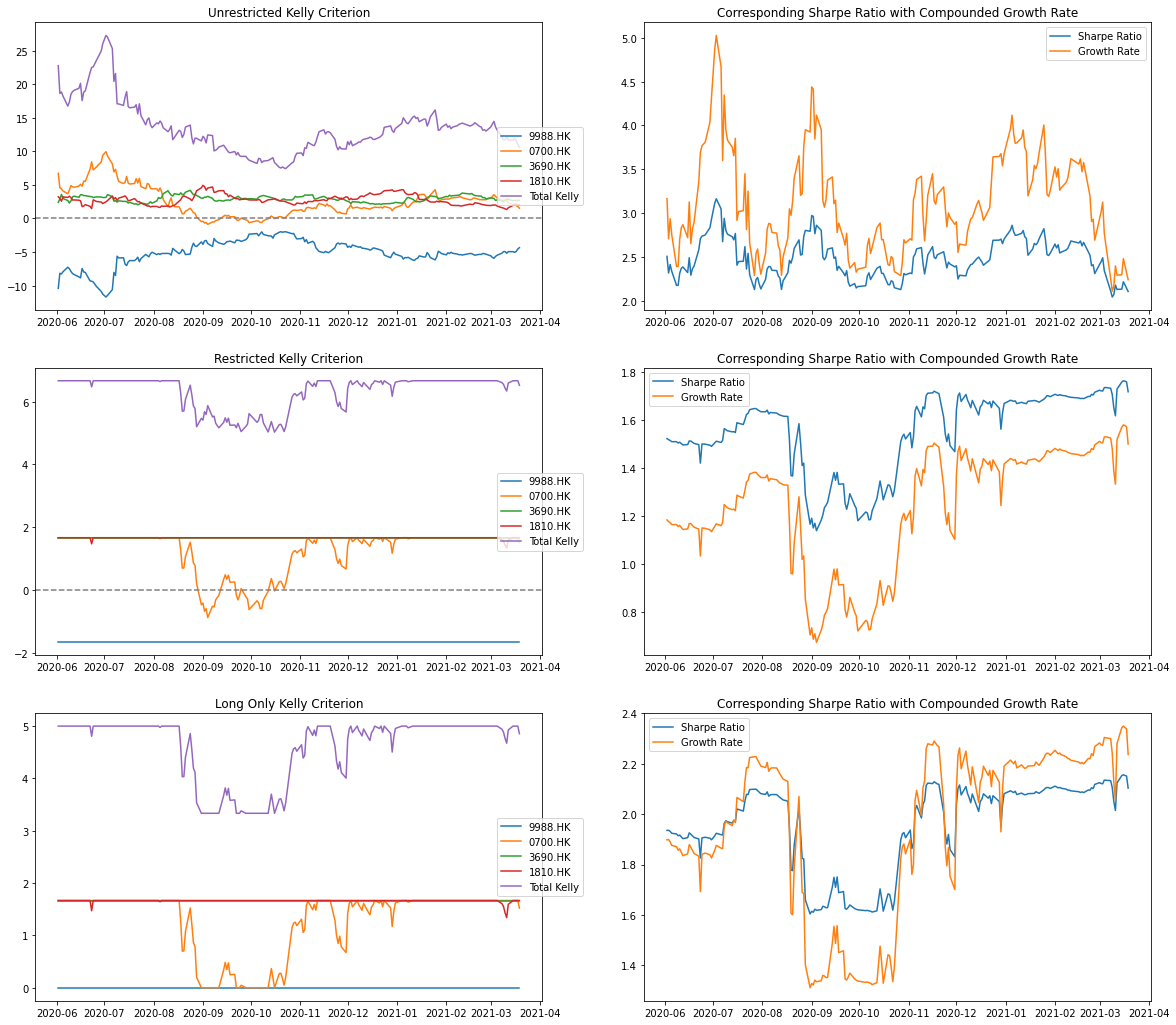

In [ ]:
mean = 252 * excessRet.expanding(126).mean()
cov = 252 * excessRet.expanding(126).cov()
cov_grp = cov.groupby('Date')

dict_kelly = {}
dict_kelly_short = {}
dict_kelly_long = {}
dict_sr = {}
dict_sr_short = {}
dict_sr_long = {}

for date, c in cov_grp:
  m = mean.loc[date]
  c.index = c.index.get_level_values(1)
  f = np.dot(np.linalg.inv(c), m)
  f_short = f.clip(min = -1./.6, max = 1./.6)
  f_long = f_short.clip(min = 0)

  dict_kelly[date] = f
  dict_kelly_short[date] = f_short
  dict_kelly_long[date] = f_long
  dict_sr[date] = np.sqrt(np.dot(f.T, np.dot(c, f)))
  dict_sr_short[date] = np.sqrt(np.dot(f_short.T, np.dot(c, f_short)))
  dict_sr_long[date] = np.sqrt(np.dot(f_long.T, np.dot(c, f_long)))
  
df_kelly = pd.DataFrame(dict_kelly, index=stock).T
df_kelly.dropna(inplace=True)
sum_kelly_weight = df_kelly.abs().sum(axis=1)

df_kelly_short = pd.DataFrame(dict_kelly_short, index=stock).T
df_kelly_short.dropna(inplace=True)
sum_short_weight = df_kelly_short.abs().sum(axis=1)

df_kelly_long = pd.DataFrame(dict_kelly_long, index=stock).T
df_kelly_long.dropna(inplace=True)
sum_long_weight = df_kelly_long.abs().sum(axis=1)

sr = pd.Series(dict_sr)
sr_short = pd.Series(dict_sr_short)
sr_long = pd.Series(dict_sr_long)
g = 0.025 + 0.5 * sr ** 2
g_short = 0.025 + 0.5 * sr_short ** 2
g_long = 0.025 + 0.5 * sr_long ** 2

fig, ax = plt.subplots(3, 2, figsize=(20, 18))

ax[0, 0].set_title('Unrestricted Kelly Criterion')
for code in df_kelly.columns:
  ax[0, 0].plot(df_kelly[code], label=code)
ax[0, 0].plot(sum_kelly_weight, label='Total Kelly')
ax[0, 0].legend(bbox_to_anchor=(.9, .5), loc='center left')
ax[0, 0].axhline(y=0., color='grey', linestyle='--')

ax[0, 1].set_title('Corresponding Sharpe Ratio with Compounded Growth Rate')
ax[0, 1].plot(sr, label='Sharpe Ratio')
ax[0, 1].plot(g, label='Growth Rate')
ax[0, 1].legend()

ax[1, 0].set_title('Restricted Kelly Criterion')
for code in df_kelly_short.columns:
  ax[1, 0].plot(df_kelly_short[code], label=code)
ax[1, 0].plot(sum_short_weight, label='Total Kelly')
ax[1, 0].legend(bbox_to_anchor=(.9, .5), loc='center left')
ax[1, 0].axhline(y=0., color='grey', linestyle='--')

ax[1, 1].set_title('Corresponding Sharpe Ratio with Compounded Growth Rate')
ax[1, 1].plot(sr_short, label='Sharpe Ratio')
ax[1, 1].plot(g_short, label='Growth Rate')
ax[1, 1].legend()

ax[2, 0].set_title('Long Only Kelly Criterion')
for code in df_kelly_long.columns:
  ax[2, 0].plot(df_kelly_long[code], label=code)
ax[2, 0].plot(sum_long_weight, label='Total Kelly')
ax[2, 0].legend(bbox_to_anchor=(.9, .5), loc='center left')

ax[2, 1].set_title('Corresponding Sharpe Ratio with Compounded Growth Rate')
ax[2, 1].plot(sr_long, label='Sharpe Ratio')
ax[2, 1].plot(g_long, label='Growth Rate')
ax[2, 1].legend()

plt.show()

df_kelly = df_kelly.div(sum_kelly_weight, axis=0).mul(sum_kelly_weight.clip(upper=1./.6), axis=0)
df_kelly_short = df_kelly_short.div(sum_short_weight, axis=0).mul(sum_short_weight.clip(upper=1./.6), axis=0)
df_kelly_long = df_kelly_long.div(sum_long_weight, axis=0).mul(sum_long_weight.clip(upper=1./.6), axis=0)
df_kelly_25 = df_kelly_long / 4
df_kelly_50 = df_kelly_long / 2
df_kelly_75 = df_kelly_long * 3 / 4

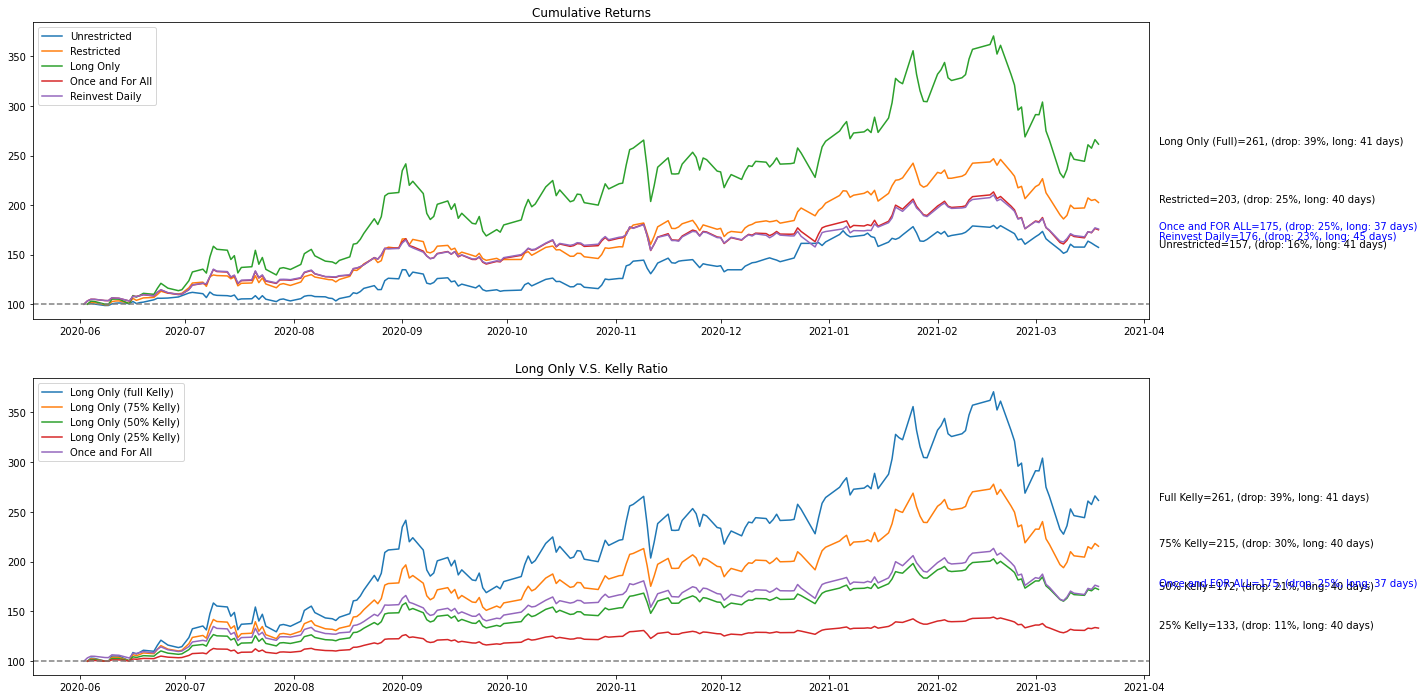

In [ ]:
df_kellyRet = df_kelly.shift() * dailyRet
df_kellyRet.dropna(inplace=True)
sum_kellyRet = df_kellyRet.sum(axis=1) + 1
sum_kellyRet[0] = 100.
sum_kellyRet = sum_kellyRet.cumprod()

df_shortRet = df_kelly_short.shift() * dailyRet
df_shortRet.dropna(inplace=True)
sum_shortRet = df_shortRet.sum(axis=1) + 1
sum_shortRet[0] = 100.
sum_shortRet = sum_shortRet.cumprod()

df_longRet = df_kelly_long.shift() * dailyRet
df_longRet.dropna(inplace=True)
sum_longRet = df_longRet.sum(axis=1) + 1
sum_longRet[0] = 100.
sum_longRet = sum_longRet.cumprod()

df_25Ret = df_kelly_25.shift() * dailyRet
df_25Ret.dropna(inplace=True)
sum_25Ret = df_25Ret.sum(axis=1) + 1
sum_25Ret[0] = 100.
sum_25Ret = sum_25Ret.cumprod()

df_50Ret = df_kelly_50.shift() * dailyRet
df_50Ret.dropna(inplace=True)
sum_50Ret = df_50Ret.sum(axis=1) + 1
sum_50Ret[0] = 100.
sum_50Ret = sum_50Ret.cumprod()

df_75Ret = df_kelly_75.shift() * dailyRet
df_75Ret.dropna(inplace=True)
sum_75Ret = df_75Ret.sum(axis=1) + 1
sum_75Ret[0] = 100.
sum_75Ret = sum_75Ret.cumprod()

df_tmp = dailyRet + 1
df_tmp = df_tmp.reindex(df_kelly.index)
df_tmp.iloc[0] = 25.0
df_tmp = df_tmp.cumprod()
sum_once = df_tmp.sum(axis=1)

sum_reinvest = dailyRet.sum(axis=1) / 4 + 1
sum_reinvest = sum_reinvest.reindex(df_kelly.index)
sum_reinvest.iloc[0] = 100.0
sum_reinvest = sum_reinvest.cumprod()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
ax1.set_title('Cumulative Returns')
ax1.plot(sum_kellyRet, label='Unrestricted')
ax1.plot(sum_shortRet, label='Restricted')
ax1.plot(sum_longRet, label='Long Only')
ax1.plot(sum_once, label='Once and For All')
ax1.plot(sum_reinvest, label='Reinvest Daily')
ax1.legend()

dd = calculateMaxDD(sum_kellyRet)
ax1.annotate(f'Unrestricted={sum_kellyRet[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_kellyRet[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
dd = calculateMaxDD(sum_shortRet)
ax1.annotate(f'Restricted={sum_shortRet[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_shortRet[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
dd = calculateMaxDD(sum_longRet)
ax1.annotate(f'Long Only (Full)={sum_longRet[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_longRet[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
dd = calculateMaxDD(sum_once)
ax1.annotate(f'Once and FOR ALL={sum_once[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_once[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points', color='b')
dd = calculateMaxDD(sum_reinvest)
ax1.annotate(f'Reinvest Daily={sum_reinvest[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_reinvest[-1]), xytext=(10, -10), 
                xycoords=('axes fraction', 'data'), textcoords='offset points', color='b')

ax1.axhline(y=100.0, color='grey', linestyle='--')

ax2.set_title('Long Only V.S. Kelly Ratio')
ax2.plot(sum_longRet, label='Long Only (full Kelly)')
ax2.plot(sum_75Ret, label='Long Only (75% Kelly)')
ax2.plot(sum_50Ret, label='Long Only (50% Kelly)')
ax2.plot(sum_25Ret, label='Long Only (25% Kelly)')
ax2.plot(sum_once, label='Once and For All')
ax2.legend()

dd = calculateMaxDD(sum_longRet)
ax2.annotate(f'Full Kelly={sum_longRet[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_longRet[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
dd = calculateMaxDD(sum_75Ret)
ax2.annotate(f'75% Kelly={sum_75Ret[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_75Ret[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
dd = calculateMaxDD(sum_50Ret)
ax2.annotate(f'50% Kelly={sum_50Ret[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_50Ret[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
dd = calculateMaxDD(sum_25Ret)
ax2.annotate(f'25% Kelly={sum_25Ret[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_25Ret[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')
dd = calculateMaxDD(sum_once)
ax2.annotate(f'Once and FOR ALL={sum_once[-1] :,.0f}, (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, sum_once[-1]), xytext=(10, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points', color='b')


ax2.axhline(y=100.0, color='grey', linestyle='--')

plt.show()

- Better use half-year windows time frame for daily Kelly update
- Kelly ratio related to the **max tolerated one-period drawdown**
- *Stop loss* is good only in **momentum regime**, like news/fundamentals badly revealed
- Position risks (market/specific), other risks (model = losing predictive power/software/natural disaster = power shortage)

### Behaviour Finance
- Loss Aversion (Endowment Effect)
- Representativeness Bias
- Greed / Despire

## [Chan-Bk1-Ch7] Special Topics
Use (hidden Markov, Kalman filter, NN) models to distinguish periods.
- Mean-Reverting
  - Watch out outliers and survivors
- Momentum = slow diffusion of info / large orders execution = "herding"

 
The more traders play in role, the shorter the:
- Mean-Reverting, frequency-wise
- Momentum Trading, time-frame-wise

Regime Shifting, using data-mining approach, including:
- **Mean-Reverting VS Momentum**
- Inflation VS Recession
- High VS Low Volatility

### Stationary: $I(0)$
- Single stock is mostly likely to exhabit **Geometric Random Walk**
- Cointegrated = a long/short pair that is stationary

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: Long `GLD`, Short `GDX`
- **Time Period (book)**: 2006-05-23 to 2007-12-31
- **Time Period (update)**: 2019-01-01 to now

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


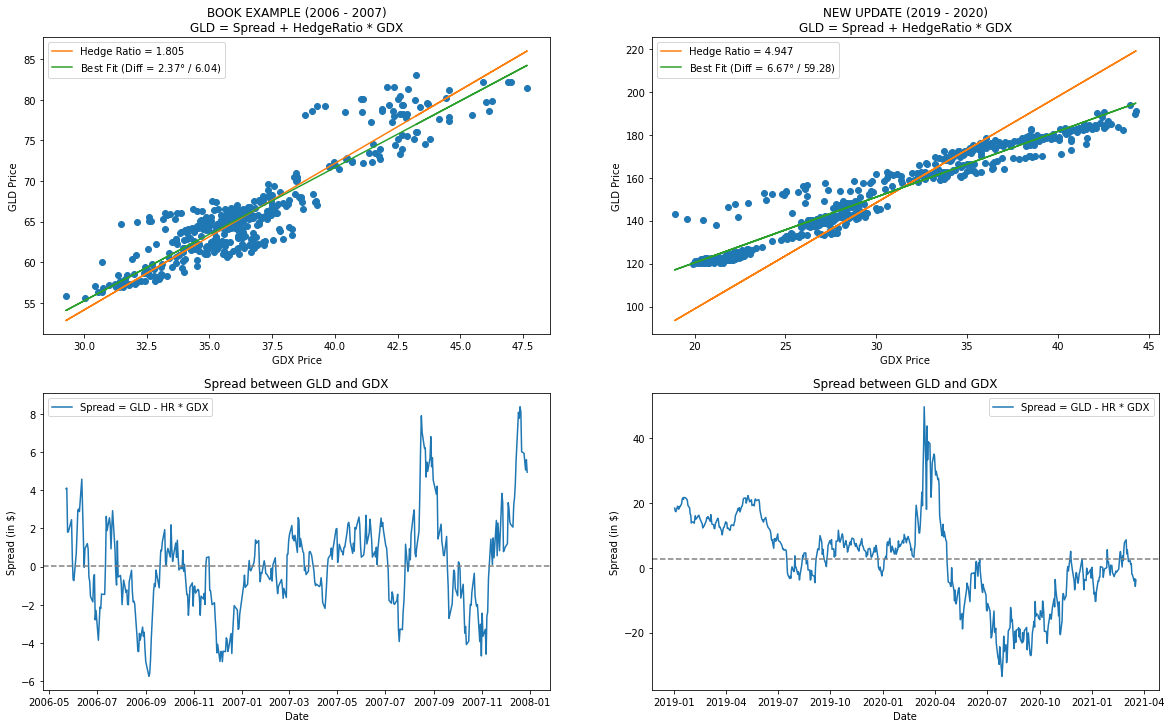

In [ ]:
df = yf.download("GLD GDX", start="2006-05-23", end="2007-12-31")['Adj Close']
df_new = yf.download("GLD GDX", start="2019-01-01")['Adj Close']

gld = df['GLD']
gdx = df['GDX']
gld_new = df_new['GLD']
gdx_new = df_new['GDX']

model=sm.OLS(gld, gdx)
results=model.fit()
m, b = np.polyfit(gdx, gld, 1)
hedgeRatio=results.params[-1]
spread=df['GLD'] - hedgeRatio * df['GDX']
diffDeg = math.degrees(math.atan(hedgeRatio) - math.atan(m))

model_new=sm.OLS(gld_new, gdx_new)
results_new=model_new.fit()
m_new, b_new = np.polyfit(gdx_new, gld_new, 1)
hedgeRatio_new=results_new.params[-1]
spread_new=df_new['GLD'] - hedgeRatio_new * df_new['GDX']
diffDeg_new = math.degrees(math.atan(hedgeRatio_new) - math.atan(m_new))


fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].set_title('BOOK EXAMPLE (2006 - 2007)\nGLD = Spread + HedgeRatio * GDX')
ax[0, 0].set_xlabel('GDX Price')
ax[0, 0].set_ylabel('GLD Price')
ax[0, 0].plot(gdx, gld, 'o')
ax[0, 0].plot(gdx, hedgeRatio * gdx, label=f'Hedge Ratio = {hedgeRatio:.3f}')
ax[0, 0].plot(gdx, m * gdx + b, label=f'Best Fit (Diff = {diffDeg:.2f}$\degree$ / {b:.2f})')
ax[0, 0].legend()

ax[1, 0].set_title('Spread between GLD and GDX')
ax[1, 0].plot(spread, label='Spread = GLD - HR * GDX')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Spread (in $)')
ax[1, 0].legend()

ax[1, 0].axhline(y=np.mean(spread), color='grey', linestyle='--')

ax[0, 1].set_title('NEW UPDATE (2019 - 2020)\nGLD = Spread + HedgeRatio * GDX')
ax[0, 1].set_xlabel('GDX Price')
ax[0, 1].set_ylabel('GLD Price')
ax[0, 1].plot(gdx_new, gld_new, 'o')
ax[0, 1].plot(gdx_new, hedgeRatio_new * gdx_new, label=f'Hedge Ratio = {hedgeRatio_new:.3f}')
ax[0, 1].plot(gdx_new, m_new * gdx_new + b_new, label=f'Best Fit (Diff = {diffDeg_new:.2f}$\degree$ / {b_new:.2f})')
ax[0, 1].legend()

ax[1, 1].set_title('Spread between GLD and GDX')
ax[1, 1].plot(spread_new, label='Spread = GLD - HR * GDX')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Spread (in $)')
ax[1, 1].legend()

ax[1, 1].axhline(y=np.mean(spread_new), color='grey', linestyle='--')

plt.show()

### [SAVE] How to Form a Good Cointegrating (and Mean-Reverting) Pair of Stocks

#### Running Cointegration (Engle-Granger) ADF test

-     The null hypothesis is no cointegration. 
- Variables in $y_0$ and $y_1$ are     assumed to be integrated of order 1, $I(1)$.

In [ ]:
print('=' * 32)
print('   BOOK EXAMPLE (2006 - 2007)')
print('=' * 32, '\n')

coint_t, pvalue, crit_value=coint(gld, gdx)

print('CADF t-statistic:'.rjust(20), '\t', f'{coint_t:.3f}')
print('CADF p-value:'.rjust(20), '\t', f' {pvalue * 100:.2f}%\n')

print('1% Critical Value:'.rjust(20), '\t', f'{crit_value[0]:.3f}')
print('5% Critical Value:'.rjust(20), '\t', f'{crit_value[1]:.3f}')
print('10% Critical Value:'.rjust(20), '\t', f'{crit_value[2]:.3f}\n')

# Augmented DF test for co-integration variables:                        GLD,GDX  
#CADF t-statistic        # of lags   AR(1) estimate 
#     -3.18156477                1        -0.070038 
#
#   1% Crit Value    5% Crit Value   10% Crit Value 
#          -3.924           -3.380           -3.082 

print('=' * 32)
print('    NEW UPDATE (2019 - 2020)')
print('=' * 32, '\n')

coint_t_new, pvalue_new, crit_value_new=coint(gld_new, gdx_new)

print('CADF t-statistic:'.rjust(20), '\t', f'{coint_t_new:.3f}')
print('CADF p-value:'.rjust(20), '\t', f' {pvalue_new * 100:.2f}%', '\n')

print('1% Critical Value:'.rjust(20), '\t', f'{crit_value_new[0]:.3f}')
print('5% Critical Value:'.rjust(20), '\t', f'{crit_value_new[1]:.3f}')
print('10% Critical Value:'.rjust(20), '\t', f'{crit_value_new[2]:.3f}')

   BOOK EXAMPLE (2006 - 2007)

   CADF t-statistic: 	 -3.212
       CADF p-value: 	  6.79%

  1% Critical Value: 	 -3.924
  5% Critical Value: 	 -3.351
 10% Critical Value: 	 -3.055

    NEW UPDATE (2019 - 2020)

   CADF t-statistic: 	 -2.846
       CADF p-value: 	  15.14% 

  1% Critical Value: 	 -3.916
  5% Critical Value: 	 -3.347
 10% Critical Value: 	 -3.052


-  Abs(t-stat) > critical value at 90%
- $p$-value says probability of null hypothesis (of no cointegration) is only 6.8%
- Degree of the cointegrated-ness is fading these days

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: Long `KO`, Short `PEP`
- **Time Period (book)**: 1977-01-01 to 2008-01-19
- **Time Period (update)**: 2018-01-01 to now

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


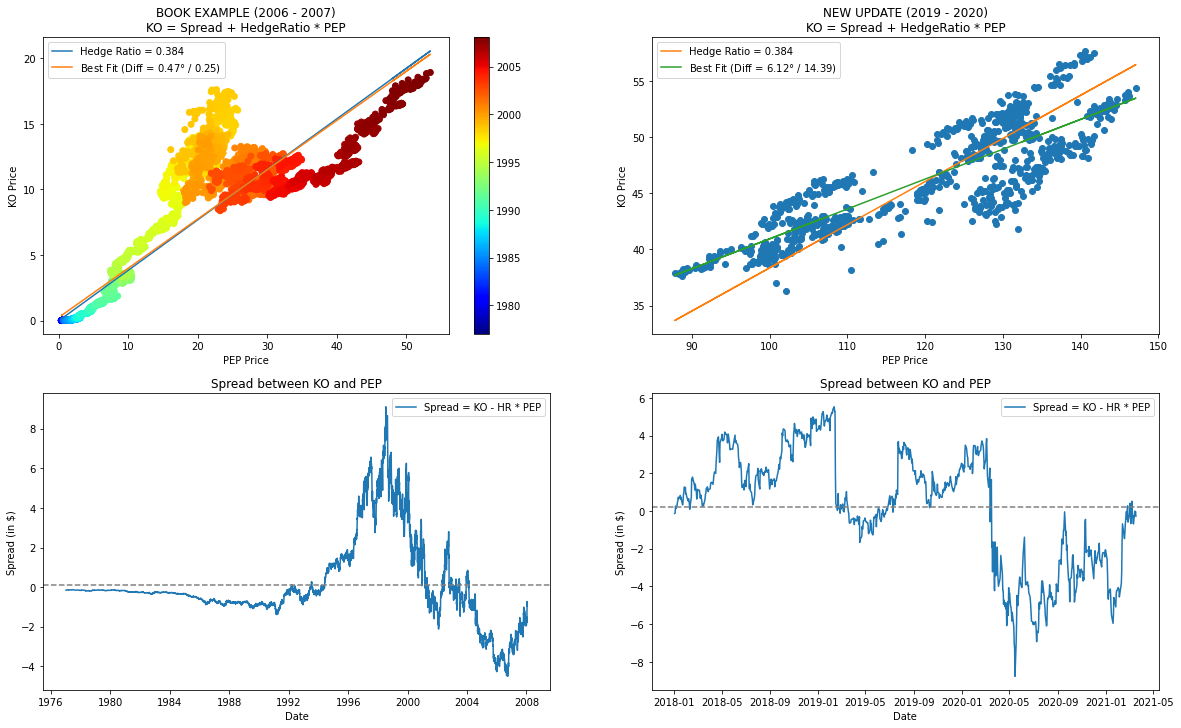

In [ ]:
df = yf.download("KO PEP", start="1977-01-01", end="2008-01-19")['Adj Close']
df_new = yf.download("KO PEP", start="2018-01-01")['Adj Close']

df.dropna(inplace=True)
df_new.dropna(inplace=True)

ko = df['KO']
pep = df['PEP']
ko_new = df_new['KO']
pep_new = df_new['PEP']

model=sm.OLS(ko, pep)
results=model.fit()
m, b = np.polyfit(pep, ko, 1)
hedgeRatio=results.params[-1]
spread=df['KO'] - hedgeRatio * df['PEP']
diffDeg = math.degrees(math.atan(hedgeRatio) - math.atan(m))

model_new=sm.OLS(ko_new, pep_new)
results_new=model_new.fit()
m_new, b_new = np.polyfit(pep_new, ko_new, 1)
hedgeRatio_new=results_new.params[-1]
spread_new=df_new['KO'] - hedgeRatio_new * df_new['PEP']
diffDeg_new = math.degrees(math.atan(hedgeRatio_new) - math.atan(m_new))

fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].set_title('BOOK EXAMPLE (2006 - 2007)\nKO = Spread + HedgeRatio * PEP')
ax[0, 0].set_xlabel('PEP Price')
ax[0, 0].set_ylabel('KO Price')
cb = ax[0, 0].scatter(pep, ko, c=(pep.index.year+ (pep.index.dayofyear -1)/365.), cmap='jet')
ax[0, 0].plot(pep, hedgeRatio * pep, label=f'Hedge Ratio = {hedgeRatio:.3f}')
ax[0, 0].plot(pep, m * pep + b, label=f'Best Fit (Diff = {diffDeg:.2f}$\degree$ / {b:.2f})')
ax[0, 0].legend()


ax[1, 0].set_title('Spread between KO and PEP')
ax[1, 0].plot(spread, label='Spread = KO - HR * PEP')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Spread (in $)')
ax[1, 0].legend()

ax[1, 0].axhline(y=np.mean(spread), color='grey', linestyle='--')

ax[0, 1].set_title('NEW UPDATE (2019 - 2020)\nKO = Spread + HedgeRatio * PEP')
ax[0, 1].set_xlabel('PEP Price')
ax[0, 1].set_ylabel('KO Price')
ax[0, 1].plot(pep_new, ko_new, 'o')
ax[0, 1].plot(pep_new, hedgeRatio_new * pep_new, label=f'Hedge Ratio = {hedgeRatio_new:.3f}')
ax[0, 1].plot(pep_new, m_new * pep_new + b_new, label=f'Best Fit (Diff = {diffDeg_new:.2f}$\degree$ / {b_new:.2f})')
ax[0, 1].legend()

ax[1, 1].set_title('Spread between KO and PEP')
ax[1, 1].plot(spread_new, label='Spread = KO - HR * PEP')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Spread (in $)')
ax[1, 1].legend()

ax[1, 1].axhline(y=np.mean(spread_new), color='grey', linestyle='--')

cbar = plt.colorbar(cb, ax=ax[0, 0])
plt.show()

In [ ]:
print('=' * 32)
print('   BOOK EXAMPLE (1977 - 2007)')
print('=' * 32, '\n')

coint_t, pvalue, crit_value=coint(ko, pep)

print('CADF t-statistic:'.rjust(20), '\t', f'{coint_t:.3f}')
print('CADF p-value:'.rjust(20), '\t', f' {pvalue * 100:.2f}%\n')

print('1% Critical Value:'.rjust(20), '\t', f'{crit_value[0]:.3f}')
print('5% Critical Value:'.rjust(20), '\t', f'{crit_value[1]:.3f}')
print('10% Critical Value:'.rjust(20), '\t', f'{crit_value[2]:.3f}\n')

# Augmented DF test for co-integration variables:                        KO ,PEP  
#CADF t-statistic        # of lags   AR(1) estimate 
#     -2.14258438                1        -0.001167 

#   1% Crit Value    5% Crit Value   10% Crit Value 
#          -3.880           -3.359           -3.038 

print('=' * 32)
print('    NEW UPDATE (2018 - 2020)')
print('=' * 32, '\n')

coint_t_new, pvalue_new, crit_value_new=coint(ko_new, pep_new)

print('CADF t-statistic:'.rjust(20), '\t', f'{coint_t_new:.3f}')
print('CADF p-value:'.rjust(20), '\t', f' {pvalue_new * 100:.2f}%', '\n')

print('1% Critical Value:'.rjust(20), '\t', f'{crit_value_new[0]:.3f}')
print('5% Critical Value:'.rjust(20), '\t', f'{crit_value_new[1]:.3f}')
print('10% Critical Value:'.rjust(20), '\t', f'{crit_value_new[2]:.3f}')

   BOOK EXAMPLE (1977 - 2007)

   CADF t-statistic: 	 -1.937
       CADF p-value: 	  56.13%

  1% Critical Value: 	 -3.898
  5% Critical Value: 	 -3.337
 10% Critical Value: 	 -3.045

    NEW UPDATE (2018 - 2020)

   CADF t-statistic: 	 -2.644
       CADF p-value: 	  22.04% 

  1% Critical Value: 	 -3.910
  5% Critical Value: 	 -3.344
 10% Critical Value: 	 -3.050


- Stationary $\implies$ Mean-Reverting Strategy **Guaranteed** to be Profitable
- **Correlation** = How 2 time series **prices** co-behave under a specific time-frame
- **Cointegration** = Co-behaviour in *long-term* **price**


In [ ]:
dailyRet=df.pct_change()
dailyRet.corr()

KO       PEP
KO   1.000000  0.463308
PEP  0.463308  1.000000

In [ ]:
dailyRet_clean=dailyRet.dropna()
pearsonr(dailyRet_clean.iloc[:,0], dailyRet_clean.iloc[:,1]) 

(0.4633081500058208, 0.0)

- First output is correlation coefficient, second output is the $p$-value.
### APT Factor Model
- Typically have long holding periods and long drawdowns during regime switching
- Fama-French Model: $\beta$, market cap (small$\uparrow$ / large$\downarrow$), B/P ratio (value$\uparrow$ / growth$\downarrow$)
### Historical Factors
- Capital IQ: www.capitaliq.com
- Compustat: www.compustat.com
- MSCI Barra: www.mscibarra.com
- Northfield Information Services: www.northinfo.com
- Quantitative Services Group: www.qsg.com

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Pool**: S&P600 Small Caps Selected at 2008-01-14 / 2020-02-10
- **Strategy**: 
  - **Rolling window size**: 252
  - **PCA Components employed**: 5
  - Long `BOTTOM50`, (Short `TOP50`)

- **Time Period (book)**: 2004-01-15 to 2008-01-14
- **Time Period (update)**: 2017-01-01 to now

In [ ]:
codes = ['ABCW', 'ABFS', 'ABM', 'ACAT', 'ACLS', 'ACO', 'ACTL', 'ADPT', 'AEIS', 'AGL', 'AGP', 'AGYS', 'AHS', 'AIN', 'AIR', 'AIT', 'AKR', 'ALAB', 'ALE', 'ALO', 'ALOG', 'AMED', 'AMIS', 'AMMD', 'AMSG', 'ANDE', 'ANSS', 'ANST', 'AOI', 'AOS', 'APOG', 'APSG', 'ARB', 'ARJ', 'ARQL', 'ARRS', 'ARTC', 'ASF', 'ASGN', 'ASTE', 'ASVI', 'ATMI', 'ATO', 'ATR', 'ATW', 'AVA', 'AVID', 'AWR', 'AXE', 'AYI', 'B', 'BAS', 'BBOX', 'BBX', 'BCSI', 'BDC', 'BDY', 'BELFB', 'BELM', 'BEZ', 'BFAM', 'BGFV', 'BGG', 'BHE', 'BKI', 'BKMU', 'BKUNA', 'BLG', 'BLKB', 'BLTI', 'BLUD', 'BMR', 'BNE', 'BPFH', 'BRC', 'BRKL', 'BRKS', 'BRS', 'BSET', 'BW', 'BWLD', 'BWS', 'CAB', 'CACB', 'CAE', 'CAI', 'CAPA', 'CAS', 'CASY', 'CATT', 'CBK', 'CBM', 'CBR', 'CBU', 'CCMP', 'CCRN', 'CDI', 'CEC', 'CELL', 'CENTA', 'CENX', 'CGNX', 'CGX', 'CHB', 'CHE', 'CHG', 'CHIC', 'CHP', 'CHTT', 'CHUX', 'CKH', 'CKP', 'CKR', 'CLC', 'CLP', 'CMTL', 'CNC', 'CNL', 'CNMD', 'CNQR', 'COA', 'COG', 'COHU', 'COLB', 'COO', 'CORS', 'CPF', 'CPKI', 'CPY', 'CRDN', 'CROX', 'CRR', 'CRY', 'CSAR', 'CSH', 'CSK', 'CSTR', 'CTR', 'CTS', 'CUB', 'CV', 'CW', 'CYBS', 'CYBX', 'CYMI', 'DAKT', 'DBRN', 'DCOM', 'DECK', 'DEL', 'DFG', 'DGII', 'DIOD', 'DITC', 'DNEX', 'DRH', 'DRQ', 'DSCP', 'DSL', 'DSPG', 'DW', 'EE', 'EGP', 'EME', 'ENZ', 'EPIC', 'EPIQ', 'EPR', 'ESIO', 'ESL', 'ESS', 'ETH', 'EWBC', 'EXAR', 'EXR', 'FARO', 'FBC', 'FBP', 'FBTX', 'FCF', 'FCFS', 'FDS', 'FED', 'FEIC', 'FFBC', 'FIF', 'FINL', 'FLE', 'FLIR', 'FLO', 'FMBI', 'FMT', 'FOR', 'FOSL', 'FRED', 'FRNT', 'FTBK', 'FUL', 'FWRD', 'GAP', 'GB', 'GBCI', 'GCO', 'GDI', 'GFF', 'GFG', 'GGC', 'GIFI', 'GKSR', 'GNCMA', 'GPI', 'GRB', 'GTIV', 'GVHR', 'GY', 'GYMB', 'HAE', 'HAFC', 'HAIN', 'HBHC', 'HCSG', 'HH', 'HIBB', 'HLEX', 'HLIT', 'HLX', 'HOS', 'HOTT', 'HRH', 'HSII', 'HTCH', 'HTLD', 'HUBG', 'HVT', 'HW', 'HWAY', 'HZO', 'IART', 'IBCP', 'ICON', 'ICUI', 'IDXX', 'IFC', 'IFSIA', 'IHP', 'INFA', 'INSP', 'INSU', 'INT', 'IO', 'IPCC', 'IRC', 'IRN', 'ITG', 'ITRI', 'IVAC', 'IVC', 'JAKK', 'JAS', 'JBX', 'JCOM', 'JDAS', 'JJSF', 'JOSB', 'KAMN', 'KDE', 'KDN', 'KEI', 'KEX', 'KLIC', 'KNDL', 'KNOT', 'KNSY', 'KNX', 'KOPN', 'KRC', 'KRG', 'KSWS', 'KWD', 'KWR', 'LAB', 'LAD', 'LAWS', 'LBY', 'LCAV', 'LDG', 'LDL', 'LFG', 'LFUS', 'LG', 'LHCG', 'LIFC', 'LII', 'LKQX', 'LNCE', 'LNN', 'LNY', 'LOJN', 'LSTR', 'LTC', 'LUFK', 'LXP', 'LYV', 'LZB', 'MAA', 'MAG', 'MANH', 'MANT', 'MATK', 'MATR', 'MCRI', 'MCRL', 'MCRS', 'MCS', 'MDRX', 'MDS', 'MDTH', 'MEE', 'MEI', 'MESA', 'MFB', 'MGAM', 'MHO', 'MINI', 'MKSI', 'MLI', 'MMS', 'MMSI', 'MNC', 'MNT', 'MOG', 'MOGN', 'MOH', 'MOV', 'MPW', 'MRCY', 'MSC', 'MSCC', 'MTEX', 'MTH', 'MTRX', 'MTSC', 'MW', 'MYE', 'NAFC', 'NAPS', 'NARA', 'NAVG', 'NCS', 'NEWP', 'NILE', 'NJR', 'NLS', 'NNN', 'NOVN', 'NP', 'NPK', 'NPO', 'NSIT', 'NTG', 'NTGR', 'NVTL', 'NWK', 'NWN', 'NX', 'ODFL', 'ODSY', 'OII', 'OMCL', 'OMG', 'OMI', 'OMN', 'OSTE', 'OXM', 'OXPS', 'PBKS', 'PBY', 'PCTI', 'PCX', 'PDC', 'PDGI', 'PDX', 'PEET', 'PENX', 'PETD', 'PETS', 'PFCB', 'PFGC', 'PFWD', 'PHLY', 'PHTN', 'PII', 'PJC', 'PKE', 'PKY', 'PLAB', 'PLCE', 'PLFE', 'PLNR', 'PLXS', 'PMC', 'PMTI', 'PNK', 'PNRA', 'PNY', 'POL', 'POOL', 'POSS', 'PPD', 'PRA', 'PRAA', 'PRFT', 'PRGS', 'PRSP', 'PRXL', 'PSB', 'PSEM', 'PSSI', 'PTEC', 'PVA', 'PVTB', 'PZZA', 'QSII', 'RADS', 'RAH', 'RATE', 'RBC', 'RBN', 'RCRC', 'REGN', 'RESP', 'RGR', 'RHB', 'RKT', 'RLI', 'RNT', 'ROCK', 'ROG', 'ROIAK', 'RRGB', 'RSCR', 'RSYS', 'RTEC', 'RTI', 'RUS', 'RUTH', 'SAFM', 'SAFT', 'SAH', 'SAM', 'SBIB', 'SBNY', 'SCHS', 'SCRX', 'SCSC', 'SCSS', 'SCUR', 'SFN', 'SFY', 'SGR', 'SGY', 'SHFL', 'SHLM', 'SIE', 'SIGI', 'SINT', 'SJI', 'SKP', 'SKT', 'SKX', 'SKY', 'SKYW', 'SLXP', 'SM', 'SMA', 'SMP', 'SMRT', 'SMSC', 'SMSI', 'SNH', 'SNIC', 'SNS', 'SNX', 'SONC', 'SPAR', 'SPC', 'SPF', 'SPSS', 'SPTN', 'SR', 'SRDX', 'SRT', 'SRZ', 'SSD', 'SSI', 'SSS', 'SSYS', 'STC', 'STL', 'STMP', 'STSA', 'SUG', 'SUP', 'SUPX', 'SUSQ', 'SVNT', 'SWKS', 'SWM', 'SWS', 'SWSI', 'SWX', 'SXI', 'SYKE', 'SYMM', 'SYNA', 'TBI', 'TDY', 'TG', 'TGI', 'TGIC', 'TGX', 'THQI', 'THS', 'TLGD', 'TNL', 'TRAD', 'TRAK', 'TRMB', 'TRST', 'TRX', 'TRY', 'TSCO', 'TSFG', 'TTC', 'TTEK', 'TTI', 'TTMI', 'TTWO', 'TUES', 'TWB', 'TWGP', 'TXI', 'TXRH', 'TYL', 'UBSI', 'UCBH', 'UCBI', 'UEIC', 'UFCS', 'UFPI', 'UGI', 'UIL', 'UMBF', 'UMPQ', 'UNF', 'UNFI', 'UNS', 'UNT', 'UNTD', 'USNA', 'USTR', 'UTEK', 'UTI', 'VECO', 'VICR', 'VITL', 'VIVO', 'VLCM', 'VMI', 'VOL', 'VOXX', 'VPHM', 'VSAT', 'VSEA', 'VTIV', 'VVI', 'WBSN', 'WCN', 'WDFC', 'WGO', 'WGOV', 'WHQ', 'WIBC', 'WMS', 'WNC', 'WPP', 'WRLD', 'WSO', 'WTFC', 'WTNY', 'WTS', 'WW', 'WWW', 'WXS', 'XRIT', 'ZEP', 'ZLC', 'ZNT', 'ZQK', 'ZUMZ'] 

df_tmp = wrds.raw_sql(f"""
SELECT crsp.dsf.permno, ticker, date, prc, cfacpr
FROM crsp.dsf
LEFT JOIN crsp.stocknames ON crsp.dsf.permno=crsp.stocknames.permno
WHERE ticker IN ({', '.join(f"'{x}'" for x in codes)}) AND date >= '2004-01-15' AND date <= '2008-01-14'""", date_cols=['date'])

df_tmp['prc'] = np.abs(df_tmp['prc'])
df_tmp.sort_values('permno', inplace=True)
df_tmp.drop_duplicates(subset=['ticker', 'date'], keep='last', inplace=True)
df_pivot = df_tmp.pivot(index='date', columns='ticker', values='prc')
df_factor = df_tmp.pivot(index='date', columns='ticker', values='cfacpr')
df_factor = df_factor.div(df_factor.iloc[-1])
df_factor.loc[:'2005-08-24', 'MW'] = df_factor.loc[:'2005-08-24', 'MW'] * 0.006299
df = df_pivot.div(df_factor)

lookback=252 # training period for factor exposure
numFactors=5
topN=50 # for trading strategy, long stocks with topN exepcted 1-day returns

dailyRet=df.pct_change() # note the rows of dailyret are the observations at different time periods
df_positions=pd.DataFrame(0, index=dailyRet.index, columns=dailyRet.columns)
end_index = df.shape[0]

for t in np.arange(lookback+2, end_index):
  R=dailyRet.iloc[t-lookback-1:t].copy()
  R.dropna(axis=1, inplace=True)
  y = R.iloc[-1]
  R = R.iloc[:-1]

  pca = PCA(n_components=numFactors)
  X = pca.fit_transform(R.T)
  X = sm.add_constant(X)

  beta = np.linalg.lstsq(X, y, rcond=None)[0]
  RExp = pd.Series(np.dot(X, beta), index=y.index)
  RExp.sort_values(inplace=True)

  df_positions.loc[dailyRet.index[t], RExp.index[-topN:]]=1
  df_positions.loc[dailyRet.index[t], RExp.index[:topN]]=-1
  
capital_short = df_positions.mul(dailyRet)
capital_short.fillna(0, inplace=True)
capital_short['sum'] = capital_short.sum(axis=1) / df_positions.astype(bool).sum(axis=1)
capital_short = capital_short.iloc[lookback+2:]

capital_long = df_positions.clip(lower=0).mul(dailyRet)
capital_long.fillna(0, inplace=True)
capital_long['sum'] = capital_long.sum(axis=1) / df_positions.clip(lower=0).astype(bool).sum(axis=1)
capital_long = capital_long.iloc[lookback+2:]

ret_short = capital_short['sum']
avgRet_short=np.mean(ret_short)*252
avgStDev_short = np.std(ret_short)*np.sqrt(252)
Sharpe_short = avgRet_short / avgStDev_short

ret_long = capital_long['sum']
avgRet_long=np.mean(ret_long)*252
avgStDev_long = np.std(ret_long)*np.sqrt(252)
Sharpe_long = avgRet_long / avgStDev_long

capital_short

ticker          ABCW  ABFS  ABM  ACAT      ACLS  ...  ZLC  ZNT  ZQK  ZUMZ       sum
date                                             ...                               
2005-01-19 -0.000000  -0.0 -0.0  -0.0 -0.009589  ... -0.0 -0.0 -0.0   0.0 -0.011266
2005-01-20 -0.000000  -0.0 -0.0   0.0  0.024896  ... -0.0 -0.0 -0.0   0.0  0.005011
2005-01-21 -0.000000  -0.0 -0.0   0.0  0.002837  ... -0.0 -0.0 -0.0   0.0  0.002657
2005-01-24 -0.000000  -0.0 -0.0  -0.0  0.014225  ... -0.0 -0.0 -0.0   0.0  0.012104
2005-01-25 -0.000000   0.0  0.0  -0.0 -0.010101  ... -0.0  0.0  0.0   0.0 -0.007052
...              ...   ...  ...   ...       ...  ...  ...  ...  ...   ...       ...
2008-01-08 -0.049372  -0.0 -0.0  -0.0 -0.000000  ...  0.0 -0.0 -0.0  -0.0 -0.016061
2008-01-09 -0.025496   0.0  0.0  -0.0  0.000000  ... -0.0  0.0  0.0   0.0 -0.003378
2008-01-10  0.025783   0.0 -0.0   0.0  0.000000  ... -0.0  0.0  0.0   0.0  0.001434
2008-01-11 -0.000000  -0.0 -0.0  -0.0 -0.000000  ... -0.0 -0.0 -0.0  -0.0 -0.005463
2008-01-14  0.000466   0.0  0.0  -0.0  0.000000  ... -0.0  0.0  0.0   0.0  0.005237

[752 rows x 601 columns]

In [ ]:
stocklist = ['AAN', 'AAOI', 'AAON', 'AAT', 'AAWW', 'ABCB', 'ABG', 'ABM', 'ABTX', 'ACA', 'ACLS', 'ADC', 'ADTN', 'ADUS', 'AEGN', 'AEIS', 'AEL', 'AGO', 'AGYS', 'AHH', 'AIN', 'AIR', 'AIT', 'AJRD', 'AKR', 'ALEX', 'ALG', 'ALGT', 'ALRM', 'AMBC', 'AMCX', 'AMN', 'AMPH', 'AMSF', 'AMWD', 'ANDE', 'ANF', 'ANGO', 'ANIK', 'ANIP', 'APEI', 'APOG', 'ARCB', 'ARI', 'ARLO', 'ARNC', 'AROC', 'ARR', 'ASIX', 'ASTE', 'ATI', 'ATNI', 'AVA', 'AVAV', 'AVD', 'AWR', 'AX', 'AXL', 'AZZ', 'B', 'BANC', 'BANF', 'BANR', 'BBBY', 'BCC', 'BCEI', 'BCOR', 'BCPC', 'BDN', 'BELFB', 'BFS', 'BGS', 'BHE', 'BHLB', 'BIG', 'BJRI', 'BKE', 'BKU', 'BLMN', 'BMI', 'BMTX', 'BNED', 'BOOM', 'BOOT', 'BPFH', 'BRC', 'BRKL', 'BSIG', 'CADE', 'CAKE', 'CAL', 'CALM', 'CAMP', 'CASH', 'CATM', 'CATO', 'CBB', 'CBU', 'CCOI', 'CCRN', 'CCS', 'CEIX', 'CELH', 'CENT', 'CENTA', 'CENX', 'CEVA', 'CFFN', 'CHCO', 'CHCT', 'CHEF', 'CHRS', 'CHS', 'CHUY', 'CIR', 'CKH', 'CLB', 'CLDT', 'CLF', 'CLI', 'CLW', 'CMO', 'CMTL', 'CNMD', 'CNSL', 'CNXN', 'COHU', 'COKE', 'COLB', 'CONN', 'COOP', 'CORE', 'CORT', 'CPE', 'CPF', 'CPK', 'CPS', 'CPSI', 'CRMT', 'CROX', 'CRS', 'CRVL', 'CRY', 'CSGS', 'CSII', 'CSR', 'CTB', 'CTRE', 'CTS', 'CUB', 'CUBI', 'CUTR', 'CVBF', 'CVCO', 'CVET', 'CVGW', 'CWT', 'CXW', 'CYH', 'CYTK', 'DAKT', 'DBD', 'DBI', 'DCOM', 'DDD', 'DEA', 'DFIN', 'DGII', 'DHC', 'DIN', 'DIOD', 'DLX', 'DNOW', 'DORM', 'DRH', 'DRQ', 'DSPG', 'DXPE', 'EAT', 'EBIX', 'ECHO', 'ECOL', 'ECPG', 'EGBN', 'EGHT', 'EGOV', 'EGRX', 'EHTH', 'EIG', 'ELF', 'ELY', 'ENDP', 'ENSG', 'ENTA', 'ENVA', 'EPAC', 'EPAY', 'EPRT', 'ESE', 'ETH', 'EVTC', 'EXLS', 'EXPO', 'EXTN', 'EXTR', 'EZPW', 'FARO', 'FBC', 'FBK', 'FBNC', 'FBP', 'FCF', 'FCPT', 'FDP', 'FELE', 'FF', 'FFBC', 'FHB', 'FIX', 'FIZZ', 'FLGT', 'FLOW', 'FMBI', 'FN', 'FOE', 'FORM', 'FORR', 'FOSL', 'FRGI', 'FSP', 'FSS', 'FUL', 'FWRD', 'GBX', 'GCI', 'GCO', 'GCP', 'GDOT', 'GEO', 'GES', 'GFF', 'GHL', 'GIII', 'GKOS', 'GLT', 'GLUU', 'GME', 'GMS', 'GNL', 'GPI', 'GPMT', 'GPRE', 'GTLS', 'GTY', 'GVA', 'GWB', 'HA', 'HAFC', 'HAYN', 'HCC', 'HCI', 'HFWA', 'HI', 'HIBB', 'HLIT', 'HLX', 'HMN', 'HMST', 'HMSY', 'HNGR', 'HOPE', 'HP', 'HSC', 'HSII', 'HSKA', 'HSTM', 'HT', 'HTH', 'HTLD', 'HUBG', 'HVT', 'HWKN', 'HZO', 'IBP', 'IBTX', 'ICHR', 'IIIN', 'IIPR', 'ILPT', 'INDB', 'INGN', 'INN', 'INVA', 'IOSP', 'IPAR', 'IRBT', 'IRDM', 'IRT', 'ITGR', 'ITRI', 'IVC', 'IVR', 'JBSS', 'JBT', 'JJSF', 'JOE', 'JRVR', 'KALU', 'KAMN', 'KELYA', 'KFY', 'KLIC', 'KN', 'KOP', 'KRA', 'KREF', 'KRG', 'KTB', 'KWR', 'LCI', 'LCII', 'LDL', 'LGIH', 'LL', 'LMAT', 'LMNX', 'LNN', 'LNTH', 'LOCO', 'LPG', 'LPI', 'LPSN', 'LQDT', 'LTC', 'LTHM', 'LXP', 'LZB', 'M', 'MANT', 'MATW', 'MATX', 'MCRI', 'MCS', 'MD', 'MDC', 'MDP', 'MDRX', 'MED', 'MEI', 'MERC', 'MGLN', 'MGPI', 'MHO', 'MIK', 'MLAB', 'MLI', 'MMI', 'MMSI', 'MNRO', 'MODV', 'MOG-A', 'MOV', 'MPAA', 'MRTN', 'MSTR', 'MTDR', 'MTH', 'MTOR', 'MTRN', 'MTRX', 'MTSC', 'MXL', 'MYE', 'MYGN', 'MYRG', 'NBHC', 'NBR', 'NBTB', 'NEO', 'NFBK', 'NMIH', 'NP', 'NPK', 'NPO', 'NSA', 'NSIT', 'NTGR', 'NTUS', 'NWBI', 'NWN', 'NX', 'NXGN', 'NXRT', 'NYMT', 'ODP', 'OFG', 'OFIX', 'OII', 'OIS', 'OMCL', 'OMI', 'ONB', 'ONTO', 'OPI', 'OSIS', 'OSPN', 'OSUR', 'OXM', 'PAHC', 'PARR', 'PATK', 'PBF', 'PBH', 'PBI', 'PCRX', 'PDCE', 'PDFS', 'PETS', 'PFBC', 'PFS', 'PGTI', 'PIPR', 'PKE', 'PLAB', 'PLAY', 'PLCE', 'PLMR', 'PLT', 'PLUS', 'PLXS', 'PMT', 'PNTG', 'POWI', 'POWL', 'PPBI', 'PRA', 'PRAA', 'PRDO', 'PRFT', 'PRGS', 'PRK', 'PRLB', 'PSMT', 'PTEN', 'PUMP', 'PVAC', 'QEP', 'QNST', 'RAVN', 'RC', 'RCII', 'RCM', 'RDNT', 'REGI', 'RES', 'REX', 'REZI', 'RGNX', 'RGP', 'RGR', 'RGS', 'RLGY', 'RMAX', 'RMBS', 'RNST', 'ROCK', 'ROG', 'ROIC', 'RPAI', 'RPT', 'RRC', 'RRGB', 'RUTH', 'RWT', 'RYAM', 'SAFE', 'SAFT', 'SAH', 'SAIA', 'SANM', 'SBCF', 'SBH', 'SBSI', 'SCHL', 'SCL', 'SCSC', 'SCVL', 'SEM', 'SENEA', 'SFBS', 'SFNC', 'SGH', 'SHAK', 'SHEN', 'SHOO', 'SIG', 'SITC', 'SJI', 'SKT', 'SKYW', 'SLCA', 'SLP', 'SM', 'SMP', 'SMPL', 'SNBR', 'SNEX', 'SPOK', 'SPPI', 'SPSC', 'SPTN', 'SPXC', 'SRDX', 'SSP', 'SSTK', 'STAR', 'STBA', 'STC', 'STMP', 'SUPN', 'SWM', 'SWN', 'SXC', 'SXI', 'SYKE', 'TALO', 'TBI', 'TBK', 'TCMD', 'TG', 'TGI', 'THRM', 'TILE', 'TISI', 'TMP', 'TMST', 'TNC', 'TPRE', 'TRHC', 'TRST', 'TRUP', 'TSE', 'TTEC', 'TTGT', 'TTMI', 'TUP', 'TVTY', 'TWI', 'UBA', 'UCBI', 'UCTT', 'UEIC', 'UFCS', 'UFI', 'UFPI', 'UHT', 'UIHC', 'UIS', 'UNF', 'UNFI', 'UNIT', 'USCR', 'USNA', 'USPH', 'UVE', 'UVV', 'VBTX', 'VECO', 'VG', 'VGR', 'VIAV', 'VICR', 'VIVO', 'VNDA', 'VRA', 'VREX', 'VRTS', 'VRTV', 'VSTO', 'VTOL', 'VVI', 'WABC', 'WD', 'WDFC', 'WDR', 'WETF', 'WGO', 'WIRE', 'WNC', 'WRE', 'WRLD', 'WSR', 'WTS', 'WWW', 'XHR', 'XNCR', 'XPER', 'ZEUS', 'ZUMZ', 'ZYXI']

df_new = yf.download(stocklist, start="2017-01-01")['Adj Close']
df_new.sort_index(inplace=True)
df_new.dropna(how='all', axis=0, inplace=True)

dailyRet_new=df_new.pct_change() # note the rows of dailyret are the observations at different time periods
df_positions_new=pd.DataFrame(0, index=dailyRet_new.index, columns=dailyRet_new.columns)
end_index_new = df_new.shape[0]

for t in np.arange(lookback+2, end_index_new):
  R_new=dailyRet_new.iloc[t-lookback-1:t].copy()
  R_new.dropna(axis=1, inplace=True)
  y_new = R_new.iloc[-1]
  R_new = R_new.iloc[:-1]

  pca_new = PCA(n_components=numFactors)
  X_new = pca_new.fit_transform(R_new.T)
  X_new = sm.add_constant(X_new)

  beta_new = np.linalg.lstsq(X_new, y_new, rcond=None)[0]
  RExp_new = pd.Series(np.dot(X_new, beta_new), index=y_new.index)
  RExp_new.sort_values(inplace=True)

  df_positions_new.loc[dailyRet_new.index[t], RExp_new.index[-topN:]]=1
  df_positions_new.loc[dailyRet_new.index[t], RExp_new.index[:topN]]=-1
  
capital_short_new = df_positions_new.mul(dailyRet_new)
capital_short_new.fillna(0, inplace=True)
capital_short_new['sum'] = capital_short_new.sum(axis=1) / df_positions_new.astype(bool).sum(axis=1)
capital_short_new = capital_short_new.iloc[lookback+2:]

capital_long_new = df_positions_new.clip(lower=0).mul(dailyRet_new)
capital_long_new.fillna(0, inplace=True)
capital_long_new['sum'] = capital_long_new.sum(axis=1) / df_positions_new.clip(lower=0).astype(bool).sum(axis=1)
capital_long_new = capital_long_new.iloc[lookback+2:]

ret_short_new = capital_short_new['sum']
avgRet_short_new=np.mean(ret_short_new)*252
avgStDev_short_new = np.std(ret_short_new)*np.sqrt(252)
Sharpe_short_new = avgRet_short_new / avgStDev_short_new

ret_long_new = capital_long_new['sum']
avgRet_long_new=np.mean(ret_long_new)*252
avgStDev_long_new = np.std(ret_long_new)*np.sqrt(252)
Sharpe_long_new = avgRet_long_new / avgStDev_long_new

print(('=' * 40).ljust(63), '=' * 40)
print('       BOOK EXAMPLE (2004 - 2007)'.ljust(63), '         NEW UPDATE (2017 - 2020)')
print(('=' * 40).ljust(63), '=' * 40, '\n')
print('       --- LONG-SHORT STRATEGY ---'.ljust(63), '       --- LONG-SHORT STRATEGY ---\n')

print('Average Annual Return:'.rjust(30), '\t', f'{avgRet_short * 100:.2f}%'.ljust(30), 'Average Annual Return:'.rjust(30), '\t', f'{avgRet_short_new * 100:.2f}%')
print('Average Annual Volatility:'.rjust(30), '\t', f'{avgStDev_short * 100:.2f}%'.ljust(30), 'Average Annual Volatility:'.rjust(30), '\t', f'{avgStDev_short_new * 100:.2f}%')
print('Sharpe Ratio:'.rjust(30), '\t', f'{Sharpe_short:.3f}'.ljust(30), 'Sharpe Ratio:'.rjust(30), '\t', f'{Sharpe_short_new:.3f}\n')

print('        --- LONG-ONLY STRATEGY ---'.ljust(63), '        --- LONG-ONLY STRATEGY ---\n')
print('Average Annual Return:'.rjust(30), '\t', f'{avgRet_long * 100:.2f}%'.ljust(30), 'Average Annual Return:'.rjust(30), '\t', f'{avgRet_long_new * 100:.2f}%')
print('Average Annual Volatility:'.rjust(30), '\t', f'{avgStDev_long * 100:.2f}%'.ljust(30), 'Average Annual Volatility:'.rjust(30), '\t', f'{avgStDev_long_new * 100:.2f}%')
print('Sharpe Ratio:'.rjust(30), '\t', f'{Sharpe_long:.3f}'.ljust(30), 'Sharpe Ratio:'.rjust(30), '\t', f'{Sharpe_long_new:.3f}\n')

[*********************100%***********************]  600 of 600 completed
========================================                        ========================================
       BOOK EXAMPLE (2004 - 2007)                                        NEW UPDATE (2017 - 2020)
========================================                        ======================================== 

       --- LONG-SHORT STRATEGY ---                                     --- LONG-SHORT STRATEGY ---

        Average Annual Return: 	 -0.79%                                 Average Annual Return: 	 30.12%
    Average Annual Volatility: 	 10.17%                             Average Annual Volatility: 	 22.34%
                 Sharpe Ratio: 	 -0.077                                          Sharpe Ratio: 	 1.348

        --- LONG-ONLY STRATEGY ---                                      --- LONG-ONLY STRATEGY ---

        Average Annual Return: 	 11.18%                                 Average Annual Return: 	 58.20%
 

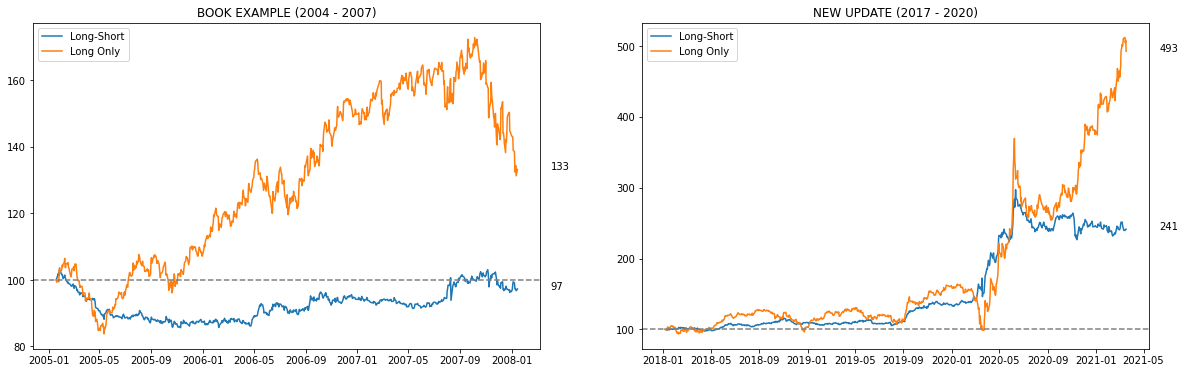

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ret_short = capital_short['sum'] + 1
ret_short[0] = 100.
ret_short = ret_short.cumprod()

ret_long = capital_long['sum'] + 1
ret_long[0] = 100.
ret_long = ret_long.cumprod()

ret_short_new = capital_short_new['sum'] + 1.
ret_short_new[0] = 100.
ret_short_new = ret_short_new.cumprod()

ret_long_new = capital_long_new['sum'] + 1.
ret_long_new[0] = 100.
ret_long_new = ret_long_new.cumprod()

ax1.set_title('BOOK EXAMPLE (2004 - 2007)')
ax1.plot(ret_short, label='Long-Short')
ax1.plot(ret_long, label='Long Only')

ax1.axhline(y=100.0, color='grey', linestyle='--')
ax1.legend()

ax1.annotate(f'{ret_short[-1] :,.0f}', xy=(1, ret_short[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'{ret_long[-1] :,.0f}', xy=(1, ret_long[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax2.set_title('NEW UPDATE (2017 - 2020)')
ax2.plot(ret_short_new, label='Long-Short')
ax2.plot(ret_long_new, label='Long Only')

ax2.axhline(y=100.0, color='grey', linestyle='--')
ax2.legend()

ax2.annotate(f'{ret_short_new[-1] :,.0f}', xy=(1, ret_short_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax2.annotate(f'{ret_long_new[-1] :,.0f}', xy=(1, ret_long_new[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

The *drawback* is we assume it exhabits certain momentum behaviour for fundamentals / economical factors

### Exit Signals
- Fixed Holding Period
  - Momentum, by default = information via slow diffusion, a process with **finite lifetime**
  - Potential **data-snooping bias**, not enough historical trades
  - On contrary, stats helps to find the **optimal holding period** of *mean-reverting strategies*
  $$ dz(t) = -  \theta (z(t) - \mu ) \, dt + dW$$
  - ODE with follows exponential decay with half-life
  $$ \frac{\ln(2)}{\theta}$$
  - Whole time series can help in finding $\theta$, more robust


### Calculation of the Half-Life of a Mean-Reverting Time Series


<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: Long `GLD`, Short `GDX`
- **Time Period (book)**: 2006-05-23 to 2007-12-31
- **Time Period (update)**: 2019-01-01 to now

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


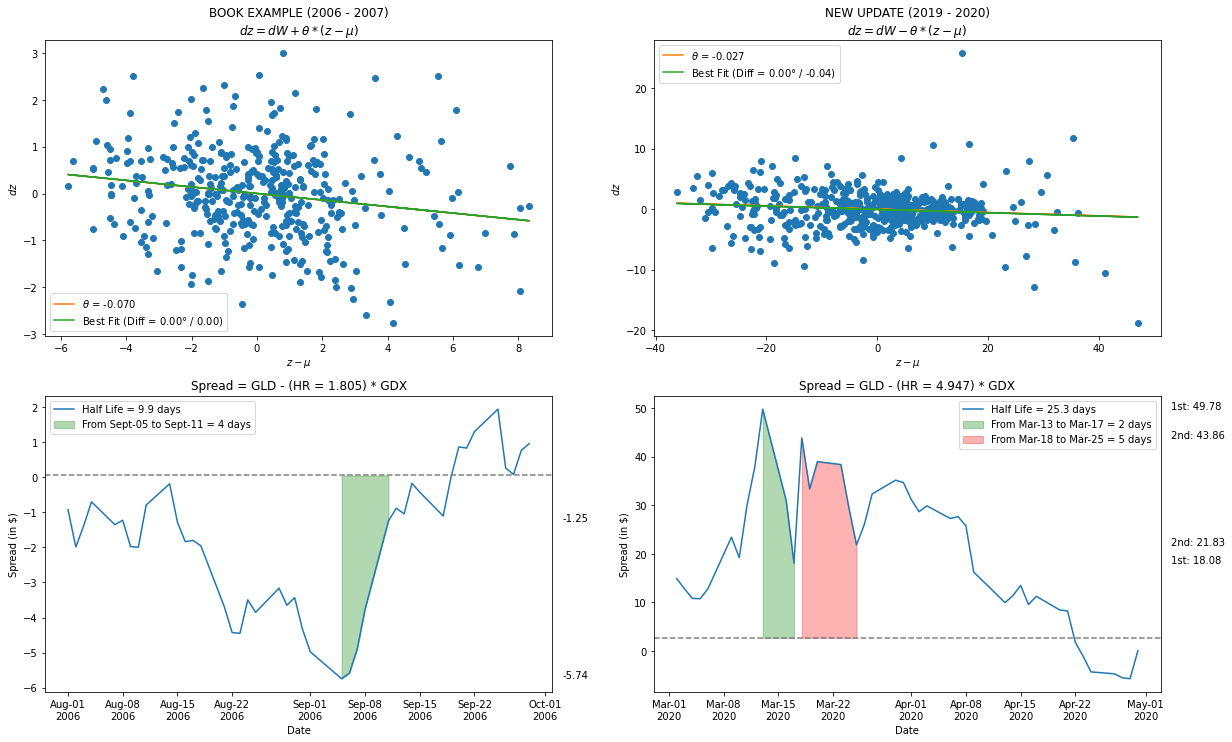

In [ ]:
### OLD NEWS IS SO EXCITING
df = yf.download("GLD GDX", start="2006-05-23", end="2007-12-31")['Adj Close']
df_new = yf.download("GLD GDX", start="2019-01-01")['Adj Close']

gld = df['GLD']
gdx = df['GDX']
gld_new = df_new['GLD']
gdx_new = df_new['GDX']

model=sm.OLS(gld, gdx)
results=model.fit()
hedgeRatio=results.params[-1]
spread=df['GLD'] - hedgeRatio * df['GDX']
spread_prev = spread.shift()
dz = spread - spread_prev
dz = dz.iloc[1:]
spread_prev = spread_prev.iloc[1:]
z_plot = spread_prev - np.mean(spread_prev)

model2=sm.OLS(dz, z_plot)
results2=model2.fit()
m, b = np.polyfit(z_plot, dz, 1)
theta=results2.params[-1]
halflife=-np.log(2)/theta
diffDeg = math.degrees(math.atan(theta) - math.atan(m))

model_new=sm.OLS(gld_new, gdx_new)
results_new=model_new.fit()
hedgeRatio_new=results_new.params[-1]
spread_new=df_new['GLD'] - hedgeRatio_new * df_new['GDX']
spread_prev_new = spread_new.shift()
dz_new = spread_new - spread_prev_new
dz_new = dz_new.iloc[1:]
spread_prev_new = spread_prev_new.iloc[1:]
z_plot_new = spread_prev_new - np.mean(spread_prev_new)

model2_new=sm.OLS(dz_new, z_plot_new)
results2_new=model2_new.fit()
m_new, b_new = np.polyfit(z_plot_new, dz_new, 1)
theta_new=results2_new.params[-1]
halflife_new=-np.log(2)/theta_new
diffDeg_new = math.degrees(math.atan(theta_new) - math.atan(m_new))

fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0, 0].set_title('BOOK EXAMPLE (2006 - 2007)\n$dz = dW + \\theta * (z - \mu) $')
ax[0, 0].set_xlabel('$z - \mu$')
ax[0, 0].set_ylabel('$dz$')
ax[0, 0].plot(z_plot, dz, 'o')
ax[0, 0].plot(z_plot, theta * z_plot, label=f'$\\theta$ = {theta:.3f}')
ax[0, 0].plot(z_plot, m * z_plot + b, label=f'Best Fit (Diff = {diffDeg:.2f}$\degree$ / {b:.2f})')
ax[0, 0].legend()

ax[1, 0].set_title(f'Spread = GLD - (HR = {hedgeRatio:.3f}) * GDX')
ax[1, 0].plot(spread.loc['2006-08':'2006-09'], label=f'Half Life = {halflife:.1f} days')
ax[1, 0].xaxis.set_major_formatter(DateFormatter("%b-%d\n%Y"))
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Spread (in $)')

ax[1, 0].fill_between(spread.index, spread, np.mean(spread), where=((spread.index >= '2006-09-05') & (spread.index <= '2006-09-11')), color='green', alpha=0.3, label=f'From Sept-05 to Sept-11 = 4 days')
ax[1, 0].axhline(y=np.mean(spread), color='grey', linestyle='--')
ax[1, 0].legend()

ax[1, 0].annotate(f'{spread.loc["2006-09-05"]:.2f}', xy=(1, spread.loc["2006-09-05"]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax[1, 0].annotate(f'{spread.loc["2006-09-11"]:.2f}', xy=(1, spread.loc["2006-09-11"]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax[0, 1].set_title('NEW UPDATE (2019 - 2020)\n$dz = dW - \\theta * (z - \mu) $')
ax[0, 1].set_xlabel('$z - \mu$')
ax[0, 1].set_ylabel('$dz$')
ax[0, 1].plot(z_plot_new, dz_new, 'o')
ax[0, 1].plot(z_plot_new, theta_new * z_plot_new, label=f'$\\theta$ = {theta_new:.3f}')
ax[0, 1].plot(z_plot_new, m_new * z_plot_new + b_new, label=f'Best Fit (Diff = {diffDeg_new:.2f}$\degree$ / {b_new:.2f})')
ax[0, 1].legend()

ax[1, 1].set_title(f'Spread = GLD - (HR = {hedgeRatio_new:.3f}) * GDX')
ax[1, 1].plot(spread_new.loc['2020-03':'2020-04'], label=f'Half Life = {halflife_new:.1f} days')
ax[1, 1].xaxis.set_major_formatter(DateFormatter("%b-%d\n%Y"))
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Spread (in $)')

ax[1, 1].fill_between(spread_new.index, spread_new, np.mean(spread_new), where=((spread_new.index >= '2020-03-13') & (spread_new.index <= '2020-03-17')), color='green', alpha=0.3, label=f'From Mar-13 to Mar-17 = 2 days')
ax[1, 1].fill_between(spread_new.index, spread_new, np.mean(spread_new), where=((spread_new.index >= '2020-03-18') & (spread_new.index <= '2020-03-25')), color='red', alpha=0.3, label=f'From Mar-18 to Mar-25 = 5 days')
ax[1, 1].axhline(y=np.mean(spread_new), color='grey', linestyle='--')
ax[1, 1].legend()

ax[1, 1].annotate(f'1st: {spread_new.loc["2020-03-13"]:.2f}', xy=(1, spread_new.loc["2020-03-13"]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax[1, 1].annotate(f'1st: {spread_new.loc["2020-03-17"]:.2f}', xy=(1, spread_new.loc["2020-03-17"]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax[1, 1].annotate(f'2nd: {spread_new.loc["2020-03-18"]:.2f}', xy=(1, spread_new.loc["2020-03-18"]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax[1, 1].annotate(f'2nd: {spread_new.loc["2020-03-25"]:.2f}', xy=(1, spread_new.loc["2020-03-25"]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

### [SAVE] Exit Signals (Cont'd)


- Target Price / Profit Cap
  - **(Exit Duality)** Exit whenever half is reached or half life ends
- Latest Entry Signals
  - [`BUY`, `SELL`] can imply **exit** or even **short sell**
- Stop Price
  - Momentum: `STOP LOSS` based on the **latest signal**
  - Reversal: No `STOP LOSS` signal is generated, use **exit duality** instead

### Seasonal Trading
- Calendar Spread
  - January effect

### Backtesting the January Effect


<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Pool**: S&P600 Small Caps Selected at 2008-01-14 / 2020-02-10
- **Strategy**: 
  - Use last year performance as benchmark
  - Long `BOTTOM50`, (Short `TOP50`) in **January only**

- **Time Period (book)**: 2004-12-01 to 2008-01-31
- **Time Period (update)**: 2016-12-01 to now

In [ ]:
codes = ['ABCW', 'ABFS', 'ABM', 'ACAT', 'ACLS', 'ACO', 'ACTL', 'ADPT', 'AEIS', 'AGL', 'AGP', 'AGYS', 'AHS', 'AIN', 'AIR', 'AIT', 'AKR', 'ALAB', 'ALE', 'ALO', 'ALOG', 'AMED', 'AMIS', 'AMMD', 'AMSG', 'ANDE', 'ANSS', 'ANST', 'AOI', 'AOS', 'APOG', 'APSG', 'ARB', 'ARJ', 'ARQL', 'ARRS', 'ARTC', 'ASF', 'ASGN', 'ASTE', 'ASVI', 'ATMI', 'ATO', 'ATR', 'ATW', 'AVA', 'AVID', 'AWR', 'AXE', 'AYI', 'B', 'BAS', 'BBOX', 'BBX', 'BCSI', 'BDC', 'BDY', 'BELFB', 'BELM', 'BEZ', 'BFAM', 'BGFV', 'BGG', 'BHE', 'BKI', 'BKMU', 'BKUNA', 'BLG', 'BLKB', 'BLTI', 'BLUD', 'BMR', 'BNE', 'BPFH', 'BRC', 'BRKL', 'BRKS', 'BRS', 'BSET', 'BW', 'BWLD', 'BWS', 'CAB', 'CACB', 'CAE', 'CAI', 'CAPA', 'CAS', 'CASY', 'CATT', 'CBK', 'CBM', 'CBR', 'CBU', 'CCMP', 'CCRN', 'CDI', 'CEC', 'CELL', 'CENTA', 'CENX', 'CGNX', 'CGX', 'CHB', 'CHE', 'CHG', 'CHIC', 'CHP', 'CHTT', 'CHUX', 'CKH', 'CKP', 'CKR', 'CLC', 'CLP', 'CMTL', 'CNC', 'CNL', 'CNMD', 'CNQR', 'COA', 'COG', 'COHU', 'COLB', 'COO', 'CORS', 'CPF', 'CPKI', 'CPY', 'CRDN', 'CROX', 'CRR', 'CRY', 'CSAR', 'CSH', 'CSK', 'CSTR', 'CTR', 'CTS', 'CUB', 'CV', 'CW', 'CYBS', 'CYBX', 'CYMI', 'DAKT', 'DBRN', 'DCOM', 'DECK', 'DEL', 'DFG', 'DGII', 'DIOD', 'DITC', 'DNEX', 'DRH', 'DRQ', 'DSCP', 'DSL', 'DSPG', 'DW', 'EE', 'EGP', 'EME', 'ENZ', 'EPIC', 'EPIQ', 'EPR', 'ESIO', 'ESL', 'ESS', 'ETH', 'EWBC', 'EXAR', 'EXR', 'FARO', 'FBC', 'FBP', 'FBTX', 'FCF', 'FCFS', 'FDS', 'FED', 'FEIC', 'FFBC', 'FIF', 'FINL', 'FLE', 'FLIR', 'FLO', 'FMBI', 'FMT', 'FOR', 'FOSL', 'FRED', 'FRNT', 'FTBK', 'FUL', 'FWRD', 'GAP', 'GB', 'GBCI', 'GCO', 'GDI', 'GFF', 'GFG', 'GGC', 'GIFI', 'GKSR', 'GNCMA', 'GPI', 'GRB', 'GTIV', 'GVHR', 'GY', 'GYMB', 'HAE', 'HAFC', 'HAIN', 'HBHC', 'HCSG', 'HH', 'HIBB', 'HLEX', 'HLIT', 'HLX', 'HOS', 'HOTT', 'HRH', 'HSII', 'HTCH', 'HTLD', 'HUBG', 'HVT', 'HW', 'HWAY', 'HZO', 'IART', 'IBCP', 'ICON', 'ICUI', 'IDXX', 'IFC', 'IFSIA', 'IHP', 'INFA', 'INSP', 'INSU', 'INT', 'IO', 'IPCC', 'IRC', 'IRN', 'ITG', 'ITRI', 'IVAC', 'IVC', 'JAKK', 'JAS', 'JBX', 'JCOM', 'JDAS', 'JJSF', 'JOSB', 'KAMN', 'KDE', 'KDN', 'KEI', 'KEX', 'KLIC', 'KNDL', 'KNOT', 'KNSY', 'KNX', 'KOPN', 'KRC', 'KRG', 'KSWS', 'KWD', 'KWR', 'LAB', 'LAD', 'LAWS', 'LBY', 'LCAV', 'LDG', 'LDL', 'LFG', 'LFUS', 'LG', 'LHCG', 'LIFC', 'LII', 'LKQX', 'LNCE', 'LNN', 'LNY', 'LOJN', 'LSTR', 'LTC', 'LUFK', 'LXP', 'LYV', 'LZB', 'MAA', 'MAG', 'MANH', 'MANT', 'MATK', 'MATR', 'MCRI', 'MCRL', 'MCRS', 'MCS', 'MDRX', 'MDS', 'MDTH', 'MEE', 'MEI', 'MESA', 'MFB', 'MGAM', 'MHO', 'MINI', 'MKSI', 'MLI', 'MMS', 'MMSI', 'MNC', 'MNT', 'MOG', 'MOGN', 'MOH', 'MOV', 'MPW', 'MRCY', 'MSC', 'MSCC', 'MTEX', 'MTH', 'MTRX', 'MTSC', 'MW', 'MYE', 'NAFC', 'NAPS', 'NARA', 'NAVG', 'NCS', 'NEWP', 'NILE', 'NJR', 'NLS', 'NNN', 'NOVN', 'NP', 'NPK', 'NPO', 'NSIT', 'NTG', 'NTGR', 'NVTL', 'NWK', 'NWN', 'NX', 'ODFL', 'ODSY', 'OII', 'OMCL', 'OMG', 'OMI', 'OMN', 'OSTE', 'OXM', 'OXPS', 'PBKS', 'PBY', 'PCTI', 'PCX', 'PDC', 'PDGI', 'PDX', 'PEET', 'PENX', 'PETD', 'PETS', 'PFCB', 'PFGC', 'PFWD', 'PHLY', 'PHTN', 'PII', 'PJC', 'PKE', 'PKY', 'PLAB', 'PLCE', 'PLFE', 'PLNR', 'PLXS', 'PMC', 'PMTI', 'PNK', 'PNRA', 'PNY', 'POL', 'POOL', 'POSS', 'PPD', 'PRA', 'PRAA', 'PRFT', 'PRGS', 'PRSP', 'PRXL', 'PSB', 'PSEM', 'PSSI', 'PTEC', 'PVA', 'PVTB', 'PZZA', 'QSII', 'RADS', 'RAH', 'RATE', 'RBC', 'RBN', 'RCRC', 'REGN', 'RESP', 'RGR', 'RHB', 'RKT', 'RLI', 'RNT', 'ROCK', 'ROG', 'ROIAK', 'RRGB', 'RSCR', 'RSYS', 'RTEC', 'RTI', 'RUS', 'RUTH', 'SAFM', 'SAFT', 'SAH', 'SAM', 'SBIB', 'SBNY', 'SCHS', 'SCRX', 'SCSC', 'SCSS', 'SCUR', 'SFN', 'SFY', 'SGR', 'SGY', 'SHFL', 'SHLM', 'SIE', 'SIGI', 'SINT', 'SJI', 'SKP', 'SKT', 'SKX', 'SKY', 'SKYW', 'SLXP', 'SM', 'SMA', 'SMP', 'SMRT', 'SMSC', 'SMSI', 'SNH', 'SNIC', 'SNS', 'SNX', 'SONC', 'SPAR', 'SPC', 'SPF', 'SPSS', 'SPTN', 'SR', 'SRDX', 'SRT', 'SRZ', 'SSD', 'SSI', 'SSS', 'SSYS', 'STC', 'STL', 'STMP', 'STSA', 'SUG', 'SUP', 'SUPX', 'SUSQ', 'SVNT', 'SWKS', 'SWM', 'SWS', 'SWSI', 'SWX', 'SXI', 'SYKE', 'SYMM', 'SYNA', 'TBI', 'TDY', 'TG', 'TGI', 'TGIC', 'TGX', 'THQI', 'THS', 'TLGD', 'TNL', 'TRAD', 'TRAK', 'TRMB', 'TRST', 'TRX', 'TRY', 'TSCO', 'TSFG', 'TTC', 'TTEK', 'TTI', 'TTMI', 'TTWO', 'TUES', 'TWB', 'TWGP', 'TXI', 'TXRH', 'TYL', 'UBSI', 'UCBH', 'UCBI', 'UEIC', 'UFCS', 'UFPI', 'UGI', 'UIL', 'UMBF', 'UMPQ', 'UNF', 'UNFI', 'UNS', 'UNT', 'UNTD', 'USNA', 'USTR', 'UTEK', 'UTI', 'VECO', 'VICR', 'VITL', 'VIVO', 'VLCM', 'VMI', 'VOL', 'VOXX', 'VPHM', 'VSAT', 'VSEA', 'VTIV', 'VVI', 'WBSN', 'WCN', 'WDFC', 'WGO', 'WGOV', 'WHQ', 'WIBC', 'WMS', 'WNC', 'WPP', 'WRLD', 'WSO', 'WTFC', 'WTNY', 'WTS', 'WW', 'WWW', 'WXS', 'XRIT', 'ZEP', 'ZLC', 'ZNT', 'ZQK', 'ZUMZ'] 

df = pd.DataFrame()

df_tmp = wrds.raw_sql(f"""
SELECT crsp.msf.permno, ticker, date, prc, cfacpr
FROM crsp.msf
LEFT JOIN crsp.stocknames ON crsp.msf.permno=crsp.stocknames.permno
WHERE ticker IN ({', '.join(f"'{x}'" for x in codes)}) AND date >= '2004-12-01' AND date <= '2008-01-31'""", date_cols=['date'])

df_tmp['prc'] = np.abs(df_tmp['prc'])
df_tmp.sort_values('permno', inplace=True)
df_tmp.drop_duplicates(subset=['ticker', 'date'], keep='last', inplace=True)
df_pivot = df_tmp.pivot(index='date', columns='ticker', values='prc')
df_factor = df_tmp.pivot(index='date', columns='ticker', values='cfacpr')
df_factor = df_factor.div(df_factor.iloc[-1])
df_month = df_pivot.div(df_factor)

df_eoy = df_month[df_month.index.month == 12]
datelist = df_eoy.index
df_eoy = df_eoy.pct_change().dropna(how='all')
df_eoy.index = df_eoy.index.year

for i in range(3):

  year = 2005 + i

  df_temp = pd.DataFrame()

  series = df_eoy.loc[year].dropna()
  series.sort_values(inplace=True)
  longlist = series.iloc[:50].index.tolist()
  shortlist = series.iloc[-50:].index.tolist()

  df_tmp = wrds.raw_sql(f"""
  SELECT crsp.dsf.permno, ticker, date, prc, cfacpr
  FROM crsp.dsf
  LEFT JOIN crsp.stocknames ON crsp.dsf.permno=crsp.stocknames.permno
  WHERE ticker IN ({', '.join(f"'{x}'" for x in longlist + shortlist)}) AND date >= '{datelist[i + 1].strftime('%Y-%m-%d')}' AND date <= '{year + 1}-01-31'""", date_cols=['date'])

  df_tmp['prc'] = np.abs(df_tmp['prc'])
  df_tmp.sort_values('permno', inplace=True)
  df_tmp.drop_duplicates(subset=['ticker', 'date'], keep='last', inplace=True)
  df_pivot = df_tmp.pivot(index='date', columns='ticker', values='prc')
  df_factor = df_tmp.pivot(index='date', columns='ticker', values='cfacpr')
  df_factor = df_factor.div(df_factor.iloc[-1])
  df_year = df_pivot.div(df_factor)
  df_year = df_year.pct_change() + 1
  df_year.reset_index(drop=True, inplace=True)

  df_long = df_year[longlist].copy()
  df_long.iloc[0] = 2.
  df_long = df_long.cumprod()
  df_long['sum'] = df_long.sum(axis=1)

  df_short = df_year[shortlist].copy()
  df_short.iloc[0] = 2.
  df_short = df_short.cumprod()
  df_short['sum'] = df_short.sum(axis=1)
  df_temp[f'{year + 1} Long/Short'] = df_long['sum'] - df_short['sum'] + 100.
  df_temp[f'{year + 1} Long Only'] = df_long['sum']

  df = pd.concat([df, df_temp], axis=1)

#Last holding date 2006-01-31 00:00:00: Portfolio return=-0.023853
#Last holding date 2007-01-31 00:00:00: Portfolio return=-0.003641
#Last holding date 2008-01-31 00:00:00: Portfolio return=0.088486

df.fillna(method='ffill', inplace=True)
df

2006 Long/Short  2006 Long Only  ...  2008 Long/Short  2008 Long Only
0        100.000000      100.000000  ...       100.000000      100.000000
1         99.070324      101.271917  ...        98.508781       97.941800
2         98.673299      102.135272  ...        94.303852       93.816711
3         98.323012      102.442097  ...        93.204565       88.783989
4         96.902896      103.001757  ...        95.015590       89.481274
5         97.180391      104.227374  ...        92.556077       84.846495
6         97.021597      104.730722  ...        91.179083       84.662948
7         96.397974      104.676120  ...        92.061515       86.647762
8         97.070676      104.228004  ...        93.068979       85.354089
9         97.263519      104.554721  ...        92.899823       86.189956
10        96.515302      103.683861  ...        92.439110       83.656582
11        98.988905      105.471659  ...        96.371834       87.018414
12        99.032542      107.642651  ...        96.982264       84.370082
13        98.567363      105.068349  ...        96.414133       83.138299
14        97.510239      105.371916  ...        98.379060       84.536368
15        97.512080      107.461202  ...       105.288543       92.009071
16        98.585438      108.197975  ...       104.827910       92.911128
17        97.212553      109.684391  ...       105.609897       92.838805
18        97.014167      110.145212  ...       108.551588       96.793425
19        95.454398      109.713558  ...       111.067806       99.002029
20        96.131872      110.615789  ...       112.456533       99.451631
21        96.131872      110.615789  ...       117.039507      105.654153

[22 rows x 6 columns]

In [ ]:
stocklist = ['AAN', 'AAOI', 'AAON', 'AAT', 'AAWW', 'ABCB', 'ABG', 'ABM', 'ABTX', 'ACA', 'ACLS', 'ADC', 'ADTN', 'ADUS', 'AEGN', 'AEIS', 'AEL', 'AGO', 'AGYS', 'AHH', 'AIN', 'AIR', 'AIT', 'AJRD', 'AKR', 'ALEX', 'ALG', 'ALGT', 'ALRM', 'AMBC', 'AMCX', 'AMN', 'AMPH', 'AMSF', 'AMWD', 'ANDE', 'ANF', 'ANGO', 'ANIK', 'ANIP', 'APEI', 'APOG', 'ARCB', 'ARI', 'ARLO', 'ARNC', 'AROC', 'ARR', 'ASIX', 'ASTE', 'ATI', 'ATNI', 'AVA', 'AVAV', 'AVD', 'AWR', 'AX', 'AXL', 'AZZ', 'B', 'BANC', 'BANF', 'BANR', 'BBBY', 'BCC', 'BCEI', 'BCOR', 'BCPC', 'BDN', 'BELFB', 'BFS', 'BGS', 'BHE', 'BHLB', 'BIG', 'BJRI', 'BKE', 'BKU', 'BLMN', 'BMI', 'BMTX', 'BNED', 'BOOM', 'BOOT', 'BPFH', 'BRC', 'BRKL', 'BSIG', 'CADE', 'CAKE', 'CAL', 'CALM', 'CAMP', 'CASH', 'CATM', 'CATO', 'CBB', 'CBU', 'CCOI', 'CCRN', 'CCS', 'CEIX', 'CELH', 'CENT', 'CENTA', 'CENX', 'CEVA', 'CFFN', 'CHCO', 'CHCT', 'CHEF', 'CHRS', 'CHS', 'CHUY', 'CIR', 'CKH', 'CLB', 'CLDT', 'CLF', 'CLI', 'CLW', 'CMO', 'CMTL', 'CNMD', 'CNSL', 'CNXN', 'COHU', 'COKE', 'COLB', 'CONN', 'COOP', 'CORE', 'CORT', 'CPE', 'CPF', 'CPK', 'CPS', 'CPSI', 'CRMT', 'CROX', 'CRS', 'CRVL', 'CRY', 'CSGS', 'CSII', 'CSR', 'CTB', 'CTRE', 'CTS', 'CUB', 'CUBI', 'CUTR', 'CVBF', 'CVCO', 'CVET', 'CVGW', 'CWT', 'CXW', 'CYH', 'CYTK', 'DAKT', 'DBD', 'DBI', 'DCOM', 'DDD', 'DEA', 'DFIN', 'DGII', 'DHC', 'DIN', 'DIOD', 'DLX', 'DNOW', 'DORM', 'DRH', 'DRQ', 'DSPG', 'DXPE', 'EAT', 'EBIX', 'ECHO', 'ECOL', 'ECPG', 'EGBN', 'EGHT', 'EGOV', 'EGRX', 'EHTH', 'EIG', 'ELF', 'ELY', 'ENDP', 'ENSG', 'ENTA', 'ENVA', 'EPAC', 'EPAY', 'EPRT', 'ESE', 'ETH', 'EVTC', 'EXLS', 'EXPO', 'EXTN', 'EXTR', 'EZPW', 'FARO', 'FBC', 'FBK', 'FBNC', 'FBP', 'FCF', 'FCPT', 'FDP', 'FELE', 'FF', 'FFBC', 'FHB', 'FIX', 'FIZZ', 'FLGT', 'FLOW', 'FMBI', 'FN', 'FOE', 'FORM', 'FORR', 'FOSL', 'FRGI', 'FSP', 'FSS', 'FUL', 'FWRD', 'GBX', 'GCI', 'GCO', 'GCP', 'GDOT', 'GEO', 'GES', 'GFF', 'GHL', 'GIII', 'GKOS', 'GLT', 'GLUU', 'GME', 'GMS', 'GNL', 'GPI', 'GPMT', 'GPRE', 'GTLS', 'GTY', 'GVA', 'GWB', 'HA', 'HAFC', 'HAYN', 'HCC', 'HCI', 'HFWA', 'HI', 'HIBB', 'HLIT', 'HLX', 'HMN', 'HMST', 'HMSY', 'HNGR', 'HOPE', 'HP', 'HSC', 'HSII', 'HSKA', 'HSTM', 'HT', 'HTH', 'HTLD', 'HUBG', 'HVT', 'HWKN', 'HZO', 'IBP', 'IBTX', 'ICHR', 'IIIN', 'IIPR', 'ILPT', 'INDB', 'INGN', 'INN', 'INVA', 'IOSP', 'IPAR', 'IRBT', 'IRDM', 'IRT', 'ITGR', 'ITRI', 'IVC', 'IVR', 'JBSS', 'JBT', 'JJSF', 'JOE', 'JRVR', 'KALU', 'KAMN', 'KELYA', 'KFY', 'KLIC', 'KN', 'KOP', 'KRA', 'KREF', 'KRG', 'KTB', 'KWR', 'LCI', 'LCII', 'LDL', 'LGIH', 'LL', 'LMAT', 'LMNX', 'LNN', 'LNTH', 'LOCO', 'LPG', 'LPI', 'LPSN', 'LQDT', 'LTC', 'LTHM', 'LXP', 'LZB', 'M', 'MANT', 'MATW', 'MATX', 'MCRI', 'MCS', 'MD', 'MDC', 'MDP', 'MDRX', 'MED', 'MEI', 'MERC', 'MGLN', 'MGPI', 'MHO', 'MIK', 'MLAB', 'MLI', 'MMI', 'MMSI', 'MNRO', 'MODV', 'MOG-A', 'MOV', 'MPAA', 'MRTN', 'MSTR', 'MTDR', 'MTH', 'MTOR', 'MTRN', 'MTRX', 'MTSC', 'MXL', 'MYE', 'MYGN', 'MYRG', 'NBHC', 'NBR', 'NBTB', 'NEO', 'NFBK', 'NMIH', 'NP', 'NPK', 'NPO', 'NSA', 'NSIT', 'NTGR', 'NTUS', 'NWBI', 'NWN', 'NX', 'NXGN', 'NXRT', 'NYMT', 'ODP', 'OFG', 'OFIX', 'OII', 'OIS', 'OMCL', 'OMI', 'ONB', 'ONTO', 'OPI', 'OSIS', 'OSPN', 'OSUR', 'OXM', 'PAHC', 'PARR', 'PATK', 'PBF', 'PBH', 'PBI', 'PCRX', 'PDCE', 'PDFS', 'PETS', 'PFBC', 'PFS', 'PGTI', 'PIPR', 'PKE', 'PLAB', 'PLAY', 'PLCE', 'PLMR', 'PLT', 'PLUS', 'PLXS', 'PMT', 'PNTG', 'POWI', 'POWL', 'PPBI', 'PRA', 'PRAA', 'PRDO', 'PRFT', 'PRGS', 'PRK', 'PRLB', 'PSMT', 'PTEN', 'PUMP', 'PVAC', 'QEP', 'QNST', 'RAVN', 'RC', 'RCII', 'RCM', 'RDNT', 'REGI', 'RES', 'REX', 'REZI', 'RGNX', 'RGP', 'RGR', 'RGS', 'RLGY', 'RMAX', 'RMBS', 'RNST', 'ROCK', 'ROG', 'ROIC', 'RPAI', 'RPT', 'RRC', 'RRGB', 'RUTH', 'RWT', 'RYAM', 'SAFE', 'SAFT', 'SAH', 'SAIA', 'SANM', 'SBCF', 'SBH', 'SBSI', 'SCHL', 'SCL', 'SCSC', 'SCVL', 'SEM', 'SENEA', 'SFBS', 'SFNC', 'SGH', 'SHAK', 'SHEN', 'SHOO', 'SIG', 'SITC', 'SJI', 'SKT', 'SKYW', 'SLCA', 'SLP', 'SM', 'SMP', 'SMPL', 'SNBR', 'SNEX', 'SPOK', 'SPPI', 'SPSC', 'SPTN', 'SPXC', 'SRDX', 'SSP', 'SSTK', 'STAR', 'STBA', 'STC', 'STMP', 'SUPN', 'SWM', 'SWN', 'SXC', 'SXI', 'SYKE', 'TALO', 'TBI', 'TBK', 'TCMD', 'TG', 'TGI', 'THRM', 'TILE', 'TISI', 'TMP', 'TMST', 'TNC', 'TPRE', 'TRHC', 'TRST', 'TRUP', 'TSE', 'TTEC', 'TTGT', 'TTMI', 'TUP', 'TVTY', 'TWI', 'UBA', 'UCBI', 'UCTT', 'UEIC', 'UFCS', 'UFI', 'UFPI', 'UHT', 'UIHC', 'UIS', 'UNF', 'UNFI', 'UNIT', 'USCR', 'USNA', 'USPH', 'UVE', 'UVV', 'VBTX', 'VECO', 'VG', 'VGR', 'VIAV', 'VICR', 'VIVO', 'VNDA', 'VRA', 'VREX', 'VRTS', 'VRTV', 'VSTO', 'VTOL', 'VVI', 'WABC', 'WD', 'WDFC', 'WDR', 'WETF', 'WGO', 'WIRE', 'WNC', 'WRE', 'WRLD', 'WSR', 'WTS', 'WWW', 'XHR', 'XNCR', 'XPER', 'ZEUS', 'ZUMZ', 'ZYXI']

df_tmp_new = yf.download(stocklist, start="2016-12-01")['Adj Close']
df_tmp_new.sort_index(inplace=True)
df_tmp_new.dropna(how='all', axis=0, inplace=True)

df_new = pd.DataFrame()

for i in range(4):

  year = 2017 + i
  df_temp_new = pd.DataFrame()

  df_year_new = df_tmp_new.copy()
  df_year_new['idx'] = df_year_new.index
  df_year_new = df_year_new.groupby(df_year_new.index.year).last()
  df_year_new.set_index('idx', inplace=True)
  df_year_new = df_year_new.pct_change() + 1
  df_year_new = df_year_new.iloc[1:-1]
  df_year_new.index = df_year_new.index.year
  tmp_new = df_year_new.loc[year].dropna().sort_values()
  longlist_new = tmp_new.iloc[:50].index.tolist()
  shortlist_new = tmp_new.iloc[-50:].index.tolist()

  df_change_new = df_tmp_new.pct_change() + 1

  df_long_new = df_change_new.loc[f'{year + 1}-01', longlist_new]
  df_long_new.loc[datetime.datetime(year + 1, 1, 1)] = 1.
  df_long_new.sort_index(inplace=True)
  df_long_new = df_long_new.cumprod()
  df_long_new['sum'] = df_long_new.sum(axis=1)
  df_long_new.reset_index(drop=True, inplace=True)

  df_short_new = df_change_new.loc[f'{year + 1}-01', shortlist_new]
  df_short_new.loc[datetime.datetime(year + 1, 1, 1)] = 1.
  df_short_new.sort_index(inplace=True)
  df_short_new = df_short_new.cumprod()
  df_short_new['sum'] = df_short_new.sum(axis=1)
  df_short_new.reset_index(drop=True, inplace=True)
  df_temp_new[f'{year + 1} Long/Short'] = df_long_new['sum'] + df_short_new['sum']
  df_temp_new[f'{year + 1} Long Only'] = df_long_new['sum'] * 2

  df_new = pd.concat([df_new, df_temp_new], axis=1)

df_new.fillna(method='ffill', inplace=True)
df_new

[*********************100%***********************]  600 of 600 completed


2018 Long/Short  2018 Long Only  ...  2021 Long/Short  2021 Long Only
0        100.000000      100.000000  ...       100.000000      100.000000
1        102.256808      103.228879  ...        99.444863       99.028505
2        102.373849      103.601850  ...       102.888068      103.690172
3        102.310304      103.800651  ...       107.464280      108.803382
4        102.834654      104.215092  ...       108.921645      109.742814
5        103.270960      105.211015  ...       107.856645      108.491752
6        103.095665      104.027682  ...       108.162696      108.911986
7        103.216009      104.400637  ...       111.249963      113.615230
8        105.728403      107.740101  ...       110.641491      112.122440
9        106.337978      108.385641  ...       115.001425      117.073227
10       105.056707      107.029053  ...       112.401749      114.421254
11       105.912234      107.102381  ...       114.576280      115.711355
12       105.198358      105.671436  ...       114.347383      114.843106
13       106.532522      106.723252  ...       112.497710      111.688215
14       107.345160      107.963582  ...       115.399661      113.454120
15       108.263012      108.738187  ...       116.903932      114.426144
16       107.606929      107.892311  ...       119.703912      112.542599
17       107.650747      107.434701  ...       129.835638      112.640208
18       108.225936      107.445948  ...       120.614869      111.235641
19       107.572278      106.770910  ...       125.514079      108.670107
20       105.628626      104.419323  ...       125.514079      108.670107
21       104.481455      103.049489  ...       125.514079      108.670107

[22 rows x 8 columns]

In [ ]:
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

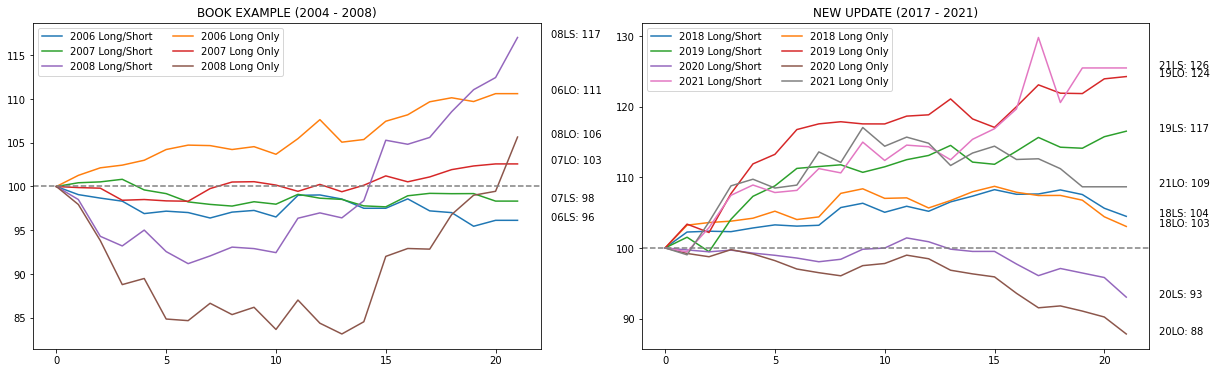

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title('BOOK EXAMPLE (2004 - 2008)')
df.plot(ax=ax1)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(flip(handles, 2), flip(labels, 2), ncol=2)
ax1.axhline(100., color='grey', linestyle='--')

for i in range(df.shape[1]):
    ax1.annotate(f'{df.columns[i][2:4] + "L" + ("S" if i % 2 == 0 else "O")}: {df.iloc[-1, i]:,.0f}', xy=(1, df.iloc[-1, i]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax2.set_title('NEW UPDATE (2017 - 2021)')
df_new.plot(ax=ax2)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(flip(handles, 2), flip(labels, 2), ncol=2)
ax2.axhline(100., color='grey', linestyle='--')

for i in range(df_new.shape[1]):
    ax2.annotate(f'{df_new.columns[i][2:4] + "L" + ("S" if i % 2 == 0 else "O")}: {df_new.iloc[-1, i]:,.0f}', xy=(1, df_new.iloc[-1, i]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Pool**: S&P500 Companies Selected at 2007-11-23 / 2020-12-31
- **Strategy**: 
  - Use last year same month performance as benchmark
  - Buy stocks with good performance a year ago
  - Sell stocks with bad performance a year ago
  - Long `TOP50`, (Short `BOTTOM50`)

- **Time Period (book)**: 1999-11-24 to 2007-11-23
- **Time Period (update)**: 2019-12-30 to now

In [ ]:
df_tmp = wrds.raw_sql("""
SELECT ticker, date, prc, cfacpr
FROM crsp.dsp500list 
LEFT JOIN crsp.stocknames ON crsp.dsp500list.permno=crsp.stocknames.permno
LEFT JOIN crsp.msf ON crsp.dsp500list.permno=crsp.msf.permno
WHERE start <= '2007-11-23' AND ending >= '2007-11-23' AND namedt <= '2007-11-23' AND nameenddt >= '2007-11-23' AND date >= '1999-11-24' AND date <= '2007-11-23'""", date_cols=['date'])

df_tmp['prc'] = np.abs(df_tmp['prc'])
df_pivot = df_tmp.pivot(index='date', columns='ticker', values='prc')
df_factor = df_tmp.pivot(index='date', columns='ticker', values='cfacpr')
df_factor = df_factor.div(df_factor.iloc[-1])
df_pivot = df_pivot.div(df_factor)
df_change = df_pivot.pct_change() + 1
df_change = df_change.dropna(how='all')

giant = []
for i in range(12, len(df_change)):
  df_tmp = df_change.iloc[[i - 12, i]]
  df_tmp = df_tmp.dropna(axis=1)
  tmp = df_tmp.iloc[0].sort_values()
  shortlist = tmp.index[:50].tolist()
  longlist = tmp.index[-50:].tolist()

  shorter = df_tmp.iloc[1].loc[shortlist].sum()
  longer = df_tmp.iloc[1].loc[longlist].sum()

  giant += [[longer, shorter]]

#Avg ann return=-0.012679 Sharpe ratio=-0.122247

df_giant = pd.DataFrame(giant, index=df_change.index[12:], columns=['Long', 'Short'])
df_giant['Long-Short'] = df_giant['Long'] - df_giant['Short'] + 100.
df_giant['Long Only'] = df_giant['Long'] * 2
df_giant.loc[df_change.index[11]] = 100.
df_giant.sort_index(inplace=True)
df_giant

Long       Short  Long-Short   Long Only
date                                                      
2000-11-30  100.000000  100.000000  100.000000  100.000000
2000-12-29   52.100337   55.096494   97.003843  104.200674
2001-01-31   53.614443   56.899869   96.714574  107.228887
2001-02-28   39.709980   49.819892   89.890088   79.419960
2001-03-30   49.198618   44.869808  104.328810   98.397235
...                ...         ...         ...         ...
2007-06-29   49.097965   49.178539   99.919425   98.195929
2007-07-31   47.232012   48.622334   98.609678   94.464025
2007-08-31   50.427724   49.659224  100.768500  100.855447
2007-09-28   51.249538   52.655969   98.593570  102.499077
2007-10-31   50.719817   51.034011   99.685806  101.439633

[84 rows x 4 columns]

In [ ]:
df_tmp_new = wrds.raw_sql("""
SELECT ticker, date, prc, cfacpr
FROM crsp.dsp500list 
LEFT JOIN crsp.stocknames ON crsp.dsp500list.permno=crsp.stocknames.permno
LEFT JOIN crsp.msf ON crsp.dsp500list.permno=crsp.msf.permno
WHERE start <= '2020-12-31' AND ending >= '2020-12-31' AND namedt <= '2020-12-31' AND nameenddt >= '2020-12-31' AND date >= '2011-12-31' AND date <= '2020-12-31'""", date_cols=['date'])

df_tmp_new['prc'] = np.abs(df_tmp_new['prc'])
df_pivot_new = df_tmp_new.pivot(index='date', columns='ticker', values='prc')
df_factor_new = df_tmp_new.pivot(index='date', columns='ticker', values='cfacpr')
df_factor_new = df_factor_new.div(df_factor_new.iloc[-1])
df_pivot_new = df_pivot_new.div(df_factor_new)
df_change_new = df_pivot_new.pct_change() + 1
df_change_new = df_change_new.dropna(how='all')

giant_new = []
for i in range(12, len(df_change_new)):
  df_tmp_new = df_change_new.iloc[[i - 12, i]]
  df_tmp_new = df_tmp_new.dropna(axis=1)
  tmp_new = df_tmp_new.iloc[0].sort_values()
  shortlist_new = tmp_new.index[:50].tolist()
  longlist_new = tmp_new.index[-50:].tolist()

  shorter_new = df_tmp_new.iloc[1].loc[shortlist_new].sum()
  longer_new = df_tmp_new.iloc[1].loc[longlist_new].sum()

  giant_new += [[longer_new, shorter_new]]

df_giant_new = pd.DataFrame(giant_new, index=df_change_new.index[12:], columns=['Long', 'Short'])
df_giant_new['Long-Short'] = df_giant_new['Long'] - df_giant_new['Short'] + 100.
df_giant_new['Long Only'] = df_giant_new['Long'] * 2
df_giant_new.loc[df_change_new.index[11]] = 100.
df_giant_new.sort_index(inplace=True)
df_giant_new

Long       Short  Long-Short   Long Only
date                                                      
2013-01-31  100.000000  100.000000  100.000000  100.000000
2013-02-28   50.342550   51.795796   98.546754  100.685099
2013-03-28   52.348695   52.653738   99.694956  104.697389
2013-04-30   50.974395   51.343624   99.630770  101.948789
2013-05-31   49.419721   53.806966   95.612755   98.839442
...                ...         ...         ...         ...
2020-08-31   51.819330   52.617176   99.202154  103.638660
2020-09-30   48.082279   48.375836   99.706444   96.164559
2020-10-30   49.583204   49.300051  100.283152   99.166407
2020-11-30   58.647097   57.641053  101.006044  117.294194
2020-12-31   53.304242   52.044608  101.259634  106.608483

[96 rows x 4 columns]

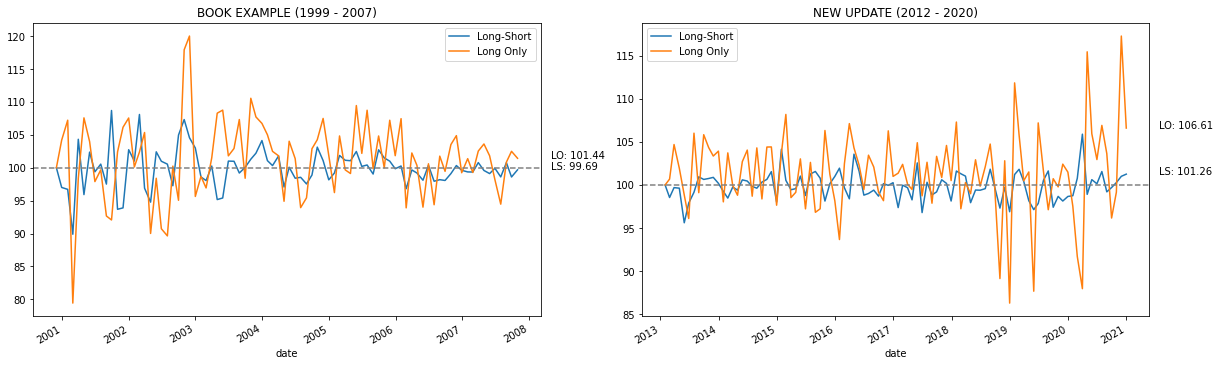

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title('BOOK EXAMPLE (1999 - 2007)')
df_giant.iloc[:, -2:].plot(ax=ax1)
ax1.axhline(100., color='grey', linestyle='--')

ax1.annotate(f'LS: {df_giant.iloc[-1, 2]:,.2f}', xy=(1, df_giant.iloc[-1, 2]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax1.annotate(f'LO: {df_giant.iloc[-1, 3]:,.2f}', xy=(1, df_giant.iloc[-1, 3]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

ax2.set_title('NEW UPDATE (2012 - 2020)')
df_giant_new.iloc[:, -2:].plot(ax=ax2)

ax2.axhline(100., color='grey', linestyle='--')

ax2.annotate(f'LS: {df_giant_new.iloc[-1, 2]:,.2f}', xy=(1, df_giant_new.iloc[-1, 2]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
ax2.annotate(f'LO: {df_giant_new.iloc[-1, 3]:,.2f}', xy=(1, df_giant_new.iloc[-1, 3]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: 
  - Buy unleaded gasoline RBOB future contacts `RB`
  - Buy at April 13 each year
  - Sell at April 25 each year



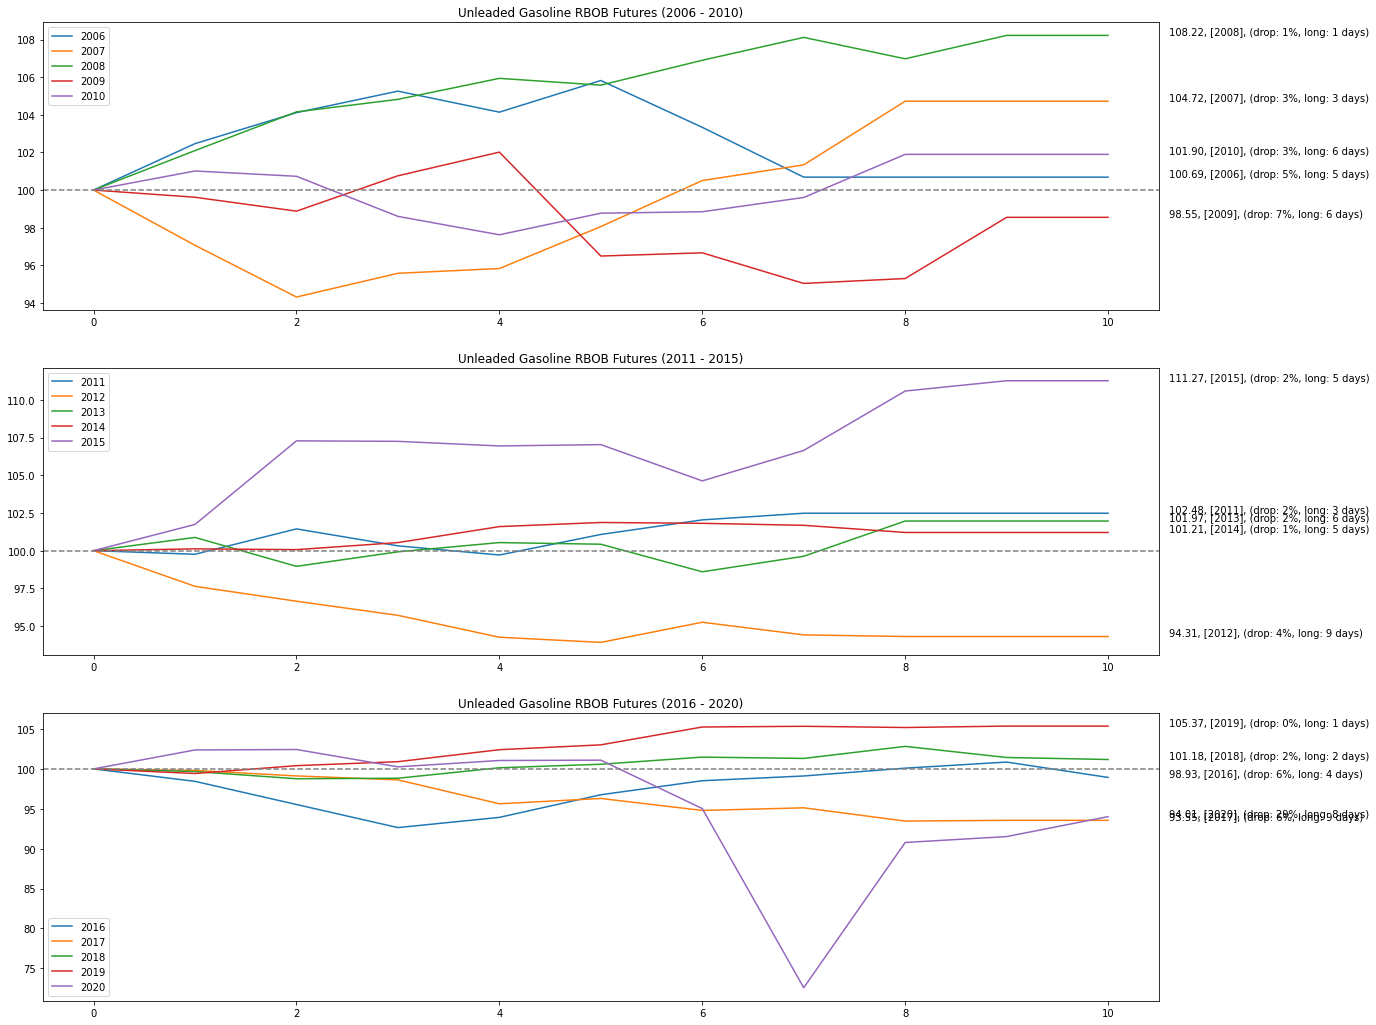

In [ ]:
df = pd.read_csv(f'{path}/RBOB.csv', index_col=0)
df.index = pd.to_datetime(df.index, format='%b %d, %Y')
df.sort_index(inplace=True)
df = df['Price']
df_group = df.groupby(df.index.year)

df_giant = pd.DataFrame()

for year, detail in df_group:
  df_tmp = detail.loc[f'{year}-04-13':f'{year}-04-25']
  df_tmp.reset_index(drop=True, inplace=True)
  df_tmp = df_tmp.pct_change() + 1
  df_tmp[0] = 100.
  df_tmp = df_tmp.cumprod()
  df_tmp.rename(year, inplace=True)
  df_giant = pd.concat([df_giant, df_tmp], axis=1)

df_giant = df_giant.iloc[:,1:-1]
df_giant.fillna(method='ffill', inplace=True)

fig, ax = plt.subplots(3, 1, figsize=(20, 18))

for i in range(3):

  df_temp = df_giant.iloc[:, i * 5:(i + 1) * 5]

  ax[i].set_title(f'Unleaded Gasoline RBOB Futures ({df_temp.columns[0]} - {df_temp.columns[-1]})')
  df_temp.plot(ax=ax[i])
  ax[i].axhline(y=100.0, color='grey', linestyle='--')

  for j in range(5):
    tmp = df_temp.iloc[:, j]
    dd = calculateMaxDD(tmp)

    ax[i].annotate(f'{tmp.iloc[-1] :,.2f}, [{tmp.name}], (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, tmp.iloc[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

<font color='blue'><H1>Human Readable Strategy</H1></font>

- **Strategy**: 
  - Buy natural gas `NG` future contacts
  - Buy at February 25 each year
  - Sell at April 15 each year



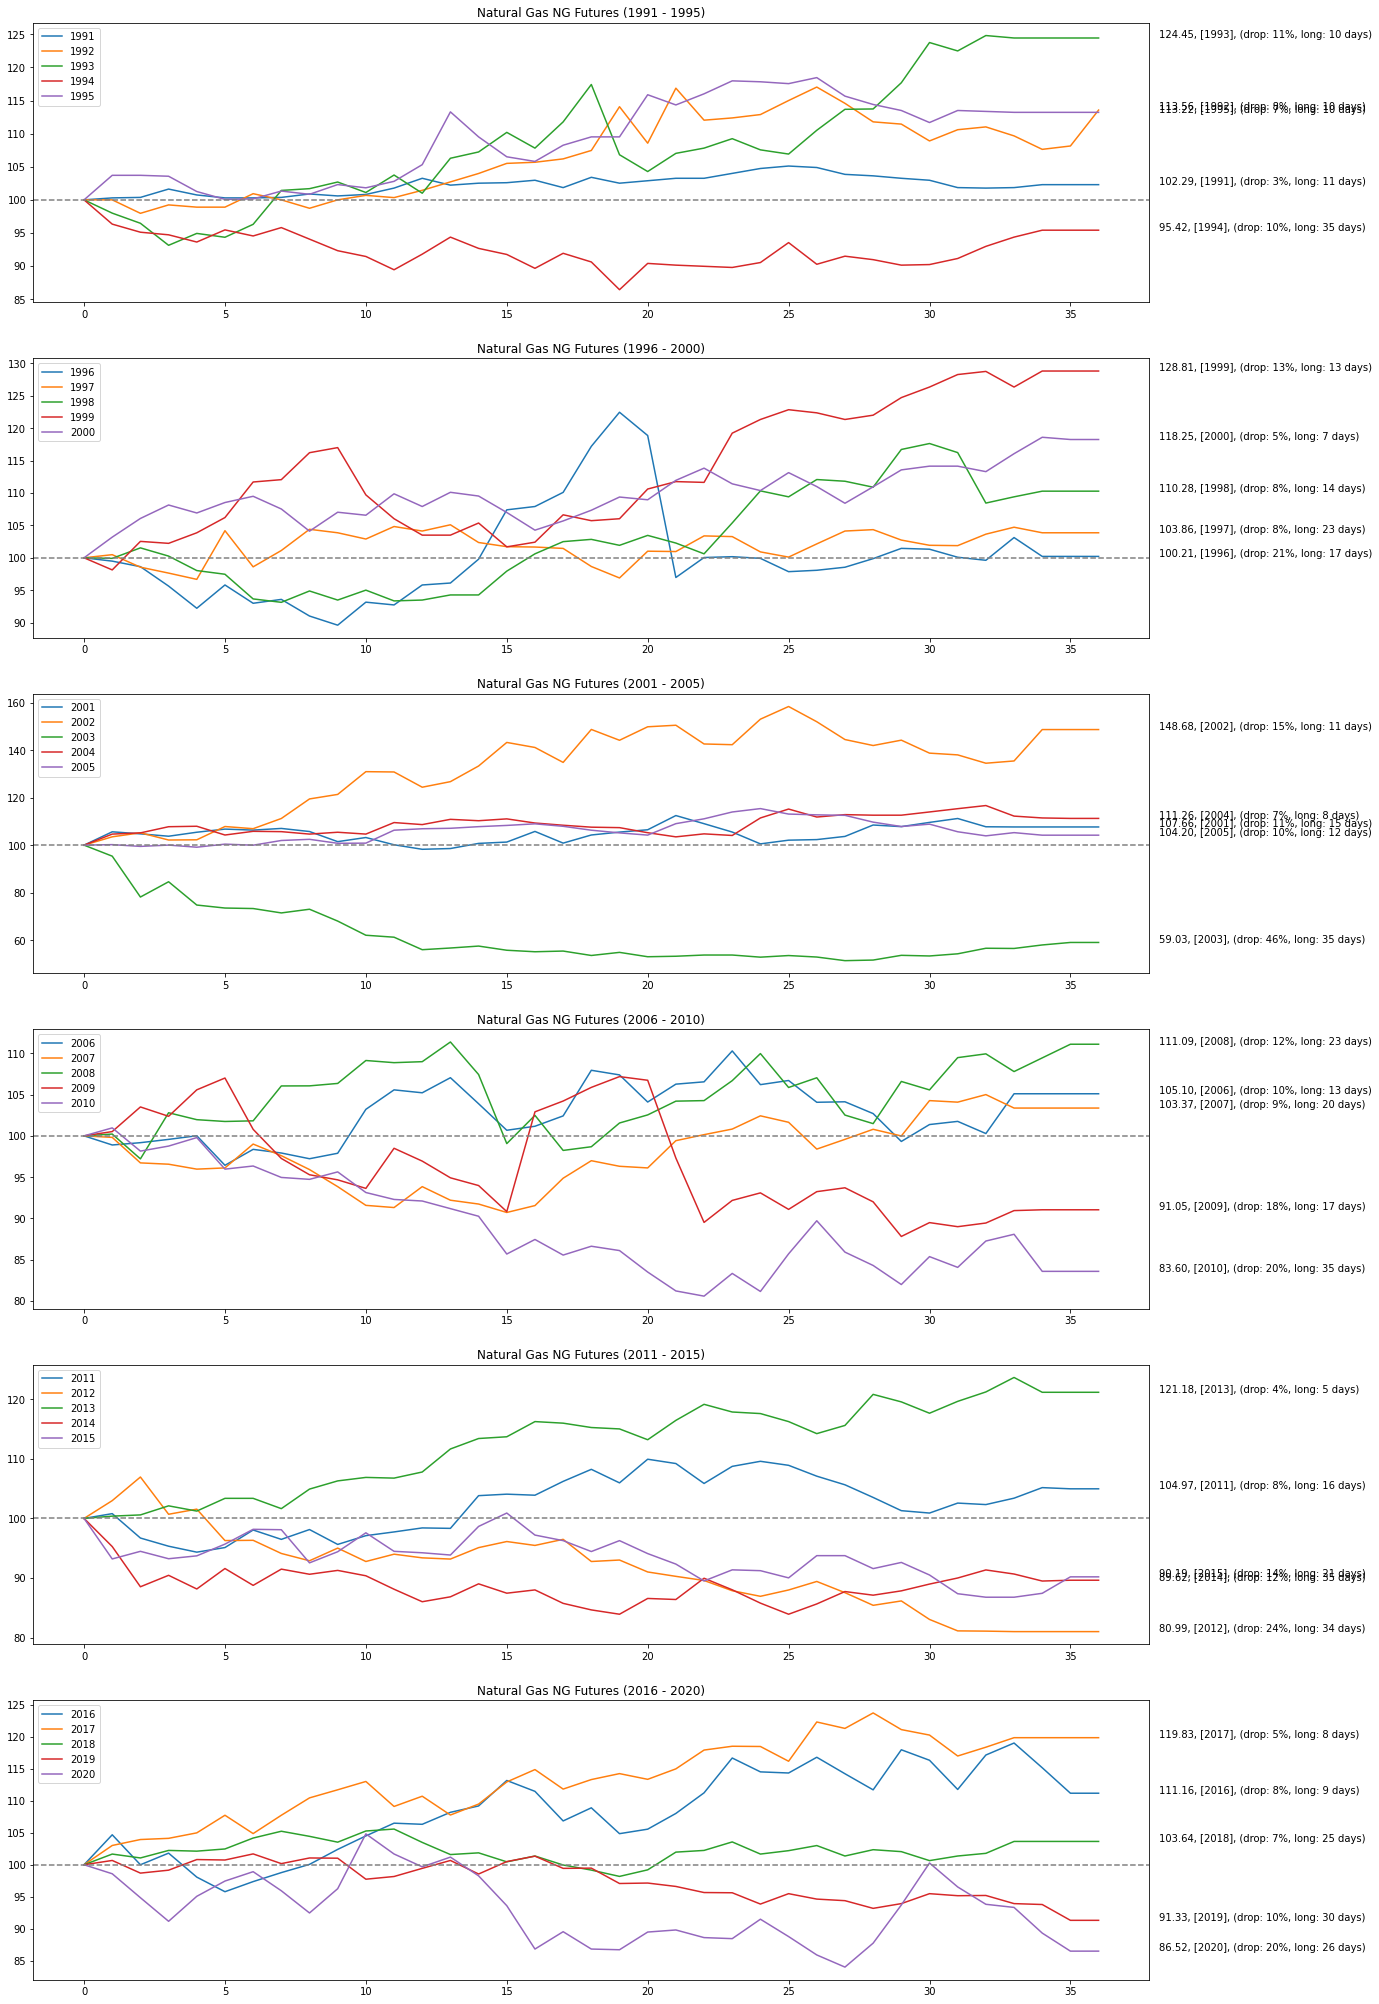

In [ ]:
df = pd.read_csv(f'{path}/NG.csv', index_col=0)
df.index = pd.to_datetime(df.index, format='%d-%b-%y')
df.sort_index(inplace=True)
df = df['Price']

df_group = df.groupby(df.index.year)

df_giant = pd.DataFrame()

for year, detail in df_group:
  df_tmp = detail.loc[f'{year}-02-25':f'{year}-04-15']

  df_tmp.reset_index(drop=True, inplace=True)
  df_tmp = df_tmp.pct_change() + 1
  df_tmp[0] = 100.
  df_tmp = df_tmp.cumprod()
  df_tmp.rename(year, inplace=True)
  df_giant = pd.concat([df_giant, df_tmp], axis=1)

df_giant = df_giant.iloc[:,1:-1]
df_giant.fillna(method='ffill', inplace=True)

fig, ax = plt.subplots(6, 1, figsize=(20, 36))

for i in range(6):

  df_temp = df_giant.iloc[:, i * 5:(i + 1) * 5]

  ax[i].set_title(f'Natural Gas NG Futures ({df_temp.columns[0]} - {df_temp.columns[-1]})')
  df_temp.plot(ax=ax[i])
  ax[i].axhline(y=100.0, color='grey', linestyle='--')

  for j in range(5):
    tmp = df_temp.iloc[:, j]
    dd = calculateMaxDD(tmp)

    ax[i].annotate(f'{tmp.iloc[-1] :,.2f}, [{tmp.name}], (drop: {dd[0] * -100.0:.0f}%, long: {dd[1]:.0f} days)', xy=(1, tmp.iloc[-1]), xytext=(10, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

- Too little samples yet, might suffer from **data-snooping bias** (Clearly, it seems so!)

### High-Frequency Trading (HFT)

- Law of Large Numbers, most likely built-up from trmendous tiny little profits
- **Higher Sharpe ratios** compared with traditional trading strategies
- **Transaction costs** play a HUGH role in backtesting
- Trading in **moderate size**, much easier to liquitade if needed
- More sophisticated datafeed is needed: including `BID` and `ASK` prices

### High Leverage VS High Beta $\beta$

- Recall Kelly's Formula:
$$ f_i = \frac{\mu_i}{\sigma_i^2}, \qquad g = r_f + \frac{1}{2} SR^2 = r_f + \frac{1}{2} \left( \frac{\mu - r_f}{\sigma} \right)^2$$
- Given 2 portfolio with same mean return $\mu$, pick one with **smaller risk $\sigma$**
- Given high/low beta portfolios, as market always *undervalue high $\beta$ stocks*, so pick lower $\beta$ and leverage up
- Beware of **fat-tail distributions** of actual return when lever

## [Chan-Bk1-Ch8] Can Independent Traders Still Succeed?

- Low capacity has its own path to play in the market
- FI with large caps holds for long period might suffer regime changes
- Denerating profitable strategies force FI to compete invites data-snooping bias
- Overhedging might limit the profit margin, independent traders are free of these BS constraints